In [1]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
#from tqdm.notebook import tqdm
import os
import re
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import tensorflow as tf

In [2]:





import tarfile

file_path = '/content/NLMCXR_png.tgz'  # Replace with the actual path to your file

with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall('/content/images')  # Replace with the desired extraction directory




import tarfile
file_path = '/content/NLMCXR_reports.tgz'  # Replace with the actual path to your file
with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall('/content/reports')  # Replace with the desired extraction directory


In [3]:

columns = ["image_id", "caption", "comparison", "indication", "findings", "impression","height","width"]
df = pd.DataFrame(columns = columns)


In [4]:
import tarfile
import os
import pandas as pd


for file in tqdm(os.listdir("/content/reports/ecgen-radiology/")):
    if file.endswith(".xml"):
        k = "/content/reports/ecgen-radiology/"
        path = k + file
        mytree = ET.parse(path)  # Parsing xml report
        comparision = mytree.find(".//AbstractText[@Label='COMPARISON']").text  # Extracting comparison text
        indication = mytree.find(".//AbstractText[@Label='INDICATION']").text  # Extracting indication text
        findings = mytree.find(".//AbstractText[@Label='FINDINGS']").text  # Extracting findings text
        impression = mytree.find(".//AbstractText[@Label='IMPRESSION']").text  # Extracting impression text

        for x in mytree.findall("parentImage"):
            image_id = x.attrib['id'] + ".png"
            filename = '/content/images/' + image_id
            image = cv2.imread(filename)  # Reading image

            height, width, channels = image.shape
            caption = '' if x.find('caption').text is None else x.find('caption').text

            # Create a DataFrame row with the new data
            new_row = pd.DataFrame([[image_id, caption, comparision, indication, findings, impression, height, width]],
                                   columns=columns)

            # Concatenate the new row to the main DataFrame
            df = pd.concat([df, new_row], ignore_index=True)

  0%|          | 0/3955 [00:00<?, ?it/s]

In [5]:
df.head(10)

,image_id,caption,comparison,indication,findings,impression,height,width
0,CXR1813_IM-0526-1001.png,Xray Chest PA and Lateral,None.,"Wheezing, chest pain.",The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings. .,511,512
1,CXR1813_IM-0526-2001.png,Xray Chest PA and Lateral,None.,"Wheezing, chest pain.",The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings. .,543,512
2,CXR203_IM-0675-1001.png,CHEST 2V FRONTAL/LATERAL,XXXX,Chest pain,The heart is normal in size. The mediastinum i...,No acute disease.,420,512
3,CXR1262_IM-0178-0001.png,"CHEST (PA AND LATERAL) on XXXX, XXXX",PA and lateral on XXXX.,Pneumonia.,The cardiac silhouette mediastinal contours ar...,No acute cardiopulmonary disease.,420,512
4,CXR1262_IM-0178-1001.png,"CHEST (PA AND LATERAL) on XXXX, XXXX",PA and lateral on XXXX.,Pneumonia.,The cardiac silhouette mediastinal contours ar...,No acute cardiopulmonary disease.,624,512
5,CXR1262_IM-0178-2001.png,"CHEST (PA AND LATERAL) on XXXX, XXXX",PA and lateral on XXXX.,Pneumonia.,The cardiac silhouette mediastinal contours ar...,No acute cardiopulmonary disease.,624,512
6,CXR2957_IM-1354-1002.png,CHEST 2V FRONTAL/LATERAL,XXXX,pt with XXXX and difficulty,The heart is mildly enlarged. Pulmonary vascul...,1. Cardiomegaly and pulmonary vascular congest...,756,512
7,CXR2957_IM-1354-1003.png,CHEST 2V FRONTAL/LATERAL,XXXX,pt with XXXX and difficulty,The heart is mildly enlarged. Pulmonary vascul...,1. Cardiomegaly and pulmonary vascular congest...,495,512
8,CXR3265_IM-1551-1001.png,"Chest radiographs, 2 XXXX and lateral",None available,XXXX-year-old female with XXXX,The heart size and mediastinal contours appear...,No acute cardiopulmonary findings.,624,512
9,CXR3265_IM-1551-2001.png,"Chest radiographs, 2 XXXX and lateral",None available,XXXX-year-old female with XXXX,The heart size and mediastinal contours appear...,No acute cardiopulmonary findings.,624,512


In [6]:
df.shape

(7470, 8)

In [7]:
df[df['image_id']=='CXR1005_IM-0006-3003.png']


,image_id,caption,comparison,indication,findings,impression,height,width
5491,CXR1005_IM-0006-3003.png,"Chest, 2 views, frontal and lateral",None.,Pruritic.,Cardiac and mediastinal contours are within no...,No acute findings.,623,512


In [8]:
def absolute_path(x):
    '''Makes the path absolute '''
    x = '/content/images/'+ x
    return x

df['Image_path'] = df['image_id'].apply(lambda x : absolute_path(x)) # making the paths absolute

In [9]:
df.head(2)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR1813_IM-0526-1001.png,Xray Chest PA and Lateral,None.,"Wheezing, chest pain.",The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings. .,511,512,/content/images/CXR1813_IM-0526-1001.png
1,CXR1813_IM-0526-2001.png,Xray Chest PA and Lateral,None.,"Wheezing, chest pain.",The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings. .,543,512,/content/images/CXR1813_IM-0526-2001.png


In [10]:
# Rename columns
df = df.rename(columns={
    'image_id': 'image_id',
    'eCitation': 'caption',
    'COMPARISON': 'comparison',
    'INDICATION': 'indication',
    'FINDINGS': 'findings',
    'IMPRESSION': 'impression',
    'height': 'height',
    'width': 'width',
    'Image_path': 'Image_path'
})

# Optional: Reorder columns
df = df[['image_id', 'caption', 'comparison', 'indication', 'findings', 'impression', 'height', 'width', 'Image_path']]
df.head(2)

,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
0,CXR1813_IM-0526-1001.png,Xray Chest PA and Lateral,None.,"Wheezing, chest pain.",The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings. .,511,512,/content/images/CXR1813_IM-0526-1001.png
1,CXR1813_IM-0526-2001.png,Xray Chest PA and Lateral,None.,"Wheezing, chest pain.",The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary findings. .,543,512,/content/images/CXR1813_IM-0526-2001.png


In [11]:
df[df['image_id']=='CXR1_1_IM-0001-3001.png']


,image_id,caption,comparison,indication,findings,impression,height,width,Image_path
5780,CXR1_1_IM-0001-3001.png,Xray Chest PA and Lateral,None.,Positive TB test,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,624,512,/content/images/CXR1_1_IM-0001-3001.png


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7470 entries, 0 to 7469
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_id    7470 non-null   object
 1   caption     7470 non-null   object
 2   comparison  6313 non-null   object
 3   indication  7311 non-null   object
 4   findings    6473 non-null   object
 5   impression  7418 non-null   object
 6   height      7470 non-null   object
 7   width       7470 non-null   object
 8   Image_path  7470 non-null   object
dtypes: object(9)
memory usage: 525.4+ KB


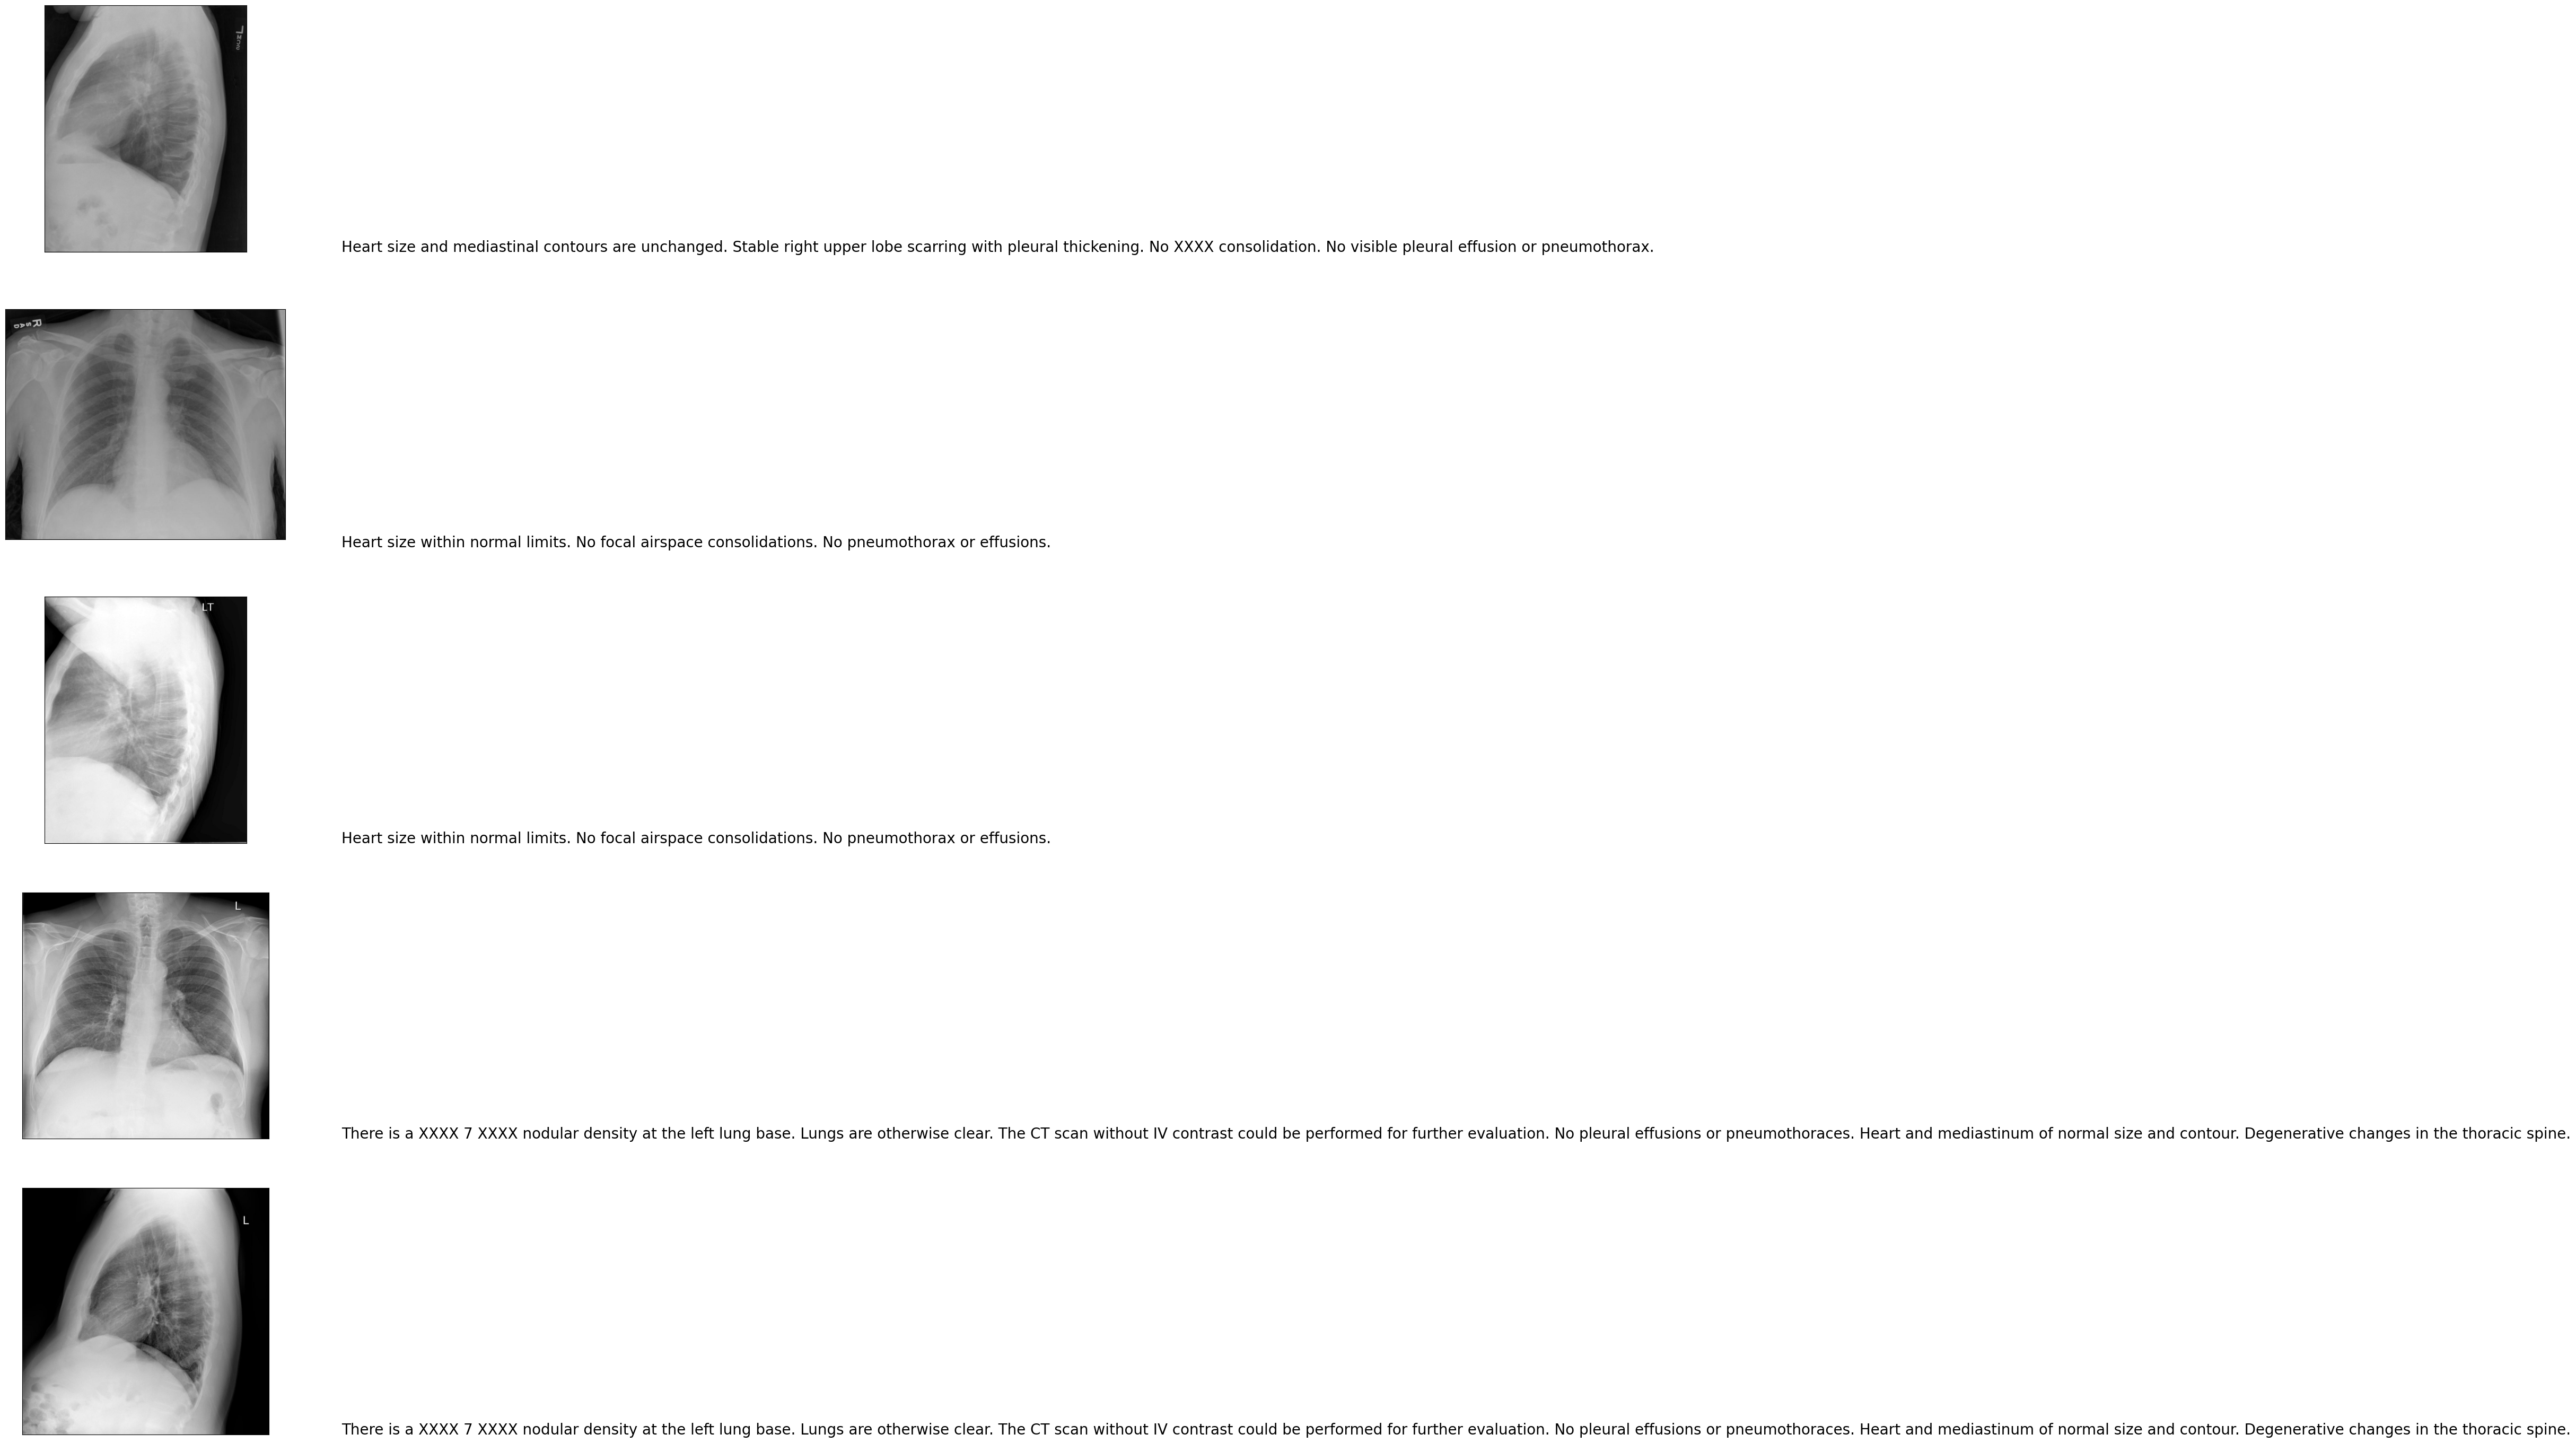

In [13]:
count = 1
fig = plt.figure(figsize=(15, 35))

for filename in df['Image_path'].values[95:100]:
    findings = list(df["findings"].loc[df["Image_path"] == filename].values)

    img = cv2.imread(filename)
    if img is None:
        print(f"Error loading image: {filename}")
        continue  # Skip to the next iteration if the image cannot be loaded

    ax = fig.add_subplot(5, 2, count, xticks=[], yticks=[])
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    count += 1

    ax = fig.add_subplot(5, 2, count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, len(findings))

    for i, f in enumerate(findings):
        ax.text(0, i, f, fontsize=20)

    count += 1

plt.show()

'Heart size and mediastinal contour within normal limits. No focal airspace consolidation, pneumothorax, or large pleural effusion. Degenerative changes of thoracic spine.'

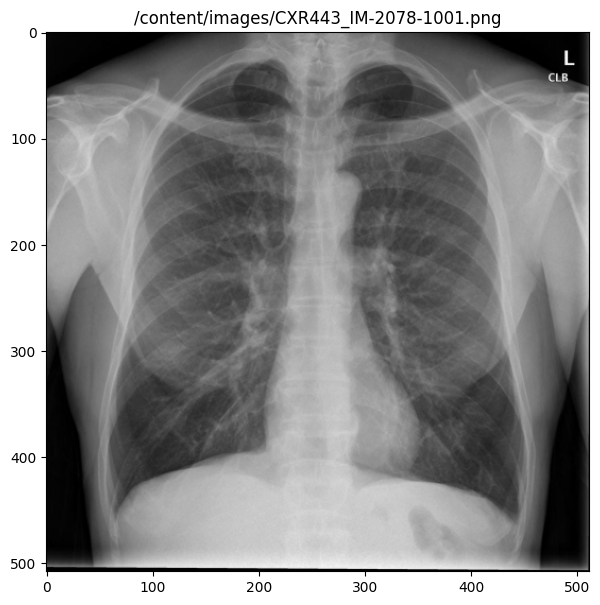

In [14]:
plt.figure(figsize=(8,7))
img = cv2.imread(df['Image_path'].values[20])
plt.imshow(img)
plt.title(df['Image_path'].values[20])

df['findings'].values[20]


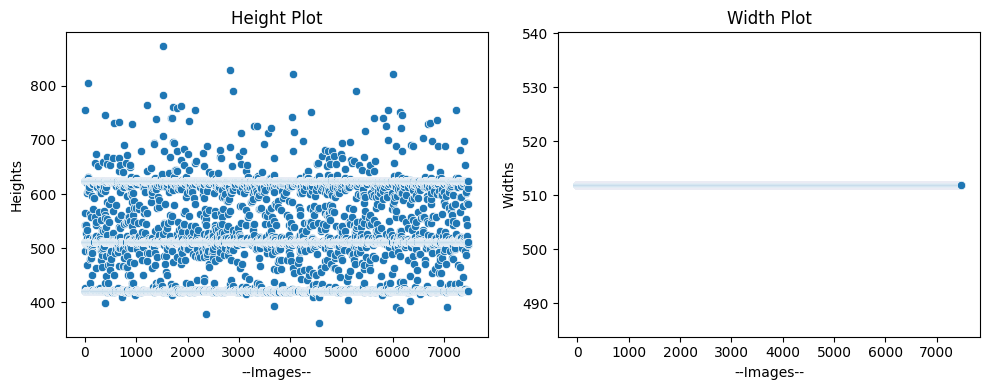

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting height
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title('Height Plot')
plt.ylabel('Heights')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(df.height.values)), y=df.height.values)

# Plotting width
plt.subplot(122)
plt.title('Width Plot')
plt.ylabel('Widths')
plt.xlabel('--Images--')
sns.scatterplot(x=range(len(df.width.values)), y=df.width.values)

plt.tight_layout()
plt.show()


In [16]:
# number of missing values
df.isnull().sum()


,0
image_id,0
caption,0
comparison,1157
indication,159
findings,997
impression,52
height,0
width,0
Image_path,0


In [17]:

data = df[['image_id','findings','height','width','Image_path']]

In [18]:
data.isnull().sum()

,0
image_id,0
findings,997
height,0
width,0
Image_path,0


In [19]:

data = data.dropna(axis=0) # drop all missing value rows


'The cardiac silhouette mediastinal contours are within normal limits. There are low lung volumes. There is no focal consolidation. There is pneumothorax. There is no large pleural effusion. There is prominent right anterior first rib end.'

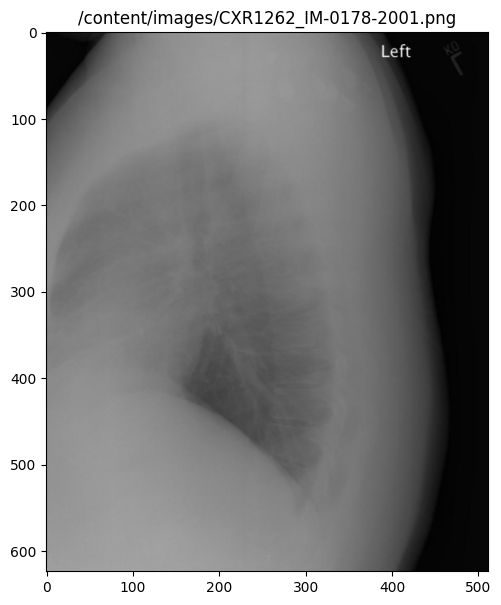

In [20]:
plt.figure(figsize=(8,7))
img = cv2.imread(data['Image_path'].values[5])
plt.imshow(img)
plt.title(data['Image_path'].values[5])

data['findings'].values[5]

In [21]:
data.Image_path


,Image_path
0,/content/images/CXR1813_IM-0526-1001.png
1,/content/images/CXR1813_IM-0526-2001.png
2,/content/images/CXR203_IM-0675-1001.png
3,/content/images/CXR1262_IM-0178-0001.png
4,/content/images/CXR1262_IM-0178-1001.png
...,...
7463,/content/images/CXR1303_IM-0199-2001-0001.png
7464,/content/images/CXR1303_IM-0199-2001-0002.png
7465,/content/images/CXR1303_IM-0199-2001-0003.png
7468,/content/images/CXR2002_IM-0654-1001.png


In [22]:
images = {}
findings = {}

# Assuming `data` is a DataFrame with columns 'Image_path' and 'findings'
for img, fin in data[['Image_path', 'findings']].values:
    # Split the image path to get the filename and extract information
    a = img.split('.')
    file_type = a[-1]  # Get the file type (e.g., 'png')

    # Further split the filename to extract relevant information
    a = a[0].split('-')
    a.pop(len(a)-1)
    a = '-'.join(e for e in a)  # Join the remaining parts with '-'

    # Check if the key already exists in the 'images' dictionary
    if a not in images.keys():
        # If not, create a new entry with count 1 and store findings
        images[a] = 1
        findings[a] = fin
    else:
        # If the key already exists, increment the count and update findings
        images[a] += 1
        findings[a] = fin


In [23]:
images['/content/images/CXR368_IM-1832'],findings['/content/images/CXR368_IM-1832']


(2,
 'Cardiomediastinal silhouette and pulmonary vasculature are within normal limits. Lungs are clear. No pneumothorax or pleural effusion. No acute osseous findings.')

In [24]:
print('Total Number of Unique_IDs :', len(images.keys()))


Total Number of Unique_IDs : 3350


<Axes: title={'center': 'Number of Images  per patients'}, ylabel='count'>

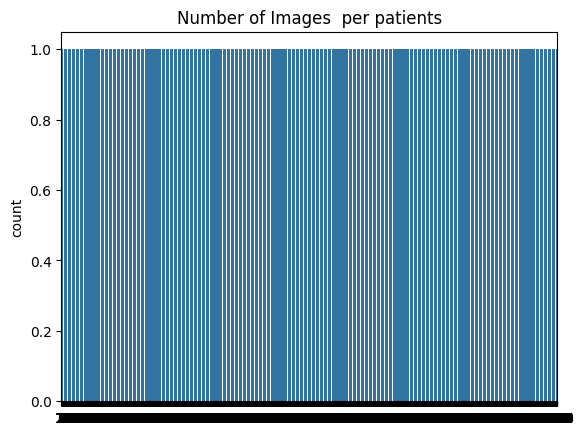

In [25]:
plt.title('Number of Images  per patients')
sns.countplot(list(images.values()))

In [26]:
def train_test_split(data):
    persons = list(data.keys())
    persons_train = persons[:2700]
    persons_cv = persons[2700:3300]
    persons_test = persons[3300:3350]
    return persons_train, persons_cv, persons_test

images_train, images_cv, images_test = train_test_split(images)

In [27]:
def combining_images(image_set):

    image_per_person = defaultdict(list)  # creating a list of dictionary to store all the image paths
                                            #corresponding to a person_id
    for pid in image_set:
        for img in data['Image_path'].values:
            if pid in img:
                image_per_person[pid].append(img)
            else:
                continue
    return image_per_person

In [28]:
img_per_person_train = combining_images(images_train)
img_per_person_cv = combining_images(images_cv)
img_per_person_test = combining_images(images_test)

In [29]:
img_per_person_train['/content/images/CXR427_IM-2070']

['/content/images/CXR427_IM-2070-1001.png',
 '/content/images/CXR427_IM-2070-2001.png']

In [30]:
# just checking the ID which has 4 images
for k,v in images.items():
    if v == 4:
        print(k)
        break

/content/images/CXR2560_IM-1064


In [31]:

def load_image(file):
    img = cv2.imread(file)
    return img


Text(0.5, 1.0, '/content/images/CXR1005_IM-0006-1001.png')

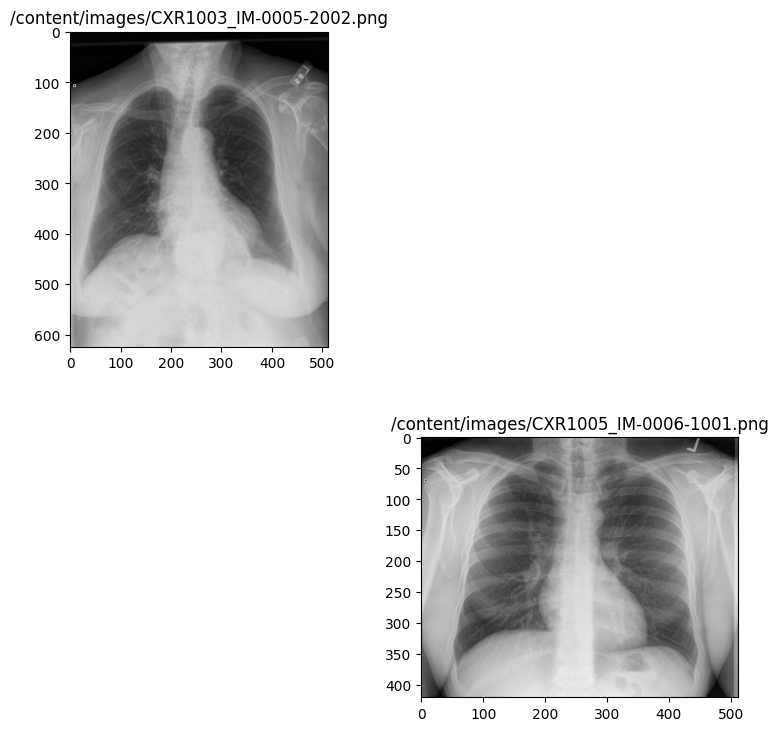

In [32]:
plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(load_image('/content/images/CXR1003_IM-0005-2002.png'))
plt.title('/content/images/CXR1003_IM-0005-2002.png')
plt.subplot(224)
plt.imshow(load_image('/content/images/CXR1005_IM-0006-1001.png'))
plt.title('/content/images/CXR1005_IM-0006-1001.png')


In [33]:
import itertools

def create_data(image_per_person):
    # new dataset
    person_id, image1, image2, report = [],[],[],[]
    for pid, imgs in image_per_person.items():   #contains pid and the images associated with that pid

        if len(imgs) == 1:
            image1.append(imgs[0])
            image2.append(imgs[0])
            person_id.append(pid)
            report.append(findings[pid])
        else:
            num = 0
            a = itertools.combinations(imgs, 2)
            for i in a:
                image1.append(i[0])
                image2.append(i[1])
                person_id.append(pid + '_' + str(num))
                report.append(findings[pid])
                num += 1
    data = pd.DataFrame()
    data['Person_id'] = person_id
    data['Image1'] = image1
    data['Image2'] = image2
    data['Report'] = report

    return data

In [34]:
train = create_data(img_per_person_train)
test = create_data(img_per_person_test)
cv = create_data(img_per_person_cv)


In [35]:
train.head(5)

,Person_id,Image1,Image2,Report
0,/content/images/CXR1813_IM-0526_0,/content/images/CXR1813_IM-0526-1001.png,/content/images/CXR1813_IM-0526-2001.png,The cardiomediastinal silhouette and pulmonary...
1,/content/images/CXR203_IM-0675,/content/images/CXR203_IM-0675-1001.png,/content/images/CXR203_IM-0675-1001.png,The heart is normal in size. The mediastinum i...
2,/content/images/CXR1262_IM-0178_0,/content/images/CXR1262_IM-0178-0001.png,/content/images/CXR1262_IM-0178-1001.png,The cardiac silhouette mediastinal contours ar...
3,/content/images/CXR1262_IM-0178_1,/content/images/CXR1262_IM-0178-0001.png,/content/images/CXR1262_IM-0178-2001.png,The cardiac silhouette mediastinal contours ar...
4,/content/images/CXR1262_IM-0178_2,/content/images/CXR1262_IM-0178-1001.png,/content/images/CXR1262_IM-0178-2001.png,The cardiac silhouette mediastinal contours ar...


In [36]:
train.to_csv('train.csv')
test.to_csv('test.csv')
cv.to_csv('cv.csv')


In [37]:
def lowercase(text):
    '''Converts to lowercase'''
    new_text = []
    for line in text:
        new_text.append(line.lower())
    return new_text

def decontractions(text):
    '''Performs decontractions in the doc'''
    new_text = []
    for phrase in text:
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"couldn\'t", "could not", phrase)
        phrase = re.sub(r"shouldn\'t", "should not", phrase)
        phrase = re.sub(r"wouldn\'t", "would not", phrase)
        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r"\*+", "abuse", phrase)
        new_text.append(phrase)

    return new_text

def rem_punctuations(text):
    '''Removes punctuations'''
    punctuations = '''!()-[]{};:'"\,<>/?@#$%^&*~''' # full stop is not removed
    new_text = []
    for line in text:
        for char in line:
            if char in punctuations:
                line = line.replace(char, "")
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def rem_numbers(text):
    '''Removes numbers and irrelevant text like xxxx*'''
    new_text = []
    for line in text:
        temp = re.sub(r'x*','',line)
        new_text.append(re.sub(r'\d','',temp))
    return new_text

def words_filter(text):
    '''Removes words less than 2 characters except no and ct'''
    new_text = []
    for line in text:
        temp = line.split()
        temp2 = []
        for word in temp:
            if  len(word) <=2 and word != 'no' and word != 'ct':
                continue
            else:
                temp2.append(word)
        new_text.append(' '.join(e for e in temp2))
    return new_text

def multiple_fullstops(text):
    ''' Removes multiple full stops from the text'''
    new_text = []
    for line in text:
        new_text.append(re.sub(r'\.\.+', '.', line))
    return new_text

def fullstops(text):
    new_text = []
    for line in text:
        new_text.append(re.sub('\.', ' .', line))
    return new_text

def multiple_spaces(text):
    new_text = []
    for line in text:
        new_text.append(' '.join(e for e in line.split()))
    return new_text

def separting_startg_words(text):
    new_text = []
    for line in text:
        temp = []
        words = line.split()
        for i in words:
            if i.startswith('.') == False:
                temp.append(i)
            else:
                w = i.replace('.','. ')
                temp.append(w)
        new_text.append(' '.join(e for e in temp))
    return new_text

def rem_apostrophes(text):
    new_text = []
    for line in text:
        new_text.append(re.sub("'",'',line))
    return new_text

In [38]:
def text_preprocessing(text):
    '''Combines all the preprocess functions'''
    new_text = lowercase(text)
    new_text = decontractions(new_text)
    new_text = rem_punctuations(new_text)
    new_text = rem_numbers(new_text)
    new_text = words_filter(new_text)
    new_text = multiple_fullstops(new_text)
    new_text = fullstops(new_text)
    new_text = multiple_spaces(new_text)
    new_text = separting_startg_words(new_text)
    new_text = rem_apostrophes(new_text)
    return new_text

In [39]:
train['Report'] = text_preprocessing(train['Report'])
test['Report'] = text_preprocessing(test['Report'])
cv['Report'] = text_preprocessing(cv['Report'])

In [40]:
train.to_csv('processed_train.csv')
test.to_csv('processed_test.csv')
cv.to_csv('processed_cv.csv')


In [41]:
l = [len(e.split()) for e in train['Report'].values]  # Number of words in each report


In [42]:
print('maximum word in a report is :',max(l))


maximum word in a report is : 153


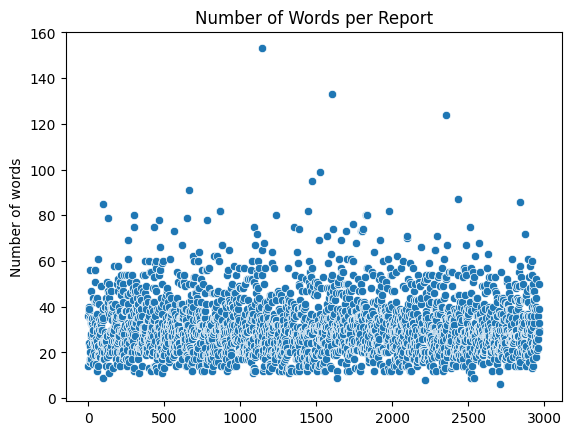

In [43]:
plt.title('Number of Words per Report')
sns.scatterplot(x=range(train.shape[0]), y=l)
plt.ylabel('Number of words')
plt.show()


In [44]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.1 MB/s eta 0:00:00


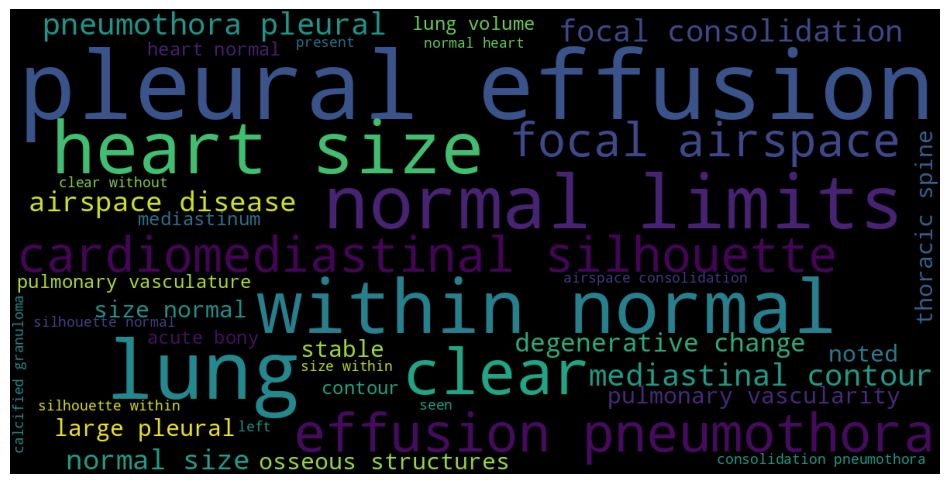

In [45]:
from wordcloud import WordCloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',max_words=800,max_font_size=60,scale=3,random_state=1 ).generate(' '.join(data.astype(str)))

    fig = plt.figure(1, figsize=(12, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['Report'])


<Axes: title={'center': 'Words for each findings review'}, xlabel='Report'>

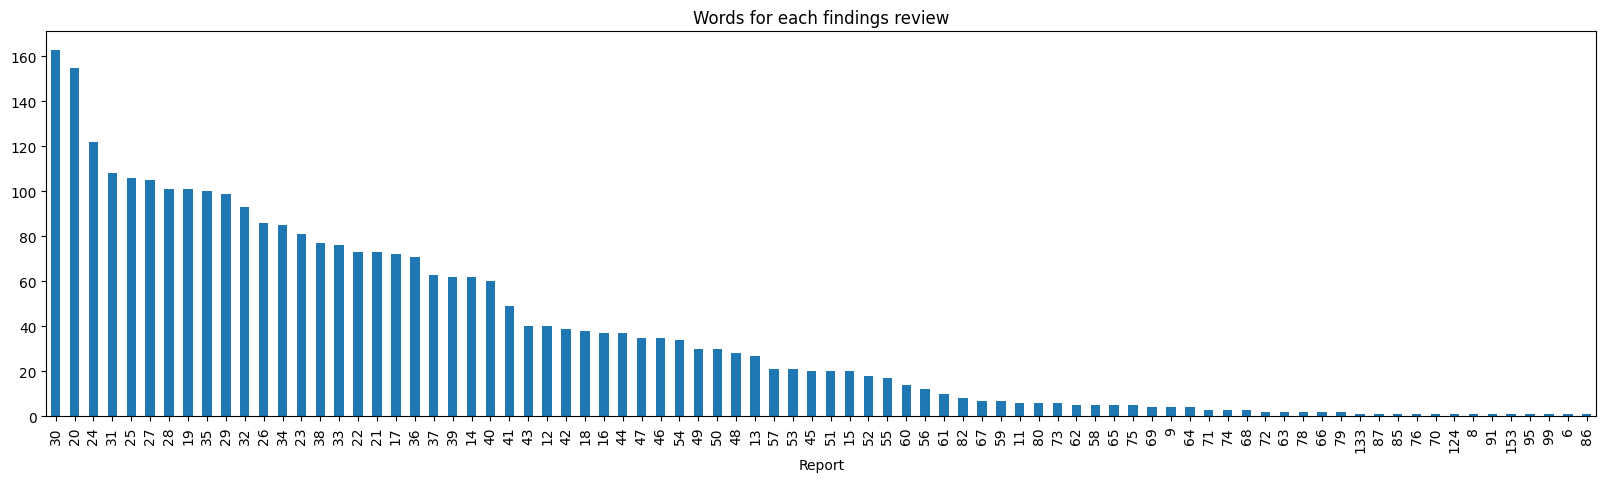

In [46]:

countword = train['Report'].str.split().apply(len).value_counts()
countword[:].plot(kind='bar',figsize=(20,5) , title = 'Words for each findings review')

In [47]:

def remodelling(x):
    '''adds start and end tokens to a sentence '''
    return 'startseq' + ' ' + x + ' ' + 'endseq'

In [48]:


train['Report'] = train['Report'].apply(lambda x : remodelling(x))
test['Report'] = test['Report'].apply(lambda x : remodelling(x))
cv['Report'] = cv['Report'].apply(lambda x : remodelling(x))

In [86]:
# save the cleaned data(STRUCTURED DATA)
train.to_csv('Final_Train_Data.csv', index=False)
test.to_csv('Final_Test_Data.csv', index=False)
cv.to_csv('Final_CV_Data.csv', index=False)

In [50]:
import tensorflow as tf
from tensorflow.keras.applications import densenet
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import os
import cv2
import tensorflow as tf
import re
import pickle
from PIL import Image
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import time
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Embedding, Conv2D, Concatenate, Flatten, Add, Dropout, GRU
import random
import datetime
from nltk.translate.bleu_score import sentence_bleu

In [51]:
from keras.applications.densenet import preprocess_input
from keras.preprocessing.image import img_to_array, load_img
from keras.models import Model
from keras.layers import Dense
from tqdm import tqdm
import numpy as np
import pandas as pd

# Assuming 'train', 'test', and 'cv' are your DataFrames containing image paths and findings

def load_and_preprocess_image(image_path):
    # Load the image and resize it to (224, 224)
    img = load_img(image_path, target_size=(224, 224))
    # Convert the image to a numpy array
    img_array = img_to_array(img)
    # Expand the dimensions to match the expected input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (e.g., normalize pixel values)
    img_array = preprocess_input(img_array)
    return img_array

# Load the pre-trained ChexNet model
chexNet = densenet.DenseNet121(include_top=False, weights=None, input_shape=(224, 224, 3), pooling="avg")
X = chexNet.output
X = Dense(14, activation="sigmoid", name="predictions")(X)
model = Model(inputs=chexNet.input, outputs=X)

# Load the pre-trained weights for the ChexNet model
!gdown "https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download"
model.load_weights('/content/brucechou1983_CheXNet_Keras_0.3.0_weights.h5')

# Create a modified ChexNet model for feature extraction
chexNet = Model(inputs=model.input, outputs=model.layers[-2].output)

Xnet_features = {}

# Process the 'train' dataset
for key, img1, img2, finding in tqdm(train.values):
    i1 = load_and_preprocess_image(img1)
    img1_features = chexNet.predict(i1)
    i2 = load_and_preprocess_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

# Process the 'test' dataset
for key, img1, img2, finding in tqdm(test.values):
    i1 = load_and_preprocess_image(img1)
    img1_features = chexNet.predict(i1)
    i2 = load_and_preprocess_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_

# Process the 'cv' dataset
for key, img1, img2, finding in tqdm(cv.values):
    i1 = load_and_preprocess_image(img1)
    img1_features = chexNet.predict(i1)
    i2 = load_and_preprocess_image(img2)
    img2_features = chexNet.predict(i2)
    input_ = np.concatenate((img1_features, img2_features), axis=1)
    Xnet_features[key] = input_



Downloading...
From: https://drive.google.com/u/0/uc?id=19BllaOvs2x5PLV_vlWMy4i8LapLb2j6b&export=download
To: /content/brucechou1983_CheXNet_Keras_0.3.0_weights.h5
100% 29.1M/29.1M [00:00<00:00, 87.0MB/s]


  0%|          | 0/2970 [00:00<?, ?it/s]

1/1 [==============================] - 0s 103ms/step


  0%|          | 1/2970 [00:02<1:49:10,  2.21s/it]

1/1 [==============================] - 0s 95ms/step


  0%|          | 2/2970 [00:02<54:42,  1.11s/it]  

1/1 [==============================] - 0s 99ms/step


  0%|          | 3/2970 [00:02<37:07,  1.33it/s]

1/1 [==============================] - 0s 94ms/step


  0%|          | 4/2970 [00:03<28:45,  1.72it/s]

1/1 [==============================] - 0s 101ms/step


  0%|          | 5/2970 [00:03<24:21,  2.03it/s]

1/1 [==============================] - 0s 94ms/step


  0%|          | 6/2970 [00:03<21:28,  2.30it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 7/2970 [00:04<19:47,  2.49it/s]

1/1 [==============================] - 0s 100ms/step


  0%|          | 8/2970 [00:04<18:40,  2.64it/s]

1/1 [==============================] - 0s 97ms/step


  0%|          | 9/2970 [00:04<17:51,  2.76it/s]

1/1 [==============================] - 0s 100ms/step


  0%|          | 10/2970 [00:05<17:32,  2.81it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 11/2970 [00:05<17:02,  2.89it/s]

1/1 [==============================] - 0s 95ms/step


  0%|          | 12/2970 [00:06<23:34,  2.09it/s]

1/1 [==============================] - 0s 93ms/step


  0%|          | 13/2970 [00:06<21:14,  2.32it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 14/2970 [00:06<19:35,  2.51it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 15/2970 [00:07<18:24,  2.67it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 16/2970 [00:07<17:41,  2.78it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 17/2970 [00:07<16:54,  2.91it/s]

1/1 [==============================] - 0s 87ms/step


  1%|          | 18/2970 [00:08<16:18,  3.02it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 19/2970 [00:08<15:58,  3.08it/s]

1/1 [==============================] - 0s 95ms/step


  1%|          | 20/2970 [00:08<15:47,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


  1%|          | 21/2970 [00:09<15:45,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


  1%|          | 22/2970 [00:09<15:36,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


  1%|          | 23/2970 [00:09<15:36,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 24/2970 [00:10<15:42,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


  1%|          | 25/2970 [00:10<15:48,  3.11it/s]

1/1 [==============================] - 0s 87ms/step


  1%|          | 26/2970 [00:10<15:35,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 27/2970 [00:11<15:25,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


  1%|          | 28/2970 [00:11<15:18,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


  1%|          | 29/2970 [00:11<15:21,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 30/2970 [00:11<15:18,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


  1%|          | 31/2970 [00:12<15:15,  3.21it/s]

1/1 [==============================] - 0s 97ms/step


  1%|          | 32/2970 [00:12<15:26,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


  1%|          | 33/2970 [00:12<15:30,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 34/2970 [00:13<15:44,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


  1%|          | 35/2970 [00:13<15:43,  3.11it/s]

1/1 [==============================] - 0s 100ms/step


  1%|          | 36/2970 [00:13<15:47,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


  1%|          | 37/2970 [00:14<15:44,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


  1%|▏         | 38/2970 [00:14<15:42,  3.11it/s]

1/1 [==============================] - 0s 95ms/step


  1%|▏         | 39/2970 [00:14<15:46,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


  1%|▏         | 40/2970 [00:15<15:40,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


  1%|▏         | 41/2970 [00:15<15:39,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


  1%|▏         | 42/2970 [00:15<15:34,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


  1%|▏         | 43/2970 [00:16<15:33,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


  1%|▏         | 44/2970 [00:16<15:39,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 45/2970 [00:16<15:41,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 46/2970 [00:17<15:37,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


  2%|▏         | 47/2970 [00:17<15:42,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 48/2970 [00:17<15:42,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 49/2970 [00:18<15:36,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 50/2970 [00:18<15:28,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 51/2970 [00:18<15:18,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▏         | 52/2970 [00:18<15:20,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 53/2970 [00:19<15:15,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


  2%|▏         | 54/2970 [00:19<15:16,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 55/2970 [00:19<15:07,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 56/2970 [00:20<15:00,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 57/2970 [00:20<15:01,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 58/2970 [00:20<14:57,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


  2%|▏         | 59/2970 [00:21<14:54,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 60/2970 [00:21<14:49,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


  2%|▏         | 61/2970 [00:21<14:56,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 62/2970 [00:22<14:53,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 63/2970 [00:22<14:52,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 64/2970 [00:22<14:49,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 65/2970 [00:22<14:46,  3.28it/s]

1/1 [==============================] - 0s 84ms/step


  2%|▏         | 66/2970 [00:23<14:48,  3.27it/s]

1/1 [==============================] - 0s 84ms/step


  2%|▏         | 67/2970 [00:23<14:44,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 68/2970 [00:23<14:44,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 69/2970 [00:24<14:47,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 70/2970 [00:24<14:50,  3.26it/s]

1/1 [==============================] - 0s 85ms/step


  2%|▏         | 71/2970 [00:24<14:40,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 72/2970 [00:25<14:44,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 73/2970 [00:25<14:42,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


  2%|▏         | 74/2970 [00:25<14:36,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 75/2970 [00:26<14:46,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 76/2970 [00:26<14:48,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 77/2970 [00:26<14:51,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 78/2970 [00:26<14:51,  3.24it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 79/2970 [00:27<15:10,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 80/2970 [00:27<15:10,  3.17it/s]

1/1 [==============================] - 0s 96ms/step


  3%|▎         | 81/2970 [00:27<15:26,  3.12it/s]

1/1 [==============================] - 0s 97ms/step


  3%|▎         | 82/2970 [00:28<15:33,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 83/2970 [00:28<15:32,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 84/2970 [00:28<15:40,  3.07it/s]

1/1 [==============================] - 0s 95ms/step


  3%|▎         | 85/2970 [00:29<15:40,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 86/2970 [00:29<15:45,  3.05it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 87/2970 [00:29<15:52,  3.03it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 88/2970 [00:30<15:41,  3.06it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 89/2970 [00:30<15:33,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 90/2970 [00:30<15:31,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 91/2970 [00:31<15:23,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 92/2970 [00:31<15:43,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 93/2970 [00:31<15:34,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 94/2970 [00:32<15:23,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


  3%|▎         | 95/2970 [00:32<15:23,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 96/2970 [00:32<15:09,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 97/2970 [00:33<15:11,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 98/2970 [00:33<15:18,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 99/2970 [00:33<15:11,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


  3%|▎         | 100/2970 [00:34<15:04,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 101/2970 [00:34<15:01,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


  3%|▎         | 102/2970 [00:34<14:53,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


  3%|▎         | 103/2970 [00:34<14:42,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


  4%|▎         | 104/2970 [00:35<14:41,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


  4%|▎         | 105/2970 [00:35<14:36,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


  4%|▎         | 106/2970 [00:35<14:37,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▎         | 107/2970 [00:36<14:49,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


  4%|▎         | 108/2970 [00:36<14:38,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


  4%|▎         | 109/2970 [00:36<14:40,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


  4%|▎         | 110/2970 [00:37<14:39,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


  4%|▎         | 111/2970 [00:37<14:42,  3.24it/s]

1/1 [==============================] - 0s 85ms/step


  4%|▍         | 112/2970 [00:37<14:31,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▍         | 113/2970 [00:38<14:31,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▍         | 114/2970 [00:38<14:32,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


  4%|▍         | 115/2970 [00:38<14:25,  3.30it/s]

1/1 [==============================] - 0s 85ms/step


  4%|▍         | 116/2970 [00:38<14:25,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▍         | 117/2970 [00:39<14:21,  3.31it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▍         | 118/2970 [00:39<14:20,  3.31it/s]

1/1 [==============================] - 0s 87ms/step


  4%|▍         | 119/2970 [00:39<14:14,  3.34it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 120/2970 [00:40<14:22,  3.30it/s]

1/1 [==============================] - 0s 94ms/step


  4%|▍         | 121/2970 [00:40<14:31,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 122/2970 [00:40<14:40,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 123/2970 [00:41<14:41,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 124/2970 [00:41<14:49,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 125/2970 [00:41<15:10,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 126/2970 [00:42<15:18,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


  4%|▍         | 127/2970 [00:42<15:23,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 128/2970 [00:42<15:20,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 129/2970 [00:43<15:19,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 130/2970 [00:43<15:09,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 131/2970 [00:43<15:04,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


  4%|▍         | 132/2970 [00:43<14:55,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


  4%|▍         | 133/2970 [00:44<14:46,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▍         | 134/2970 [00:44<14:50,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 135/2970 [00:44<14:44,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 136/2970 [00:45<14:40,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 137/2970 [00:45<14:43,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 138/2970 [00:45<14:49,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 139/2970 [00:46<14:53,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


  5%|▍         | 140/2970 [00:46<15:00,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


  5%|▍         | 141/2970 [00:46<14:57,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▍         | 142/2970 [00:47<14:50,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▍         | 143/2970 [00:47<14:57,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▍         | 144/2970 [00:47<14:57,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▍         | 145/2970 [00:48<14:46,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▍         | 146/2970 [00:48<14:38,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▍         | 147/2970 [00:48<14:31,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▍         | 148/2970 [00:48<14:34,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▌         | 149/2970 [00:49<14:35,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▌         | 150/2970 [00:49<14:28,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 151/2970 [00:49<14:18,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 152/2970 [00:50<14:21,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 153/2970 [00:50<14:17,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 154/2970 [00:50<14:15,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▌         | 155/2970 [00:51<14:15,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


  5%|▌         | 156/2970 [00:51<14:19,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 157/2970 [00:51<14:23,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


  5%|▌         | 158/2970 [00:52<14:18,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▌         | 159/2970 [00:52<14:19,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


  5%|▌         | 160/2970 [00:52<14:14,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


  5%|▌         | 161/2970 [00:52<14:14,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


  5%|▌         | 162/2970 [00:53<14:17,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


  5%|▌         | 163/2970 [00:53<14:14,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 164/2970 [00:53<14:11,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▌         | 165/2970 [00:54<14:18,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 166/2970 [00:54<14:31,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 167/2970 [00:54<14:29,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 168/2970 [00:55<14:29,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


  6%|▌         | 169/2970 [00:55<14:26,  3.23it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 170/2970 [00:55<14:37,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 171/2970 [00:56<14:41,  3.18it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 172/2970 [00:56<14:48,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 173/2970 [00:56<14:43,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


  6%|▌         | 174/2970 [00:57<14:36,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 175/2970 [00:57<14:45,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 176/2970 [00:57<14:41,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 177/2970 [00:57<14:37,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 178/2970 [00:58<14:42,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 179/2970 [00:58<14:49,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▌         | 180/2970 [00:58<14:45,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▌         | 181/2970 [00:59<14:38,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 182/2970 [00:59<14:35,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 183/2970 [00:59<14:30,  3.20it/s]

1/1 [==============================] - 0s 94ms/step


  6%|▌         | 184/2970 [01:00<14:38,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▌         | 185/2970 [01:00<14:43,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▋         | 186/2970 [01:00<14:36,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▋         | 187/2970 [01:01<15:21,  3.02it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▋         | 188/2970 [01:01<15:07,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


  6%|▋         | 189/2970 [01:01<14:59,  3.09it/s]

1/1 [==============================] - 0s 87ms/step


  6%|▋         | 190/2970 [01:02<14:42,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▋         | 191/2970 [01:02<14:28,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▋         | 192/2970 [01:02<14:21,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


  6%|▋         | 193/2970 [01:03<14:15,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 194/2970 [01:03<14:09,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 195/2970 [01:03<14:08,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 196/2970 [01:03<14:07,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


  7%|▋         | 197/2970 [01:04<14:07,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 198/2970 [01:04<14:05,  3.28it/s]

1/1 [==============================] - 0s 91ms/step


  7%|▋         | 199/2970 [01:04<14:05,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 200/2970 [01:05<14:00,  3.29it/s]

1/1 [==============================] - 0s 85ms/step


  7%|▋         | 201/2970 [01:05<13:57,  3.30it/s]

1/1 [==============================] - 0s 90ms/step


  7%|▋         | 202/2970 [01:05<14:02,  3.29it/s]

1/1 [==============================] - 0s 85ms/step


  7%|▋         | 203/2970 [01:06<13:55,  3.31it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 204/2970 [01:06<13:50,  3.33it/s]

1/1 [==============================] - 0s 84ms/step


  7%|▋         | 205/2970 [01:06<13:46,  3.35it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 206/2970 [01:06<13:55,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 207/2970 [01:07<13:58,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 208/2970 [01:07<14:01,  3.28it/s]

1/1 [==============================] - 0s 91ms/step


  7%|▋         | 209/2970 [01:07<14:09,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


  7%|▋         | 210/2970 [01:08<14:16,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 211/2970 [01:08<14:28,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 212/2970 [01:08<14:25,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 213/2970 [01:09<14:29,  3.17it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 214/2970 [01:09<14:33,  3.16it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 215/2970 [01:09<14:45,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


  7%|▋         | 216/2970 [01:10<14:45,  3.11it/s]

1/1 [==============================] - 0s 95ms/step


  7%|▋         | 217/2970 [01:10<14:44,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 218/2970 [01:10<14:42,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


  7%|▋         | 219/2970 [01:11<14:40,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 220/2970 [01:11<14:45,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 221/2970 [01:11<14:39,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 222/2970 [01:12<14:32,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


  8%|▊         | 223/2970 [01:12<14:25,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 224/2970 [01:12<14:28,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


  8%|▊         | 225/2970 [01:12<14:21,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 226/2970 [01:13<14:20,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


  8%|▊         | 227/2970 [01:13<14:18,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 228/2970 [01:13<14:19,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 229/2970 [01:14<14:25,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 230/2970 [01:14<14:17,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 231/2970 [01:14<14:11,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


  8%|▊         | 232/2970 [01:15<14:22,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


  8%|▊         | 233/2970 [01:15<14:20,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 234/2970 [01:15<14:15,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 235/2970 [01:16<14:11,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


  8%|▊         | 236/2970 [01:16<14:10,  3.21it/s]

1/1 [==============================] - 0s 86ms/step


  8%|▊         | 237/2970 [01:16<14:02,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 238/2970 [01:17<14:02,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


  8%|▊         | 239/2970 [01:17<13:57,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 240/2970 [01:17<13:58,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 241/2970 [01:17<13:53,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 242/2970 [01:18<13:57,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 243/2970 [01:18<13:52,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


  8%|▊         | 244/2970 [01:18<13:44,  3.31it/s]

1/1 [==============================] - 0s 86ms/step


  8%|▊         | 245/2970 [01:19<13:39,  3.32it/s]

1/1 [==============================] - 0s 87ms/step


  8%|▊         | 246/2970 [01:19<13:36,  3.34it/s]

1/1 [==============================] - 0s 87ms/step


  8%|▊         | 247/2970 [01:19<13:44,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 248/2970 [01:20<13:41,  3.31it/s]

1/1 [==============================] - 0s 86ms/step


  8%|▊         | 249/2970 [01:20<13:38,  3.33it/s]

1/1 [==============================] - 0s 86ms/step


  8%|▊         | 250/2970 [01:20<13:34,  3.34it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 251/2970 [01:20<13:40,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 252/2970 [01:21<13:39,  3.32it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▊         | 253/2970 [01:21<13:40,  3.31it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▊         | 254/2970 [01:21<13:46,  3.29it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▊         | 255/2970 [01:22<13:50,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


  9%|▊         | 256/2970 [01:22<13:58,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▊         | 257/2970 [01:22<13:59,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▊         | 258/2970 [01:23<13:57,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▊         | 259/2970 [01:23<13:58,  3.23it/s]

1/1 [==============================] - 0s 93ms/step


  9%|▉         | 260/2970 [01:23<14:07,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


  9%|▉         | 261/2970 [01:24<14:15,  3.17it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 262/2970 [01:24<14:25,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 263/2970 [01:24<14:34,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 264/2970 [01:25<14:37,  3.08it/s]

1/1 [==============================] - 0s 97ms/step


  9%|▉         | 265/2970 [01:25<14:43,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 266/2970 [01:25<14:47,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 267/2970 [01:26<14:50,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 268/2970 [01:26<14:57,  3.01it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▉         | 269/2970 [01:26<14:50,  3.03it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▉         | 270/2970 [01:27<14:46,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 271/2970 [01:27<14:41,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▉         | 272/2970 [01:27<14:31,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 273/2970 [01:27<14:25,  3.12it/s]

1/1 [==============================] - 0s 95ms/step


  9%|▉         | 274/2970 [01:28<14:32,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


  9%|▉         | 275/2970 [01:28<14:29,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▉         | 276/2970 [01:28<14:25,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▉         | 277/2970 [01:29<14:19,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


  9%|▉         | 278/2970 [01:29<14:07,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


  9%|▉         | 279/2970 [01:29<14:06,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


  9%|▉         | 280/2970 [01:30<13:58,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


  9%|▉         | 281/2970 [01:30<13:55,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


  9%|▉         | 282/2970 [01:30<13:50,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 10%|▉         | 283/2970 [01:31<13:49,  3.24it/s]

1/1 [==============================] - 0s 85ms/step


 10%|▉         | 284/2970 [01:31<13:44,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 10%|▉         | 285/2970 [01:31<13:43,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 10%|▉         | 286/2970 [01:32<13:41,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 10%|▉         | 287/2970 [01:32<13:36,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 10%|▉         | 288/2970 [01:32<13:46,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 10%|▉         | 289/2970 [01:32<13:39,  3.27it/s]

1/1 [==============================] - 0s 85ms/step


 10%|▉         | 290/2970 [01:33<13:34,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 10%|▉         | 291/2970 [01:33<13:36,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 10%|▉         | 292/2970 [01:33<13:36,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 10%|▉         | 293/2970 [01:34<13:36,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 10%|▉         | 294/2970 [01:34<13:35,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 10%|▉         | 295/2970 [01:34<13:32,  3.29it/s]

1/1 [==============================] - 0s 84ms/step


 10%|▉         | 296/2970 [01:35<13:27,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


 10%|█         | 297/2970 [01:35<13:34,  3.28it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 298/2970 [01:35<13:40,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 299/2970 [01:35<13:41,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 300/2970 [01:36<13:42,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 301/2970 [01:36<13:58,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 10%|█         | 302/2970 [01:36<14:02,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 303/2970 [01:37<14:05,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 304/2970 [01:37<14:12,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 305/2970 [01:37<14:09,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 10%|█         | 306/2970 [01:38<14:19,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 307/2970 [01:38<14:20,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 308/2970 [01:38<14:27,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 10%|█         | 309/2970 [01:39<14:23,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 10%|█         | 310/2970 [01:39<14:22,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 311/2970 [01:39<14:23,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 11%|█         | 312/2970 [01:40<14:18,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 313/2970 [01:40<14:07,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 11%|█         | 314/2970 [01:40<13:58,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█         | 315/2970 [01:41<13:56,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 316/2970 [01:41<13:57,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 11%|█         | 317/2970 [01:41<13:52,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█         | 318/2970 [01:42<13:51,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█         | 319/2970 [01:42<13:57,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 320/2970 [01:42<13:52,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 11%|█         | 321/2970 [01:43<13:46,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 322/2970 [01:43<13:38,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 323/2970 [01:43<13:34,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█         | 324/2970 [01:43<13:32,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█         | 325/2970 [01:44<13:26,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█         | 326/2970 [01:44<13:22,  3.30it/s]

1/1 [==============================] - 0s 85ms/step


 11%|█         | 327/2970 [01:44<13:21,  3.30it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█         | 328/2970 [01:45<13:15,  3.32it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 329/2970 [01:45<13:16,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


 11%|█         | 330/2970 [01:45<13:21,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█         | 331/2970 [01:46<13:17,  3.31it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█         | 332/2970 [01:46<13:15,  3.32it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█         | 333/2970 [01:46<13:22,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█         | 334/2970 [01:46<13:27,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█▏        | 335/2970 [01:47<13:25,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█▏        | 336/2970 [01:47<13:26,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█▏        | 337/2970 [01:47<13:23,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 11%|█▏        | 338/2970 [01:48<13:22,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


 11%|█▏        | 339/2970 [01:48<13:23,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 11%|█▏        | 340/2970 [01:48<13:28,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 11%|█▏        | 341/2970 [01:49<13:26,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 12%|█▏        | 342/2970 [01:49<13:29,  3.25it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 343/2970 [01:49<13:32,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 344/2970 [01:50<13:38,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 345/2970 [01:50<13:43,  3.19it/s]

1/1 [==============================] - 0s 96ms/step


 12%|█▏        | 346/2970 [01:50<13:51,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 347/2970 [01:50<13:54,  3.14it/s]

1/1 [==============================] - 0s 99ms/step


 12%|█▏        | 348/2970 [01:51<14:07,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 349/2970 [01:51<14:11,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 350/2970 [01:51<14:05,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 351/2970 [01:52<14:07,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 352/2970 [01:52<14:17,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 353/2970 [01:52<14:12,  3.07it/s]

1/1 [==============================] - 0s 95ms/step


 12%|█▏        | 354/2970 [01:53<14:11,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 355/2970 [01:53<13:59,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 356/2970 [01:53<14:00,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 357/2970 [01:54<13:56,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 358/2970 [01:54<13:56,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 359/2970 [01:54<13:52,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 360/2970 [01:55<13:47,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 12%|█▏        | 361/2970 [01:55<13:54,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 362/2970 [01:55<13:51,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 363/2970 [01:56<13:52,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 364/2970 [01:56<13:50,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 365/2970 [01:56<13:51,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 366/2970 [01:57<13:51,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 12%|█▏        | 367/2970 [01:57<13:35,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 12%|█▏        | 368/2970 [01:57<13:26,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 12%|█▏        | 369/2970 [01:58<13:21,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 12%|█▏        | 370/2970 [01:58<13:23,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 371/2970 [01:58<13:18,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 372/2970 [01:58<13:13,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 373/2970 [01:59<13:18,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 374/2970 [01:59<13:20,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 375/2970 [01:59<13:13,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 376/2970 [02:00<13:11,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 377/2970 [02:00<13:09,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 378/2970 [02:00<13:06,  3.30it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 379/2970 [02:01<13:15,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 380/2970 [02:01<13:15,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 381/2970 [02:01<13:14,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 382/2970 [02:01<13:08,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 383/2970 [02:02<13:21,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 384/2970 [02:02<13:17,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 385/2970 [02:02<13:13,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 386/2970 [02:03<13:12,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 13%|█▎        | 387/2970 [02:03<13:10,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 388/2970 [02:03<13:17,  3.24it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 389/2970 [02:04<13:23,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 13%|█▎        | 390/2970 [02:04<13:32,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 13%|█▎        | 391/2970 [02:04<13:29,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 392/2970 [02:05<13:35,  3.16it/s]

1/1 [==============================] - 0s 95ms/step


 13%|█▎        | 393/2970 [02:05<13:45,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 394/2970 [02:05<13:47,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 395/2970 [02:06<13:46,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 396/2970 [02:06<13:40,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 13%|█▎        | 397/2970 [02:06<13:41,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 13%|█▎        | 398/2970 [02:07<14:18,  3.00it/s]

1/1 [==============================] - 0s 92ms/step


 13%|█▎        | 399/2970 [02:07<14:07,  3.03it/s]

1/1 [==============================] - 0s 91ms/step


 13%|█▎        | 400/2970 [02:07<13:55,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▎        | 401/2970 [02:08<13:53,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▎        | 402/2970 [02:08<13:54,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█▎        | 403/2970 [02:08<13:52,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█▎        | 404/2970 [02:09<13:49,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▎        | 405/2970 [02:09<13:42,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 14%|█▎        | 406/2970 [02:09<13:44,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▎        | 407/2970 [02:09<13:36,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▎        | 408/2970 [02:10<13:32,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 14%|█▍        | 409/2970 [02:10<13:33,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▍        | 410/2970 [02:10<13:30,  3.16it/s]

1/1 [==============================] - 0s 94ms/step


 14%|█▍        | 411/2970 [02:11<13:37,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█▍        | 412/2970 [02:11<13:37,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▍        | 413/2970 [02:11<13:35,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 14%|█▍        | 414/2970 [02:12<13:32,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 14%|█▍        | 415/2970 [02:12<13:40,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▍        | 416/2970 [02:12<13:27,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 417/2970 [02:13<13:19,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▍        | 418/2970 [02:13<13:13,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▍        | 419/2970 [02:13<13:06,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 14%|█▍        | 420/2970 [02:14<13:09,  3.23it/s]

1/1 [==============================] - 0s 85ms/step


 14%|█▍        | 421/2970 [02:14<12:57,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▍        | 422/2970 [02:14<12:54,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 423/2970 [02:14<12:51,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 424/2970 [02:15<12:56,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 425/2970 [02:15<12:53,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▍        | 426/2970 [02:15<12:54,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 427/2970 [02:16<12:49,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▍        | 428/2970 [02:16<12:47,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▍        | 429/2970 [02:16<12:55,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▍        | 430/2970 [02:17<12:55,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▍        | 431/2970 [02:17<12:57,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▍        | 432/2970 [02:17<12:58,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▍        | 433/2970 [02:18<13:02,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▍        | 434/2970 [02:18<13:05,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▍        | 435/2970 [02:18<13:11,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▍        | 436/2970 [02:18<13:08,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 437/2970 [02:19<13:14,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▍        | 438/2970 [02:19<13:28,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 15%|█▍        | 439/2970 [02:19<13:27,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 440/2970 [02:20<13:30,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▍        | 441/2970 [02:20<13:23,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▍        | 442/2970 [02:20<13:24,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 15%|█▍        | 443/2970 [02:21<13:22,  3.15it/s]

1/1 [==============================] - 0s 95ms/step


 15%|█▍        | 444/2970 [02:21<13:18,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▍        | 445/2970 [02:21<13:13,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▌        | 446/2970 [02:22<13:05,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 447/2970 [02:22<13:13,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▌        | 448/2970 [02:22<13:08,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 449/2970 [02:23<13:06,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▌        | 450/2970 [02:23<13:00,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▌        | 451/2970 [02:23<13:04,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 15%|█▌        | 452/2970 [02:23<12:58,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 453/2970 [02:24<13:02,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▌        | 454/2970 [02:24<12:58,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▌        | 455/2970 [02:24<12:56,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 456/2970 [02:25<12:57,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▌        | 457/2970 [02:25<12:51,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 15%|█▌        | 458/2970 [02:25<12:48,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 15%|█▌        | 459/2970 [02:26<12:43,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 15%|█▌        | 460/2970 [02:26<12:46,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 16%|█▌        | 461/2970 [02:26<12:40,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 16%|█▌        | 462/2970 [02:27<12:40,  3.30it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 463/2970 [02:27<12:42,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 16%|█▌        | 464/2970 [02:27<12:38,  3.31it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▌        | 465/2970 [02:27<12:54,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 466/2970 [02:28<12:56,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 16%|█▌        | 467/2970 [02:28<12:54,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 468/2970 [02:28<12:50,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 469/2970 [02:29<12:50,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▌        | 470/2970 [02:29<12:50,  3.24it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▌        | 471/2970 [02:29<12:55,  3.22it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 472/2970 [02:30<12:53,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 16%|█▌        | 473/2970 [02:30<12:51,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 474/2970 [02:30<12:56,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▌        | 475/2970 [02:31<12:54,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 16%|█▌        | 476/2970 [02:31<12:52,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▌        | 477/2970 [02:31<12:51,  3.23it/s]

1/1 [==============================] - 0s 93ms/step


 16%|█▌        | 478/2970 [02:31<12:56,  3.21it/s]

1/1 [==============================] - 0s 95ms/step


 16%|█▌        | 479/2970 [02:32<13:05,  3.17it/s]

1/1 [==============================] - 0s 94ms/step


 16%|█▌        | 480/2970 [02:32<13:09,  3.15it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▌        | 481/2970 [02:32<13:13,  3.14it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▌        | 482/2970 [02:33<13:20,  3.11it/s]

1/1 [==============================] - 0s 99ms/step


 16%|█▋        | 483/2970 [02:33<13:31,  3.06it/s]

1/1 [==============================] - 0s 97ms/step


 16%|█▋        | 484/2970 [02:33<13:35,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 16%|█▋        | 485/2970 [02:34<13:36,  3.04it/s]

1/1 [==============================] - 0s 98ms/step


 16%|█▋        | 486/2970 [02:34<13:31,  3.06it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 487/2970 [02:34<13:26,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 16%|█▋        | 488/2970 [02:35<13:27,  3.07it/s]

1/1 [==============================] - 0s 96ms/step


 16%|█▋        | 489/2970 [02:35<13:23,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 16%|█▋        | 490/2970 [02:35<13:16,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 491/2970 [02:36<13:07,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 492/2970 [02:36<13:12,  3.13it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 493/2970 [02:36<13:12,  3.13it/s]

1/1 [==============================] - 0s 96ms/step


 17%|█▋        | 494/2970 [02:37<13:15,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 495/2970 [02:37<13:14,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 496/2970 [02:37<13:06,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 17%|█▋        | 497/2970 [02:38<13:12,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 498/2970 [02:38<13:08,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 499/2970 [02:38<13:00,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 500/2970 [02:39<12:56,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 501/2970 [02:39<12:59,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 502/2970 [02:39<12:55,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 17%|█▋        | 503/2970 [02:40<12:48,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 17%|█▋        | 504/2970 [02:40<12:40,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 17%|█▋        | 505/2970 [02:40<12:35,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 17%|█▋        | 506/2970 [02:40<12:37,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 507/2970 [02:41<12:36,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 17%|█▋        | 508/2970 [02:41<12:31,  3.28it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 509/2970 [02:41<12:28,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 510/2970 [02:42<12:33,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 17%|█▋        | 511/2970 [02:42<12:34,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 512/2970 [02:42<12:30,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 513/2970 [02:43<12:30,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 17%|█▋        | 514/2970 [02:43<12:25,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 17%|█▋        | 515/2970 [02:43<12:29,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 17%|█▋        | 516/2970 [02:43<12:27,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 517/2970 [02:44<12:22,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 17%|█▋        | 518/2970 [02:44<12:19,  3.32it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 519/2970 [02:44<12:23,  3.30it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 520/2970 [02:45<12:25,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 18%|█▊        | 521/2970 [02:45<12:27,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 522/2970 [02:45<12:27,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 523/2970 [02:46<12:28,  3.27it/s]

1/1 [==============================] - 0s 96ms/step


 18%|█▊        | 524/2970 [02:46<12:45,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 525/2970 [02:46<12:48,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 526/2970 [02:47<12:43,  3.20it/s]

1/1 [==============================] - 0s 100ms/step


 18%|█▊        | 527/2970 [02:47<12:51,  3.16it/s]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 528/2970 [02:47<13:01,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 529/2970 [02:48<12:58,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 530/2970 [02:48<13:01,  3.12it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 531/2970 [02:48<13:04,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 532/2970 [02:48<13:02,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 533/2970 [02:49<12:59,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 534/2970 [02:49<12:54,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 535/2970 [02:49<12:48,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 536/2970 [02:50<12:52,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 537/2970 [02:50<13:00,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 538/2970 [02:50<13:01,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 539/2970 [02:51<13:00,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 540/2970 [02:51<13:00,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 18%|█▊        | 541/2970 [02:51<12:59,  3.12it/s]

1/1 [==============================] - 0s 96ms/step


 18%|█▊        | 542/2970 [02:52<13:16,  3.05it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 543/2970 [02:52<13:14,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 18%|█▊        | 544/2970 [02:52<13:23,  3.02it/s]

1/1 [==============================] - 0s 99ms/step


 18%|█▊        | 545/2970 [02:53<13:31,  2.99it/s]

1/1 [==============================] - 0s 88ms/step


 18%|█▊        | 546/2970 [02:53<13:22,  3.02it/s]

1/1 [==============================] - 0s 86ms/step


 18%|█▊        | 547/2970 [02:53<13:06,  3.08it/s]

1/1 [==============================] - 0s 85ms/step


 18%|█▊        | 548/2970 [02:54<12:52,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 18%|█▊        | 549/2970 [02:54<12:44,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 19%|█▊        | 550/2970 [02:54<12:44,  3.16it/s]

1/1 [==============================] - 0s 86ms/step


 19%|█▊        | 551/2970 [02:55<12:41,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▊        | 552/2970 [02:55<12:33,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 19%|█▊        | 553/2970 [02:55<12:32,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▊        | 554/2970 [02:56<12:27,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 19%|█▊        | 555/2970 [02:56<12:23,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▊        | 556/2970 [02:56<12:29,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▉        | 557/2970 [02:56<12:24,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 558/2970 [02:57<12:23,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 559/2970 [02:57<12:26,  3.23it/s]

1/1 [==============================] - 0s 85ms/step


 19%|█▉        | 560/2970 [02:57<12:27,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 19%|█▉        | 561/2970 [02:58<12:21,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 19%|█▉        | 562/2970 [02:58<12:22,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 19%|█▉        | 563/2970 [02:58<12:20,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 19%|█▉        | 564/2970 [02:59<12:13,  3.28it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 565/2970 [02:59<12:30,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▉        | 566/2970 [02:59<12:34,  3.19it/s]

1/1 [==============================] - 0s 86ms/step


 19%|█▉        | 567/2970 [03:00<12:34,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 19%|█▉        | 568/2970 [03:00<12:38,  3.17it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 569/2970 [03:00<12:52,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▉        | 570/2970 [03:01<12:50,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 571/2970 [03:01<12:48,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 19%|█▉        | 572/2970 [03:01<12:50,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 573/2970 [03:01<12:46,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 19%|█▉        | 574/2970 [03:02<12:56,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 575/2970 [03:02<12:53,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▉        | 576/2970 [03:02<12:50,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▉        | 577/2970 [03:03<12:46,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 578/2970 [03:03<12:50,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 579/2970 [03:03<12:48,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 20%|█▉        | 580/2970 [03:04<12:49,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 20%|█▉        | 581/2970 [03:04<12:49,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 20%|█▉        | 582/2970 [03:04<12:43,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 583/2970 [03:05<12:41,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 20%|█▉        | 584/2970 [03:05<12:44,  3.12it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 585/2970 [03:05<12:41,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 20%|█▉        | 586/2970 [03:06<12:34,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 587/2970 [03:06<12:39,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 20%|█▉        | 588/2970 [03:06<12:38,  3.14it/s]

1/1 [==============================] - 0s 86ms/step


 20%|█▉        | 589/2970 [03:07<12:36,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


 20%|█▉        | 590/2970 [03:07<12:25,  3.19it/s]

1/1 [==============================] - 0s 85ms/step


 20%|█▉        | 591/2970 [03:07<12:16,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 20%|█▉        | 592/2970 [03:08<12:14,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 20%|█▉        | 593/2970 [03:08<12:21,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 594/2970 [03:08<12:14,  3.23it/s]

1/1 [==============================] - 0s 85ms/step


 20%|██        | 595/2970 [03:08<12:10,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 20%|██        | 596/2970 [03:09<12:12,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 597/2970 [03:09<12:07,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 20%|██        | 598/2970 [03:09<12:05,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 20%|██        | 599/2970 [03:10<12:01,  3.29it/s]

1/1 [==============================] - 0s 93ms/step


 20%|██        | 600/2970 [03:10<12:11,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 20%|██        | 601/2970 [03:10<12:21,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 20%|██        | 602/2970 [03:11<12:17,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 603/2970 [03:11<12:14,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 20%|██        | 604/2970 [03:11<12:08,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 20%|██        | 605/2970 [03:12<12:11,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 606/2970 [03:12<12:12,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 20%|██        | 607/2970 [03:12<12:12,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 608/2970 [03:12<12:10,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 609/2970 [03:13<12:13,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 610/2970 [03:13<12:26,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 611/2970 [03:13<12:22,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 612/2970 [03:14<12:24,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 613/2970 [03:14<12:27,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 614/2970 [03:14<12:40,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 21%|██        | 615/2970 [03:15<12:42,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 616/2970 [03:15<12:43,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 617/2970 [03:15<12:41,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 618/2970 [03:16<12:40,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 619/2970 [03:16<12:48,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 620/2970 [03:16<12:42,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 621/2970 [03:17<12:38,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 622/2970 [03:17<12:35,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 623/2970 [03:17<12:38,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 624/2970 [03:18<12:36,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 625/2970 [03:18<12:39,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 626/2970 [03:18<12:37,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██        | 627/2970 [03:19<12:34,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██        | 628/2970 [03:19<12:35,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 21%|██        | 629/2970 [03:19<12:31,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██        | 630/2970 [03:20<12:35,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 21%|██        | 631/2970 [03:20<12:34,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 21%|██▏       | 632/2970 [03:20<12:36,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██▏       | 633/2970 [03:21<12:23,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██▏       | 634/2970 [03:21<12:15,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 21%|██▏       | 635/2970 [03:21<12:10,  3.20it/s]

1/1 [==============================] - 0s 94ms/step


 21%|██▏       | 636/2970 [03:21<12:06,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██▏       | 637/2970 [03:22<12:09,  3.20it/s]

1/1 [==============================] - 0s 86ms/step


 21%|██▏       | 638/2970 [03:22<12:02,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 22%|██▏       | 639/2970 [03:22<11:58,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 22%|██▏       | 640/2970 [03:23<11:58,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 641/2970 [03:23<12:00,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 642/2970 [03:23<11:55,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 643/2970 [03:24<11:55,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 22%|██▏       | 644/2970 [03:24<11:55,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 645/2970 [03:24<11:52,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 646/2970 [03:25<11:56,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 22%|██▏       | 647/2970 [03:25<11:54,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 648/2970 [03:25<11:53,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 649/2970 [03:25<11:50,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 650/2970 [03:26<11:51,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 651/2970 [03:26<11:59,  3.22it/s]

1/1 [==============================] - 0s 94ms/step


 22%|██▏       | 652/2970 [03:26<12:07,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 653/2970 [03:27<12:12,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 22%|██▏       | 654/2970 [03:27<12:23,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 655/2970 [03:27<12:32,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 656/2970 [03:28<12:27,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 22%|██▏       | 657/2970 [03:28<12:30,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 658/2970 [03:28<12:25,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 659/2970 [03:29<12:31,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 660/2970 [03:29<12:30,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 661/2970 [03:29<12:24,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 662/2970 [03:30<12:18,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 663/2970 [03:30<12:12,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 22%|██▏       | 664/2970 [03:30<12:15,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 665/2970 [03:31<12:07,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 22%|██▏       | 666/2970 [03:31<12:03,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 22%|██▏       | 667/2970 [03:31<12:04,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 668/2970 [03:31<12:02,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 23%|██▎       | 669/2970 [03:32<12:09,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 670/2970 [03:32<12:12,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 671/2970 [03:32<12:07,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 672/2970 [03:33<12:00,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 673/2970 [03:33<12:04,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 674/2970 [03:33<11:57,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 675/2970 [03:34<11:59,  3.19it/s]

1/1 [==============================] - 0s 86ms/step


 23%|██▎       | 676/2970 [03:34<11:52,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 23%|██▎       | 677/2970 [03:34<11:45,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 678/2970 [03:35<11:48,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 23%|██▎       | 679/2970 [03:35<11:48,  3.23it/s]

1/1 [==============================] - 0s 83ms/step


 23%|██▎       | 680/2970 [03:35<11:38,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 23%|██▎       | 681/2970 [03:36<11:43,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 682/2970 [03:36<11:43,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 23%|██▎       | 683/2970 [03:36<11:39,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 684/2970 [03:36<11:41,  3.26it/s]

1/1 [==============================] - 0s 84ms/step


 23%|██▎       | 685/2970 [03:37<11:34,  3.29it/s]

1/1 [==============================] - 0s 85ms/step


 23%|██▎       | 686/2970 [03:37<11:27,  3.32it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 687/2970 [03:37<11:35,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 688/2970 [03:38<11:43,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 689/2970 [03:38<11:38,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 690/2970 [03:38<11:36,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 691/2970 [03:39<11:44,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 23%|██▎       | 692/2970 [03:39<11:43,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 23%|██▎       | 693/2970 [03:39<11:39,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 694/2970 [03:40<11:36,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 695/2970 [03:40<11:33,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 23%|██▎       | 696/2970 [03:40<11:39,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 23%|██▎       | 697/2970 [03:40<11:39,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▎       | 698/2970 [03:41<11:39,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▎       | 699/2970 [03:41<11:42,  3.23it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▎       | 700/2970 [03:41<11:51,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▎       | 701/2970 [03:42<11:48,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▎       | 702/2970 [03:42<11:50,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▎       | 703/2970 [03:42<11:49,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 24%|██▎       | 704/2970 [03:43<11:42,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▎       | 705/2970 [03:43<11:58,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▍       | 706/2970 [03:43<12:06,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 707/2970 [03:44<11:57,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 708/2970 [03:44<11:51,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 709/2970 [03:44<11:54,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 710/2970 [03:45<11:51,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 711/2970 [03:45<11:48,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 712/2970 [03:45<11:48,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 713/2970 [03:45<11:40,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 714/2970 [03:46<11:45,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 715/2970 [03:46<11:46,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 24%|██▍       | 716/2970 [03:46<11:43,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 717/2970 [03:47<11:42,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 24%|██▍       | 718/2970 [03:47<11:50,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 24%|██▍       | 719/2970 [03:47<11:44,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 24%|██▍       | 720/2970 [03:48<11:43,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 721/2970 [03:48<11:42,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 24%|██▍       | 722/2970 [03:48<11:36,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 24%|██▍       | 723/2970 [03:49<11:36,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 24%|██▍       | 724/2970 [03:49<11:31,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 725/2970 [03:49<11:30,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 24%|██▍       | 726/2970 [03:49<11:28,  3.26it/s]

1/1 [==============================] - 0s 85ms/step


 24%|██▍       | 727/2970 [03:50<11:28,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▍       | 728/2970 [03:50<11:25,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▍       | 729/2970 [03:50<11:21,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 730/2970 [03:51<11:19,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 731/2970 [03:51<11:12,  3.33it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▍       | 732/2970 [03:51<11:18,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 733/2970 [03:52<11:13,  3.32it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▍       | 734/2970 [03:52<11:11,  3.33it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▍       | 735/2970 [03:52<11:11,  3.33it/s]

1/1 [==============================] - 0s 88ms/step


 25%|██▍       | 736/2970 [03:53<11:20,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 737/2970 [03:53<11:14,  3.31it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 738/2970 [03:53<11:13,  3.31it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 739/2970 [03:53<11:09,  3.33it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▍       | 740/2970 [03:54<11:09,  3.33it/s]

1/1 [==============================] - 0s 92ms/step


 25%|██▍       | 741/2970 [03:54<11:18,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▍       | 742/2970 [03:54<11:17,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▌       | 743/2970 [03:55<11:21,  3.27it/s]

1/1 [==============================] - 0s 92ms/step


 25%|██▌       | 744/2970 [03:55<11:33,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▌       | 745/2970 [03:55<11:37,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 746/2970 [03:56<11:39,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 747/2970 [03:56<11:43,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▌       | 748/2970 [03:56<11:41,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 749/2970 [03:57<11:40,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▌       | 750/2970 [03:57<11:46,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 25%|██▌       | 751/2970 [03:57<11:46,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▌       | 752/2970 [03:58<11:38,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 753/2970 [03:58<11:30,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 25%|██▌       | 754/2970 [03:58<11:31,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 25%|██▌       | 755/2970 [03:58<11:28,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▌       | 756/2970 [03:59<11:29,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 757/2970 [03:59<11:25,  3.23it/s]

1/1 [==============================] - 0s 95ms/step


 26%|██▌       | 758/2970 [03:59<11:29,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 759/2970 [04:00<11:40,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 760/2970 [04:00<11:47,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 761/2970 [04:00<11:45,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 762/2970 [04:01<11:46,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▌       | 763/2970 [04:01<11:48,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▌       | 764/2970 [04:01<11:50,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 765/2970 [04:02<11:48,  3.11it/s]

1/1 [==============================] - 0s 86ms/step


 26%|██▌       | 766/2970 [04:02<11:44,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 767/2970 [04:02<11:33,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 768/2970 [04:03<11:31,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▌       | 769/2970 [04:03<11:24,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 26%|██▌       | 770/2970 [04:03<11:17,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 771/2970 [04:03<11:16,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 772/2970 [04:04<11:17,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▌       | 773/2970 [04:04<11:15,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 26%|██▌       | 774/2970 [04:04<11:12,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 775/2970 [04:05<11:11,  3.27it/s]

1/1 [==============================] - 0s 92ms/step


 26%|██▌       | 776/2970 [04:05<11:20,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 777/2970 [04:05<11:21,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 778/2970 [04:06<11:16,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▌       | 779/2970 [04:06<11:16,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▋       | 780/2970 [04:06<11:08,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▋       | 781/2970 [04:07<11:12,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 26%|██▋       | 782/2970 [04:07<11:11,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▋       | 783/2970 [04:07<11:13,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▋       | 784/2970 [04:07<11:10,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▋       | 785/2970 [04:08<11:06,  3.28it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▋       | 786/2970 [04:08<11:32,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 26%|██▋       | 787/2970 [04:08<11:34,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 788/2970 [04:09<11:34,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 789/2970 [04:09<11:38,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 790/2970 [04:09<11:41,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 791/2970 [04:10<11:45,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 792/2970 [04:10<11:43,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 793/2970 [04:10<11:41,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 794/2970 [04:11<11:39,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 795/2970 [04:11<11:42,  3.09it/s]

1/1 [==============================] - 0s 97ms/step


 27%|██▋       | 796/2970 [04:11<11:44,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 797/2970 [04:12<11:41,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 798/2970 [04:12<11:42,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 799/2970 [04:12<11:35,  3.12it/s]

1/1 [==============================] - 0s 95ms/step


 27%|██▋       | 800/2970 [04:13<11:38,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 801/2970 [04:13<11:36,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 802/2970 [04:13<11:37,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 803/2970 [04:14<11:37,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 804/2970 [04:14<11:46,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 805/2970 [04:14<11:42,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 27%|██▋       | 806/2970 [04:15<11:38,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 807/2970 [04:15<11:33,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 808/2970 [04:15<11:28,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 809/2970 [04:16<11:30,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 27%|██▋       | 810/2970 [04:16<11:32,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 811/2970 [04:16<11:30,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 27%|██▋       | 812/2970 [04:16<11:22,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 813/2970 [04:17<11:13,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 814/2970 [04:17<11:12,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 815/2970 [04:17<11:11,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 27%|██▋       | 816/2970 [04:18<11:07,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 817/2970 [04:18<11:08,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 818/2970 [04:18<11:09,  3.21it/s]

1/1 [==============================] - 0s 86ms/step


 28%|██▊       | 819/2970 [04:19<11:03,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 820/2970 [04:19<11:00,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 28%|██▊       | 821/2970 [04:19<10:59,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 822/2970 [04:20<11:02,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 28%|██▊       | 823/2970 [04:20<11:06,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 28%|██▊       | 824/2970 [04:20<11:02,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 825/2970 [04:20<11:02,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 826/2970 [04:21<11:04,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 827/2970 [04:21<11:11,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██▊       | 828/2970 [04:21<11:14,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 829/2970 [04:22<11:15,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 28%|██▊       | 830/2970 [04:22<11:13,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 28%|██▊       | 831/2970 [04:22<11:10,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██▊       | 832/2970 [04:23<11:17,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 833/2970 [04:23<11:20,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 834/2970 [04:23<11:19,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 28%|██▊       | 835/2970 [04:24<11:18,  3.15it/s]

1/1 [==============================] - 0s 95ms/step


 28%|██▊       | 836/2970 [04:24<11:19,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██▊       | 837/2970 [04:24<11:20,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 838/2970 [04:25<11:18,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 839/2970 [04:25<11:16,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 840/2970 [04:25<11:16,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 28%|██▊       | 841/2970 [04:26<11:27,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 842/2970 [04:26<11:20,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 843/2970 [04:26<11:19,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 844/2970 [04:27<11:13,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 28%|██▊       | 845/2970 [04:27<11:17,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 846/2970 [04:27<11:18,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▊       | 847/2970 [04:27<11:14,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▊       | 848/2970 [04:28<11:11,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▊       | 849/2970 [04:28<11:00,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 29%|██▊       | 850/2970 [04:28<11:02,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▊       | 851/2970 [04:29<10:59,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 29%|██▊       | 852/2970 [04:29<10:53,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▊       | 853/2970 [04:29<10:48,  3.26it/s]

1/1 [==============================] - 0s 85ms/step


 29%|██▉       | 854/2970 [04:30<10:44,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 855/2970 [04:30<10:46,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 29%|██▉       | 856/2970 [04:30<10:48,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 29%|██▉       | 857/2970 [04:31<10:49,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 29%|██▉       | 858/2970 [04:31<10:47,  3.26it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▉       | 859/2970 [04:31<10:54,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 860/2970 [04:31<10:57,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 29%|██▉       | 861/2970 [04:32<10:52,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▉       | 862/2970 [04:32<10:52,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 29%|██▉       | 863/2970 [04:32<10:50,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 864/2970 [04:33<10:51,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 865/2970 [04:33<10:52,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 866/2970 [04:33<10:54,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 867/2970 [04:34<10:47,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 29%|██▉       | 868/2970 [04:34<10:44,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 29%|██▉       | 869/2970 [04:34<10:42,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 29%|██▉       | 870/2970 [04:35<10:40,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 29%|██▉       | 871/2970 [04:35<10:40,  3.28it/s]

1/1 [==============================] - 0s 91ms/step


 29%|██▉       | 872/2970 [04:35<10:41,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▉       | 873/2970 [04:35<10:49,  3.23it/s]

1/1 [==============================] - 0s 93ms/step


 29%|██▉       | 874/2970 [04:36<10:50,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 29%|██▉       | 875/2970 [04:36<10:54,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▉       | 876/2970 [04:36<10:52,  3.21it/s]

1/1 [==============================] - 0s 96ms/step


 30%|██▉       | 877/2970 [04:37<11:12,  3.11it/s]

1/1 [==============================] - 0s 95ms/step


 30%|██▉       | 878/2970 [04:37<11:21,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 30%|██▉       | 879/2970 [04:37<11:23,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 880/2970 [04:38<11:20,  3.07it/s]

1/1 [==============================] - 0s 97ms/step


 30%|██▉       | 881/2970 [04:38<11:26,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 882/2970 [04:38<11:25,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 30%|██▉       | 883/2970 [04:39<11:18,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 30%|██▉       | 884/2970 [04:39<11:15,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 30%|██▉       | 885/2970 [04:39<11:08,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 886/2970 [04:40<11:11,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 887/2970 [04:40<11:10,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 888/2970 [04:40<11:06,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 30%|██▉       | 889/2970 [04:41<11:09,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 30%|██▉       | 890/2970 [04:41<11:25,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 30%|███       | 891/2970 [04:41<11:23,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 30%|███       | 892/2970 [04:42<11:18,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 30%|███       | 893/2970 [04:42<11:19,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 30%|███       | 894/2970 [04:42<11:15,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 895/2970 [04:43<11:18,  3.06it/s]

1/1 [==============================] - 0s 87ms/step


 30%|███       | 896/2970 [04:43<11:02,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 30%|███       | 897/2970 [04:43<10:53,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 898/2970 [04:44<10:45,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 30%|███       | 899/2970 [04:44<10:40,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 30%|███       | 900/2970 [04:44<10:38,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 30%|███       | 901/2970 [04:44<10:33,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 30%|███       | 902/2970 [04:45<10:32,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 903/2970 [04:45<10:37,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 30%|███       | 904/2970 [04:45<10:37,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 30%|███       | 905/2970 [04:46<10:33,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 31%|███       | 906/2970 [04:46<10:30,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 31%|███       | 907/2970 [04:46<10:30,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 31%|███       | 908/2970 [04:47<10:27,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███       | 909/2970 [04:47<10:35,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 31%|███       | 910/2970 [04:47<10:34,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 31%|███       | 911/2970 [04:48<10:30,  3.27it/s]

1/1 [==============================] - 0s 85ms/step


 31%|███       | 912/2970 [04:48<10:25,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


 31%|███       | 913/2970 [04:48<10:28,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 31%|███       | 914/2970 [04:48<10:25,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 31%|███       | 915/2970 [04:49<10:28,  3.27it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 916/2970 [04:49<10:32,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 31%|███       | 917/2970 [04:49<10:33,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███       | 918/2970 [04:50<10:47,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 31%|███       | 919/2970 [04:50<10:42,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███       | 920/2970 [04:50<10:45,  3.17it/s]

1/1 [==============================] - 0s 95ms/step


 31%|███       | 921/2970 [04:51<10:53,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███       | 922/2970 [04:51<11:05,  3.08it/s]

1/1 [==============================] - 0s 98ms/step


 31%|███       | 923/2970 [04:51<11:08,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███       | 924/2970 [04:52<11:05,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███       | 925/2970 [04:52<11:05,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 926/2970 [04:52<11:02,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 927/2970 [04:53<11:05,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███       | 928/2970 [04:53<11:06,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 31%|███▏      | 929/2970 [04:53<11:01,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███▏      | 930/2970 [04:54<10:58,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


 31%|███▏      | 931/2970 [04:54<11:00,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███▏      | 932/2970 [04:54<10:58,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███▏      | 933/2970 [04:55<10:56,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 31%|███▏      | 934/2970 [04:55<10:52,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███▏      | 935/2970 [04:55<10:50,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 32%|███▏      | 936/2970 [04:56<10:55,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 937/2970 [04:56<10:53,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 938/2970 [04:56<10:50,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 939/2970 [04:56<10:44,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 32%|███▏      | 940/2970 [04:57<10:45,  3.15it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 941/2970 [04:57<10:36,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 942/2970 [04:57<10:30,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 943/2970 [04:58<10:26,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 944/2970 [04:58<10:25,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 945/2970 [04:58<10:24,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 946/2970 [04:59<10:23,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 947/2970 [04:59<10:25,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 948/2970 [04:59<10:24,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 949/2970 [05:00<10:25,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 950/2970 [05:00<10:29,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 951/2970 [05:00<10:25,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 952/2970 [05:00<10:23,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 953/2970 [05:01<10:24,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 954/2970 [05:01<10:25,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 32%|███▏      | 955/2970 [05:01<10:20,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 32%|███▏      | 956/2970 [05:02<10:16,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 957/2970 [05:02<10:16,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 958/2970 [05:02<10:16,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 959/2970 [05:03<10:14,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 32%|███▏      | 960/2970 [05:03<10:15,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 32%|███▏      | 961/2970 [05:03<10:28,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 962/2970 [05:04<10:28,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 963/2970 [05:04<10:32,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 964/2970 [05:04<10:27,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 965/2970 [05:05<10:28,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 966/2970 [05:05<10:25,  3.20it/s]

1/1 [==============================] - 0s 94ms/step


 33%|███▎      | 967/2970 [05:05<10:32,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 33%|███▎      | 968/2970 [05:05<10:30,  3.17it/s]

1/1 [==============================] - 0s 99ms/step


 33%|███▎      | 969/2970 [05:06<10:39,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 970/2970 [05:06<10:36,  3.14it/s]

1/1 [==============================] - 0s 86ms/step


 33%|███▎      | 971/2970 [05:06<10:30,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 972/2970 [05:07<10:32,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 973/2970 [05:07<10:27,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 974/2970 [05:07<10:24,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 975/2970 [05:08<10:22,  3.20it/s]

1/1 [==============================] - 0s 95ms/step


 33%|███▎      | 976/2970 [05:08<10:30,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 33%|███▎      | 977/2970 [05:08<10:26,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 33%|███▎      | 978/2970 [05:09<10:21,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 979/2970 [05:09<10:20,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 980/2970 [05:09<10:18,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 981/2970 [05:10<10:20,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 982/2970 [05:10<10:18,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 33%|███▎      | 983/2970 [05:10<10:14,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 984/2970 [05:10<10:20,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 33%|███▎      | 985/2970 [05:11<10:26,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 986/2970 [05:11<10:27,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 33%|███▎      | 987/2970 [05:11<10:19,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 988/2970 [05:12<10:15,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 989/2970 [05:12<10:12,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 990/2970 [05:12<10:15,  3.21it/s]

1/1 [==============================] - 0s 86ms/step


 33%|███▎      | 991/2970 [05:13<10:12,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 992/2970 [05:13<10:12,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 33%|███▎      | 993/2970 [05:13<10:11,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 994/2970 [05:14<10:14,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 34%|███▎      | 995/2970 [05:14<10:08,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▎      | 996/2970 [05:14<10:10,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▎      | 997/2970 [05:15<10:05,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▎      | 998/2970 [05:15<10:04,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▎      | 999/2970 [05:15<10:08,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▎      | 1000/2970 [05:15<10:05,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▎      | 1001/2970 [05:16<09:59,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▎      | 1002/2970 [05:16<09:55,  3.30it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1003/2970 [05:16<10:01,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1004/2970 [05:17<10:06,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▍      | 1005/2970 [05:17<10:08,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 34%|███▍      | 1006/2970 [05:17<10:05,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 1007/2970 [05:18<10:05,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1008/2970 [05:18<10:11,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▍      | 1009/2970 [05:18<10:10,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▍      | 1010/2970 [05:19<10:09,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 1011/2970 [05:19<10:07,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1012/2970 [05:19<10:11,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1013/2970 [05:19<10:20,  3.16it/s]

1/1 [==============================] - 0s 97ms/step


 34%|███▍      | 1014/2970 [05:20<10:25,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 1015/2970 [05:20<10:27,  3.12it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▍      | 1016/2970 [05:20<10:24,  3.13it/s]

1/1 [==============================] - 0s 98ms/step


 34%|███▍      | 1017/2970 [05:21<10:35,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 34%|███▍      | 1018/2970 [05:21<10:35,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 34%|███▍      | 1019/2970 [05:21<10:32,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1020/2970 [05:22<10:31,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 1021/2970 [05:22<10:30,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 34%|███▍      | 1022/2970 [05:22<10:33,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 34%|███▍      | 1023/2970 [05:23<10:30,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▍      | 1024/2970 [05:23<10:24,  3.12it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▍      | 1025/2970 [05:23<10:18,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▍      | 1026/2970 [05:24<10:21,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 35%|███▍      | 1027/2970 [05:24<10:21,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▍      | 1028/2970 [05:24<10:19,  3.14it/s]

1/1 [==============================] - 0s 86ms/step


 35%|███▍      | 1029/2970 [05:25<10:10,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 35%|███▍      | 1030/2970 [05:25<10:09,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 35%|███▍      | 1031/2970 [05:25<10:03,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▍      | 1032/2970 [05:26<10:02,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▍      | 1033/2970 [05:26<09:58,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 35%|███▍      | 1034/2970 [05:26<09:54,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▍      | 1035/2970 [05:26<09:59,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 35%|███▍      | 1036/2970 [05:27<10:05,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 35%|███▍      | 1037/2970 [05:27<10:03,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▍      | 1038/2970 [05:27<10:00,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▍      | 1039/2970 [05:28<10:07,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 35%|███▌      | 1040/2970 [05:28<10:00,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▌      | 1041/2970 [05:28<09:56,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 35%|███▌      | 1042/2970 [05:29<09:58,  3.22it/s]

1/1 [==============================] - 0s 122ms/step


 35%|███▌      | 1043/2970 [05:29<10:15,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▌      | 1044/2970 [05:29<10:10,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 35%|███▌      | 1045/2970 [05:30<10:05,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▌      | 1046/2970 [05:30<10:03,  3.19it/s]

1/1 [==============================] - 0s 85ms/step


 35%|███▌      | 1047/2970 [05:30<09:59,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▌      | 1048/2970 [05:31<10:01,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 1049/2970 [05:31<10:04,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▌      | 1050/2970 [05:31<10:08,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 1051/2970 [05:32<10:11,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▌      | 1052/2970 [05:32<10:12,  3.13it/s]

1/1 [==============================] - 0s 95ms/step


 35%|███▌      | 1053/2970 [05:32<10:20,  3.09it/s]

1/1 [==============================] - 0s 96ms/step


 35%|███▌      | 1054/2970 [05:32<10:23,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 1055/2970 [05:33<10:24,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 36%|███▌      | 1056/2970 [05:33<10:29,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 1057/2970 [05:33<10:24,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 36%|███▌      | 1058/2970 [05:34<10:27,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 1059/2970 [05:34<10:24,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1060/2970 [05:34<10:18,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 1061/2970 [05:35<10:19,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 1062/2970 [05:35<10:24,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1063/2970 [05:35<10:23,  3.06it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▌      | 1064/2970 [05:36<10:12,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 1065/2970 [05:36<10:11,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▌      | 1066/2970 [05:36<10:06,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 1067/2970 [05:37<10:10,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1068/2970 [05:37<10:07,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 1069/2970 [05:37<10:00,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1070/2970 [05:38<10:01,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1071/2970 [05:38<10:03,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1072/2970 [05:38<10:02,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 36%|███▌      | 1073/2970 [05:39<09:59,  3.16it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▌      | 1074/2970 [05:39<09:49,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 36%|███▌      | 1075/2970 [05:39<09:43,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 1076/2970 [05:40<09:47,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▋      | 1077/2970 [05:40<09:40,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 36%|███▋      | 1078/2970 [05:40<09:39,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 36%|███▋      | 1079/2970 [05:40<09:30,  3.32it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▋      | 1080/2970 [05:41<09:36,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


 36%|███▋      | 1081/2970 [05:41<09:33,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 36%|███▋      | 1082/2970 [05:41<09:33,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


 36%|███▋      | 1083/2970 [05:42<09:34,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 36%|███▋      | 1084/2970 [05:42<09:34,  3.28it/s]

1/1 [==============================] - 0s 84ms/step


 37%|███▋      | 1085/2970 [05:42<09:33,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1086/2970 [05:43<09:33,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 37%|███▋      | 1087/2970 [05:43<09:31,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 37%|███▋      | 1088/2970 [05:43<09:30,  3.30it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1089/2970 [05:43<09:32,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 37%|███▋      | 1090/2970 [05:44<09:30,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 37%|███▋      | 1091/2970 [05:44<09:34,  3.27it/s]

1/1 [==============================] - 0s 85ms/step


 37%|███▋      | 1092/2970 [05:44<09:33,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1093/2970 [05:45<09:35,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1094/2970 [05:45<09:42,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1095/2970 [05:45<09:42,  3.22it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 1096/2970 [05:46<09:47,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1097/2970 [05:46<09:51,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 1098/2970 [05:46<09:58,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1099/2970 [05:48<20:02,  1.56it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1100/2970 [05:48<17:05,  1.82it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 1101/2970 [05:48<14:58,  2.08it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1102/2970 [05:49<13:29,  2.31it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1103/2970 [05:49<12:46,  2.44it/s]

1/1 [==============================] - 0s 95ms/step


 37%|███▋      | 1104/2970 [05:49<12:00,  2.59it/s]

1/1 [==============================] - 0s 90ms/step


 37%|███▋      | 1105/2970 [05:50<11:24,  2.72it/s]

1/1 [==============================] - 0s 97ms/step


 37%|███▋      | 1106/2970 [05:50<11:03,  2.81it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 1107/2970 [05:50<10:51,  2.86it/s]

1/1 [==============================] - 0s 96ms/step


 37%|███▋      | 1108/2970 [05:51<10:38,  2.92it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1109/2970 [05:51<10:30,  2.95it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 1110/2970 [05:51<10:19,  3.00it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 1111/2970 [05:52<10:12,  3.03it/s]

1/1 [==============================] - 0s 88ms/step


 37%|███▋      | 1112/2970 [05:52<10:03,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 37%|███▋      | 1113/2970 [05:52<09:55,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 1114/2970 [05:53<09:46,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 1115/2970 [05:53<09:44,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 1116/2970 [05:53<09:46,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 1117/2970 [05:53<09:41,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 38%|███▊      | 1118/2970 [05:54<09:40,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 1119/2970 [05:54<09:35,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 38%|███▊      | 1120/2970 [05:54<09:34,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 38%|███▊      | 1121/2970 [05:55<09:41,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 1122/2970 [05:55<09:37,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 1123/2970 [05:55<09:39,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 1124/2970 [05:56<09:40,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 1125/2970 [05:56<09:44,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 1126/2970 [05:56<09:40,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███▊      | 1127/2970 [05:57<09:37,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 38%|███▊      | 1128/2970 [05:57<09:40,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███▊      | 1129/2970 [05:57<09:36,  3.20it/s]

1/1 [==============================] - 0s 94ms/step


 38%|███▊      | 1130/2970 [05:58<09:49,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 38%|███▊      | 1131/2970 [05:58<09:51,  3.11it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1132/2970 [05:58<09:53,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1133/2970 [05:59<10:01,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1134/2970 [05:59<10:07,  3.02it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1135/2970 [05:59<10:04,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 38%|███▊      | 1136/2970 [06:00<10:06,  3.02it/s]

1/1 [==============================] - 0s 110ms/step


 38%|███▊      | 1137/2970 [06:00<10:22,  2.94it/s]

1/1 [==============================] - 0s 94ms/step


 38%|███▊      | 1138/2970 [06:00<10:07,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 38%|███▊      | 1139/2970 [06:01<10:04,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 38%|███▊      | 1140/2970 [06:01<10:01,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 38%|███▊      | 1141/2970 [06:01<10:00,  3.05it/s]

1/1 [==============================] - 0s 93ms/step


 38%|███▊      | 1142/2970 [06:02<09:59,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 1143/2970 [06:02<09:56,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▊      | 1144/2970 [06:02<09:56,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▊      | 1145/2970 [06:03<09:50,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▊      | 1146/2970 [06:03<09:42,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▊      | 1147/2970 [06:03<09:40,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▊      | 1148/2970 [06:03<09:37,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▊      | 1149/2970 [06:04<09:36,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▊      | 1150/2970 [06:04<09:42,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 1151/2970 [06:04<09:41,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███▉      | 1152/2970 [06:05<09:37,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 1153/2970 [06:05<09:42,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 1154/2970 [06:05<09:35,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███▉      | 1155/2970 [06:06<09:29,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 1156/2970 [06:06<09:25,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 1157/2970 [06:06<09:23,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███▉      | 1158/2970 [06:07<09:24,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 1159/2970 [06:07<09:24,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███▉      | 1160/2970 [06:07<09:18,  3.24it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 1161/2970 [06:08<09:20,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 1162/2970 [06:08<09:25,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███▉      | 1163/2970 [06:08<09:22,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 1164/2970 [06:08<09:25,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 1165/2970 [06:09<09:21,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 1166/2970 [06:09<09:25,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 1167/2970 [06:09<09:22,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 1168/2970 [06:10<09:22,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


 39%|███▉      | 1169/2970 [06:10<09:28,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███▉      | 1170/2970 [06:10<09:28,  3.16it/s]

1/1 [==============================] - 0s 85ms/step


 39%|███▉      | 1171/2970 [06:11<09:26,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 1172/2970 [06:11<09:22,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 39%|███▉      | 1173/2970 [06:11<09:23,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 40%|███▉      | 1174/2970 [06:12<09:25,  3.18it/s]

1/1 [==============================] - 0s 95ms/step


 40%|███▉      | 1175/2970 [06:12<09:29,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 40%|███▉      | 1176/2970 [06:12<09:39,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 40%|███▉      | 1177/2970 [06:13<09:39,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 40%|███▉      | 1178/2970 [06:13<09:37,  3.10it/s]

1/1 [==============================] - 0s 97ms/step


 40%|███▉      | 1179/2970 [06:13<09:40,  3.08it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███▉      | 1180/2970 [06:14<09:48,  3.04it/s]

1/1 [==============================] - 0s 96ms/step


 40%|███▉      | 1181/2970 [06:14<09:45,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 40%|███▉      | 1182/2970 [06:14<09:45,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 40%|███▉      | 1183/2970 [06:15<09:44,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 40%|███▉      | 1184/2970 [06:15<09:41,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 40%|███▉      | 1185/2970 [06:15<09:42,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 40%|███▉      | 1186/2970 [06:16<09:38,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 40%|███▉      | 1187/2970 [06:16<09:34,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 40%|████      | 1188/2970 [06:16<09:30,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 40%|████      | 1189/2970 [06:16<09:27,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████      | 1190/2970 [06:17<09:28,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 40%|████      | 1191/2970 [06:17<09:27,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████      | 1192/2970 [06:17<09:28,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████      | 1193/2970 [06:18<09:28,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 40%|████      | 1194/2970 [06:18<09:31,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 40%|████      | 1195/2970 [06:18<09:30,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████      | 1196/2970 [06:19<09:29,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 40%|████      | 1197/2970 [06:19<09:31,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 40%|████      | 1198/2970 [06:19<09:26,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████      | 1199/2970 [06:20<09:18,  3.17it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████      | 1200/2970 [06:20<09:12,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████      | 1201/2970 [06:20<09:12,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████      | 1202/2970 [06:21<09:06,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 41%|████      | 1203/2970 [06:21<09:09,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1204/2970 [06:21<09:08,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 41%|████      | 1205/2970 [06:22<09:05,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████      | 1206/2970 [06:22<09:02,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1207/2970 [06:22<09:07,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 41%|████      | 1208/2970 [06:22<09:05,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1209/2970 [06:23<09:04,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1210/2970 [06:23<09:03,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████      | 1211/2970 [06:23<09:01,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1212/2970 [06:24<09:06,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1213/2970 [06:24<09:06,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 41%|████      | 1214/2970 [06:24<09:08,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 41%|████      | 1215/2970 [06:25<09:05,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1216/2970 [06:25<09:08,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1217/2970 [06:25<09:06,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 41%|████      | 1218/2970 [06:26<09:12,  3.17it/s]

1/1 [==============================] - 0s 96ms/step


 41%|████      | 1219/2970 [06:26<09:24,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 1220/2970 [06:26<09:25,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████      | 1221/2970 [06:27<09:31,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████      | 1222/2970 [06:27<09:34,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████      | 1223/2970 [06:27<09:38,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 1224/2970 [06:28<09:36,  3.03it/s]

1/1 [==============================] - 0s 96ms/step


 41%|████      | 1225/2970 [06:28<09:45,  2.98it/s]

1/1 [==============================] - 0s 93ms/step


 41%|████▏     | 1226/2970 [06:28<09:40,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 41%|████▏     | 1227/2970 [06:29<09:35,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████▏     | 1228/2970 [06:29<09:35,  3.03it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████▏     | 1229/2970 [06:29<09:28,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████▏     | 1230/2970 [06:30<09:27,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 41%|████▏     | 1231/2970 [06:30<09:26,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████▏     | 1232/2970 [06:30<09:24,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 42%|████▏     | 1233/2970 [06:31<09:19,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 1234/2970 [06:31<09:19,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 1235/2970 [06:31<09:22,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 1236/2970 [06:31<09:21,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 42%|████▏     | 1237/2970 [06:32<09:15,  3.12it/s]

1/1 [==============================] - 0s 96ms/step


 42%|████▏     | 1238/2970 [06:32<09:20,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████▏     | 1239/2970 [06:32<09:18,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 1240/2970 [06:33<09:14,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████▏     | 1241/2970 [06:33<09:10,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 42%|████▏     | 1242/2970 [06:33<09:03,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1243/2970 [06:34<08:55,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████▏     | 1244/2970 [06:34<08:58,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 1245/2970 [06:34<08:53,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1246/2970 [06:35<08:52,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1247/2970 [06:35<08:50,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 1248/2970 [06:35<08:55,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 1249/2970 [06:36<08:53,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1250/2970 [06:36<08:52,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 42%|████▏     | 1251/2970 [06:36<08:55,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 42%|████▏     | 1252/2970 [06:36<08:52,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1253/2970 [06:37<08:57,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 42%|████▏     | 1254/2970 [06:37<08:54,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1255/2970 [06:37<08:50,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 1256/2970 [06:38<08:51,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 42%|████▏     | 1257/2970 [06:38<08:50,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 1258/2970 [06:38<08:47,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 1259/2970 [06:39<08:49,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 42%|████▏     | 1260/2970 [06:39<08:53,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 42%|████▏     | 1261/2970 [06:39<08:54,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 42%|████▏     | 1262/2970 [06:40<09:05,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1263/2970 [06:40<09:08,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 1264/2970 [06:40<09:11,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 1265/2970 [06:41<09:18,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 1266/2970 [06:41<09:24,  3.02it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1267/2970 [06:41<09:20,  3.04it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 1268/2970 [06:42<09:17,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 1269/2970 [06:42<09:13,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1270/2970 [06:42<09:10,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 1271/2970 [06:43<09:12,  3.08it/s]

1/1 [==============================] - 0s 96ms/step


 43%|████▎     | 1272/2970 [06:43<09:12,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 43%|████▎     | 1273/2970 [06:43<09:05,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 1274/2970 [06:44<09:02,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1275/2970 [06:44<09:04,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1276/2970 [06:44<09:06,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 1277/2970 [06:44<09:07,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 1278/2970 [06:45<09:07,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 1279/2970 [06:45<09:02,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 1280/2970 [06:45<09:03,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 1281/2970 [06:46<09:06,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 1282/2970 [06:46<09:04,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 1283/2970 [06:46<08:56,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 43%|████▎     | 1284/2970 [06:47<08:58,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 1285/2970 [06:47<08:55,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 43%|████▎     | 1286/2970 [06:47<08:49,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 43%|████▎     | 1287/2970 [06:48<08:43,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 43%|████▎     | 1288/2970 [06:48<08:41,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 43%|████▎     | 1289/2970 [06:48<08:45,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 43%|████▎     | 1290/2970 [06:49<08:41,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 43%|████▎     | 1291/2970 [06:49<08:37,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 44%|████▎     | 1292/2970 [06:49<08:34,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 44%|████▎     | 1293/2970 [06:50<08:37,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 44%|████▎     | 1294/2970 [06:50<08:36,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 44%|████▎     | 1295/2970 [06:50<08:34,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▎     | 1296/2970 [06:51<09:18,  3.00it/s]

1/1 [==============================] - 0s 87ms/step


 44%|████▎     | 1297/2970 [06:51<09:05,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▎     | 1298/2970 [06:51<09:00,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▎     | 1299/2970 [06:51<08:51,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 44%|████▍     | 1300/2970 [06:52<08:45,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 1301/2970 [06:52<08:43,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1302/2970 [06:52<08:44,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▍     | 1303/2970 [06:53<08:41,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▍     | 1304/2970 [06:53<08:43,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 44%|████▍     | 1305/2970 [06:53<08:39,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 1306/2970 [06:54<08:42,  3.18it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████▍     | 1307/2970 [06:54<08:51,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 1308/2970 [06:54<08:54,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 1309/2970 [06:55<08:49,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1310/2970 [06:55<08:51,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1311/2970 [06:55<08:55,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 1312/2970 [06:56<08:59,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 1313/2970 [06:56<08:57,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 1314/2970 [06:56<09:00,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 1315/2970 [06:57<09:00,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1316/2970 [06:57<09:00,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 1317/2970 [06:57<08:58,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▍     | 1318/2970 [06:58<08:51,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 1319/2970 [06:58<08:48,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 44%|████▍     | 1320/2970 [06:58<08:42,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 44%|████▍     | 1321/2970 [06:58<08:45,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▍     | 1322/2970 [06:59<08:42,  3.15it/s]

1/1 [==============================] - 0s 95ms/step


 45%|████▍     | 1323/2970 [06:59<08:43,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 45%|████▍     | 1324/2970 [06:59<08:42,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 45%|████▍     | 1325/2970 [07:00<08:44,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 45%|████▍     | 1326/2970 [07:00<08:43,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▍     | 1327/2970 [07:00<08:46,  3.12it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▍     | 1328/2970 [07:01<08:44,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 45%|████▍     | 1329/2970 [07:01<08:37,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▍     | 1330/2970 [07:01<08:35,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▍     | 1331/2970 [07:02<08:28,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 45%|████▍     | 1332/2970 [07:02<08:25,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▍     | 1333/2970 [07:02<08:21,  3.26it/s]

1/1 [==============================] - 0s 83ms/step


 45%|████▍     | 1334/2970 [07:03<08:25,  3.24it/s]

1/1 [==============================] - 0s 84ms/step


 45%|████▍     | 1335/2970 [07:03<08:21,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▍     | 1336/2970 [07:03<08:21,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▌     | 1337/2970 [07:03<08:19,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▌     | 1338/2970 [07:04<08:16,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▌     | 1339/2970 [07:04<08:23,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▌     | 1340/2970 [07:04<08:24,  3.23it/s]

1/1 [==============================] - 0s 85ms/step


 45%|████▌     | 1341/2970 [07:05<08:22,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▌     | 1342/2970 [07:05<08:19,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▌     | 1343/2970 [07:05<08:23,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 1344/2970 [07:06<08:21,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 45%|████▌     | 1345/2970 [07:06<08:20,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 1346/2970 [07:06<08:20,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 45%|████▌     | 1347/2970 [07:07<08:17,  3.27it/s]

1/1 [==============================] - 0s 85ms/step


 45%|████▌     | 1348/2970 [07:07<08:21,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 45%|████▌     | 1349/2970 [07:07<08:19,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 1350/2970 [07:07<08:19,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 1351/2970 [07:08<08:17,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1352/2970 [07:08<08:23,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1353/2970 [07:08<08:22,  3.22it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▌     | 1354/2970 [07:09<08:28,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 1355/2970 [07:09<08:26,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▌     | 1356/2970 [07:09<08:25,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1357/2970 [07:10<08:24,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1358/2970 [07:10<08:23,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 1359/2970 [07:10<08:23,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▌     | 1360/2970 [07:11<08:22,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1361/2970 [07:11<08:24,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▌     | 1362/2970 [07:11<08:26,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1363/2970 [07:12<08:32,  3.14it/s]

1/1 [==============================] - 0s 96ms/step


 46%|████▌     | 1364/2970 [07:12<08:40,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 1365/2970 [07:12<08:38,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 46%|████▌     | 1366/2970 [07:13<08:41,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 46%|████▌     | 1367/2970 [07:13<08:40,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▌     | 1368/2970 [07:13<08:38,  3.09it/s]

1/1 [==============================] - 0s 98ms/step


 46%|████▌     | 1369/2970 [07:14<08:39,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 46%|████▌     | 1370/2970 [07:14<08:37,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 46%|████▌     | 1371/2970 [07:14<08:39,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▌     | 1372/2970 [07:14<08:35,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 46%|████▌     | 1373/2970 [07:15<08:36,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▋     | 1374/2970 [07:15<08:33,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▋     | 1375/2970 [07:15<08:32,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▋     | 1376/2970 [07:16<08:25,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▋     | 1377/2970 [07:16<08:18,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▋     | 1378/2970 [07:16<08:13,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▋     | 1379/2970 [07:17<08:11,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▋     | 1380/2970 [07:17<08:13,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 46%|████▋     | 1381/2970 [07:17<08:10,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 47%|████▋     | 1382/2970 [07:18<08:10,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 1383/2970 [07:18<08:09,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 47%|████▋     | 1384/2970 [07:18<08:06,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 1385/2970 [07:19<08:09,  3.24it/s]

1/1 [==============================] - 0s 85ms/step


 47%|████▋     | 1386/2970 [07:19<08:07,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 47%|████▋     | 1387/2970 [07:19<08:06,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 1388/2970 [07:19<08:06,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 1389/2970 [07:20<08:09,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 1390/2970 [07:20<08:10,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 47%|████▋     | 1391/2970 [07:20<08:07,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 47%|████▋     | 1392/2970 [07:21<08:10,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 1393/2970 [07:21<08:14,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 1394/2970 [07:21<08:12,  3.20it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 1395/2970 [07:22<08:14,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 1396/2970 [07:22<08:15,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 47%|████▋     | 1397/2970 [07:22<08:08,  3.22it/s]

1/1 [==============================] - 0s 96ms/step


 47%|████▋     | 1398/2970 [07:23<08:20,  3.14it/s]

1/1 [==============================] - 0s 103ms/step


 47%|████▋     | 1399/2970 [07:23<08:37,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 47%|████▋     | 1400/2970 [07:23<08:35,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 1401/2970 [07:24<08:32,  3.06it/s]

1/1 [==============================] - 0s 99ms/step


 47%|████▋     | 1402/2970 [07:24<08:44,  2.99it/s]

1/1 [==============================] - 0s 97ms/step


 47%|████▋     | 1403/2970 [07:24<08:42,  3.00it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 1404/2970 [07:25<08:37,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 1405/2970 [07:25<08:36,  3.03it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 1406/2970 [07:25<08:33,  3.05it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 1407/2970 [07:26<08:35,  3.03it/s]

1/1 [==============================] - 0s 95ms/step


 47%|████▋     | 1408/2970 [07:26<08:34,  3.03it/s]

1/1 [==============================] - 0s 89ms/step


 47%|████▋     | 1409/2970 [07:26<08:26,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 1410/2970 [07:27<08:22,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 48%|████▊     | 1411/2970 [07:27<08:20,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 1412/2970 [07:27<08:28,  3.07it/s]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 1413/2970 [07:28<08:25,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1414/2970 [07:28<08:23,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 1415/2970 [07:28<08:22,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 48%|████▊     | 1416/2970 [07:28<08:25,  3.07it/s]

1/1 [==============================] - 0s 87ms/step


 48%|████▊     | 1417/2970 [07:29<08:18,  3.11it/s]

1/1 [==============================] - 0s 87ms/step


 48%|████▊     | 1418/2970 [07:29<08:09,  3.17it/s]

1/1 [==============================] - 0s 85ms/step


 48%|████▊     | 1419/2970 [07:29<08:02,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 1420/2970 [07:30<08:00,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1421/2970 [07:30<08:02,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1422/2970 [07:30<07:59,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1423/2970 [07:31<07:56,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 48%|████▊     | 1424/2970 [07:31<07:54,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1425/2970 [07:31<08:00,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 48%|████▊     | 1426/2970 [07:32<07:56,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1427/2970 [07:32<07:57,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 48%|████▊     | 1428/2970 [07:32<07:55,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 48%|████▊     | 1429/2970 [07:32<07:53,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 48%|████▊     | 1430/2970 [07:33<08:00,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 48%|████▊     | 1431/2970 [07:33<08:01,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1432/2970 [07:33<07:57,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 1433/2970 [07:34<07:56,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 48%|████▊     | 1434/2970 [07:34<07:55,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 1435/2970 [07:34<07:54,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 1436/2970 [07:35<07:55,  3.23it/s]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 1437/2970 [07:35<08:00,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 48%|████▊     | 1438/2970 [07:35<08:04,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 1439/2970 [07:36<08:08,  3.14it/s]

1/1 [==============================] - 0s 95ms/step


 48%|████▊     | 1440/2970 [07:36<08:14,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▊     | 1441/2970 [07:36<08:15,  3.08it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▊     | 1442/2970 [07:37<08:17,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▊     | 1443/2970 [07:37<08:16,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▊     | 1444/2970 [07:37<08:22,  3.04it/s]

1/1 [==============================] - 0s 102ms/step


 49%|████▊     | 1445/2970 [07:38<08:26,  3.01it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▊     | 1446/2970 [07:38<08:29,  2.99it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▊     | 1447/2970 [07:38<08:28,  3.00it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 1448/2970 [07:39<08:33,  2.96it/s]

1/1 [==============================] - 0s 99ms/step


 49%|████▉     | 1449/2970 [07:39<08:33,  2.96it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 1450/2970 [07:39<08:29,  2.99it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▉     | 1451/2970 [07:40<08:25,  3.01it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 1452/2970 [07:40<08:24,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▉     | 1453/2970 [07:40<08:23,  3.01it/s]

1/1 [==============================] - 0s 96ms/step


 49%|████▉     | 1454/2970 [07:41<08:21,  3.02it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▉     | 1455/2970 [07:41<08:25,  3.00it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▉     | 1456/2970 [07:41<08:20,  3.03it/s]

1/1 [==============================] - 0s 99ms/step


 49%|████▉     | 1457/2970 [07:42<08:26,  2.99it/s]

1/1 [==============================] - 0s 97ms/step


 49%|████▉     | 1458/2970 [07:42<08:22,  3.01it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▉     | 1459/2970 [07:42<08:18,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 1460/2970 [07:43<08:11,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 49%|████▉     | 1461/2970 [07:43<08:03,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▉     | 1462/2970 [07:43<08:04,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▉     | 1463/2970 [07:44<08:06,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


 49%|████▉     | 1464/2970 [07:44<08:05,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 49%|████▉     | 1465/2970 [07:44<07:59,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 1466/2970 [07:45<07:58,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 49%|████▉     | 1467/2970 [07:45<07:55,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 49%|████▉     | 1468/2970 [07:45<07:51,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 1469/2970 [07:45<07:52,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 49%|████▉     | 1470/2970 [07:46<07:50,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 50%|████▉     | 1471/2970 [07:46<07:50,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 50%|████▉     | 1472/2970 [07:46<07:47,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 50%|████▉     | 1473/2970 [07:47<07:50,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 50%|████▉     | 1474/2970 [07:47<07:50,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 50%|████▉     | 1475/2970 [07:47<07:53,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 50%|████▉     | 1476/2970 [07:48<07:51,  3.17it/s]

1/1 [==============================] - 0s 97ms/step


 50%|████▉     | 1477/2970 [07:48<07:53,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 50%|████▉     | 1478/2970 [07:48<07:48,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 50%|████▉     | 1479/2970 [07:49<07:48,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 50%|████▉     | 1480/2970 [07:49<07:52,  3.16it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████▉     | 1481/2970 [07:49<07:54,  3.14it/s]

1/1 [==============================] - 0s 96ms/step


 50%|████▉     | 1482/2970 [07:50<07:58,  3.11it/s]

1/1 [==============================] - 0s 98ms/step


 50%|████▉     | 1483/2970 [07:50<08:01,  3.09it/s]

1/1 [==============================] - 0s 97ms/step


 50%|████▉     | 1484/2970 [07:50<08:11,  3.02it/s]

1/1 [==============================] - 0s 101ms/step


 50%|█████     | 1485/2970 [07:51<08:17,  2.99it/s]

1/1 [==============================] - 0s 97ms/step


 50%|█████     | 1486/2970 [07:51<08:16,  2.99it/s]

1/1 [==============================] - 0s 93ms/step


 50%|█████     | 1487/2970 [07:51<08:10,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 50%|█████     | 1488/2970 [07:52<08:06,  3.05it/s]

1/1 [==============================] - 0s 96ms/step


 50%|█████     | 1489/2970 [07:52<08:08,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 50%|█████     | 1490/2970 [07:52<08:08,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 50%|█████     | 1491/2970 [07:53<08:10,  3.01it/s]

1/1 [==============================] - 0s 94ms/step


 50%|█████     | 1492/2970 [07:53<08:09,  3.02it/s]

1/1 [==============================] - 0s 96ms/step


 50%|█████     | 1493/2970 [07:53<08:10,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 1494/2970 [07:54<08:05,  3.04it/s]

1/1 [==============================] - 0s 96ms/step


 50%|█████     | 1495/2970 [07:54<08:07,  3.03it/s]

1/1 [==============================] - 0s 90ms/step


 50%|█████     | 1496/2970 [07:54<08:05,  3.04it/s]

1/1 [==============================] - 0s 89ms/step


 50%|█████     | 1497/2970 [07:55<08:00,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 50%|█████     | 1498/2970 [07:55<08:01,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 50%|█████     | 1499/2970 [07:55<07:54,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████     | 1500/2970 [07:55<07:49,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 1501/2970 [07:56<07:47,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 1502/2970 [07:56<07:43,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████     | 1503/2970 [07:56<07:39,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 1504/2970 [07:57<07:37,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 51%|█████     | 1505/2970 [07:57<07:34,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 51%|█████     | 1506/2970 [07:57<07:34,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 1507/2970 [07:58<07:36,  3.21it/s]

1/1 [==============================] - 0s 86ms/step


 51%|█████     | 1508/2970 [07:58<07:34,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████     | 1509/2970 [07:58<07:32,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 1510/2970 [07:59<07:29,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 1511/2970 [07:59<07:32,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████     | 1512/2970 [07:59<07:29,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 51%|█████     | 1513/2970 [08:00<07:27,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 51%|█████     | 1514/2970 [08:00<07:29,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 51%|█████     | 1515/2970 [08:00<07:26,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 1516/2970 [08:00<07:36,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 1517/2970 [08:01<07:32,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 51%|█████     | 1518/2970 [08:01<07:29,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 1519/2970 [08:01<07:29,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 1520/2970 [08:02<07:30,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 1521/2970 [08:02<07:28,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 1522/2970 [08:02<07:29,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████▏    | 1523/2970 [08:03<07:31,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████▏    | 1524/2970 [08:03<07:31,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████▏    | 1525/2970 [08:03<07:39,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████▏    | 1526/2970 [08:04<07:39,  3.14it/s]

1/1 [==============================] - 0s 97ms/step


 51%|█████▏    | 1527/2970 [08:04<07:47,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████▏    | 1528/2970 [08:04<07:46,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 51%|█████▏    | 1529/2970 [08:05<07:48,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 1530/2970 [08:05<08:10,  2.93it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1531/2970 [08:05<08:03,  2.98it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1532/2970 [08:06<07:57,  3.01it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 1533/2970 [08:06<07:53,  3.04it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 1534/2970 [08:06<07:54,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 1535/2970 [08:07<07:50,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1536/2970 [08:07<07:44,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1537/2970 [08:07<07:40,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1538/2970 [08:08<07:41,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1539/2970 [08:08<07:41,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 1540/2970 [08:08<07:42,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 1541/2970 [08:09<07:43,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 52%|█████▏    | 1542/2970 [08:09<07:38,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 52%|█████▏    | 1543/2970 [08:09<07:39,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1544/2970 [08:09<07:38,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1545/2970 [08:10<07:37,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 1546/2970 [08:10<07:36,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 52%|█████▏    | 1547/2970 [08:10<07:38,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1548/2970 [08:11<07:42,  3.07it/s]

1/1 [==============================] - 0s 86ms/step


 52%|█████▏    | 1549/2970 [08:11<07:35,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 52%|█████▏    | 1550/2970 [08:11<07:31,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 52%|█████▏    | 1551/2970 [08:12<07:31,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 52%|█████▏    | 1552/2970 [08:12<07:34,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 52%|█████▏    | 1553/2970 [08:12<07:32,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 52%|█████▏    | 1554/2970 [08:13<07:25,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 1555/2970 [08:13<07:23,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 52%|█████▏    | 1556/2970 [08:13<07:18,  3.22it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████▏    | 1557/2970 [08:14<07:19,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 52%|█████▏    | 1558/2970 [08:14<07:17,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 52%|█████▏    | 1559/2970 [08:14<07:21,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████▎    | 1560/2970 [08:15<07:15,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 53%|█████▎    | 1561/2970 [08:15<07:11,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 1562/2970 [08:15<07:17,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████▎    | 1563/2970 [08:15<07:14,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 1564/2970 [08:16<07:11,  3.25it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 1565/2970 [08:16<07:22,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 53%|█████▎    | 1566/2970 [08:16<07:33,  3.09it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 1567/2970 [08:17<07:34,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████▎    | 1568/2970 [08:17<07:35,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████▎    | 1569/2970 [08:17<07:29,  3.12it/s]

1/1 [==============================] - 0s 96ms/step


 53%|█████▎    | 1570/2970 [08:18<07:31,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1571/2970 [08:18<07:38,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████▎    | 1572/2970 [08:18<07:37,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 53%|█████▎    | 1573/2970 [08:19<07:35,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1574/2970 [08:19<07:35,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1575/2970 [08:19<07:38,  3.04it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1576/2970 [08:20<07:35,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 53%|█████▎    | 1577/2970 [08:20<07:36,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1578/2970 [08:20<07:35,  3.06it/s]

1/1 [==============================] - 0s 88ms/step


 53%|█████▎    | 1579/2970 [08:21<07:29,  3.09it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1580/2970 [08:21<07:35,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1581/2970 [08:21<07:33,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 53%|█████▎    | 1582/2970 [08:22<07:33,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 53%|█████▎    | 1583/2970 [08:22<07:34,  3.05it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 1584/2970 [08:22<07:30,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████▎    | 1585/2970 [08:23<07:27,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 1586/2970 [08:23<07:24,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 53%|█████▎    | 1587/2970 [08:23<07:21,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████▎    | 1588/2970 [08:24<07:17,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▎    | 1589/2970 [08:24<07:13,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▎    | 1590/2970 [08:24<07:10,  3.20it/s]

1/1 [==============================] - 0s 85ms/step


 54%|█████▎    | 1591/2970 [08:24<07:06,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▎    | 1592/2970 [08:25<07:01,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▎    | 1593/2970 [08:25<07:01,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▎    | 1594/2970 [08:25<07:04,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▎    | 1595/2970 [08:26<07:02,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 54%|█████▎    | 1596/2970 [08:26<07:03,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▍    | 1597/2970 [08:26<07:02,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▍    | 1598/2970 [08:27<07:01,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▍    | 1599/2970 [08:27<07:01,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 54%|█████▍    | 1600/2970 [08:27<07:02,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 54%|█████▍    | 1601/2970 [08:28<07:00,  3.25it/s]

1/1 [==============================] - 0s 84ms/step


 54%|█████▍    | 1602/2970 [08:28<06:58,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 1603/2970 [08:28<07:05,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▍    | 1604/2970 [08:28<07:03,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▍    | 1605/2970 [08:29<07:01,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▍    | 1606/2970 [08:29<06:59,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 1607/2970 [08:29<07:02,  3.22it/s]

1/1 [==============================] - 0s 85ms/step


 54%|█████▍    | 1608/2970 [08:30<06:59,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▍    | 1609/2970 [08:30<07:01,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 54%|█████▍    | 1610/2970 [08:30<07:04,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▍    | 1611/2970 [08:31<07:07,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▍    | 1612/2970 [08:31<07:19,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 54%|█████▍    | 1613/2970 [08:31<07:20,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 54%|█████▍    | 1614/2970 [08:32<07:19,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▍    | 1615/2970 [08:32<07:18,  3.09it/s]

1/1 [==============================] - 0s 96ms/step


 54%|█████▍    | 1616/2970 [08:32<07:22,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 54%|█████▍    | 1617/2970 [08:33<07:25,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 54%|█████▍    | 1618/2970 [08:33<07:22,  3.05it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████▍    | 1619/2970 [08:33<07:20,  3.07it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▍    | 1620/2970 [08:34<07:14,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▍    | 1621/2970 [08:34<07:12,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▍    | 1622/2970 [08:34<07:08,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████▍    | 1623/2970 [08:35<07:05,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 55%|█████▍    | 1624/2970 [08:35<07:04,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 55%|█████▍    | 1625/2970 [08:35<07:07,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▍    | 1626/2970 [08:35<07:07,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▍    | 1627/2970 [08:36<07:03,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▍    | 1628/2970 [08:36<06:58,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▍    | 1629/2970 [08:36<06:54,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▍    | 1630/2970 [08:37<06:57,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▍    | 1631/2970 [08:37<06:55,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████▍    | 1632/2970 [08:37<06:56,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 55%|█████▍    | 1633/2970 [08:38<06:55,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 55%|█████▌    | 1634/2970 [08:38<06:55,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▌    | 1635/2970 [08:38<06:53,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▌    | 1636/2970 [08:39<06:51,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▌    | 1637/2970 [08:39<06:51,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▌    | 1638/2970 [08:39<06:50,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▌    | 1639/2970 [08:39<06:51,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 55%|█████▌    | 1640/2970 [08:40<06:51,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▌    | 1641/2970 [08:40<06:52,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 55%|█████▌    | 1642/2970 [08:40<06:47,  3.26it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▌    | 1643/2970 [08:41<06:53,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▌    | 1644/2970 [08:41<06:50,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▌    | 1645/2970 [08:41<06:47,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▌    | 1646/2970 [08:42<06:47,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▌    | 1647/2970 [08:42<06:51,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 55%|█████▌    | 1648/2970 [08:42<06:50,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 1649/2970 [08:43<06:47,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 1650/2970 [08:43<06:48,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 56%|█████▌    | 1651/2970 [08:43<06:46,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████▌    | 1652/2970 [08:44<06:50,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 56%|█████▌    | 1653/2970 [08:44<06:54,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████▌    | 1654/2970 [08:44<06:54,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▌    | 1655/2970 [08:44<06:57,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▌    | 1656/2970 [08:45<06:56,  3.15it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▌    | 1657/2970 [08:45<07:05,  3.08it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████▌    | 1658/2970 [08:45<07:09,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▌    | 1659/2970 [08:46<07:09,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▌    | 1660/2970 [08:46<07:07,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▌    | 1661/2970 [08:46<07:10,  3.04it/s]

1/1 [==============================] - 0s 96ms/step


 56%|█████▌    | 1662/2970 [08:47<07:11,  3.03it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████▌    | 1663/2970 [08:47<07:07,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 56%|█████▌    | 1664/2970 [08:47<07:07,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▌    | 1665/2970 [08:48<07:03,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 56%|█████▌    | 1666/2970 [08:48<07:04,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████▌    | 1667/2970 [08:48<07:01,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▌    | 1668/2970 [08:49<07:02,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▌    | 1669/2970 [08:49<07:01,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▌    | 1670/2970 [08:49<06:59,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████▋    | 1671/2970 [08:50<07:02,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 56%|█████▋    | 1672/2970 [08:50<06:58,  3.10it/s]

1/1 [==============================] - 0s 86ms/step


 56%|█████▋    | 1673/2970 [08:50<06:57,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 56%|█████▋    | 1674/2970 [08:51<06:58,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 56%|█████▋    | 1675/2970 [08:51<06:59,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 56%|█████▋    | 1676/2970 [08:51<06:55,  3.12it/s]

1/1 [==============================] - 0s 86ms/step


 56%|█████▋    | 1677/2970 [08:52<06:47,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 56%|█████▋    | 1678/2970 [08:52<06:42,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████▋    | 1679/2970 [08:52<06:40,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 1680/2970 [08:53<06:43,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████▋    | 1681/2970 [08:53<06:41,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████▋    | 1682/2970 [08:53<06:37,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 1683/2970 [08:53<06:36,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1684/2970 [08:54<06:36,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████▋    | 1685/2970 [08:54<06:34,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1686/2970 [08:54<06:32,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 57%|█████▋    | 1687/2970 [08:55<06:32,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 57%|█████▋    | 1688/2970 [08:55<06:32,  3.26it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1689/2970 [08:55<06:37,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████▋    | 1690/2970 [08:56<06:36,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 57%|█████▋    | 1691/2970 [08:56<06:33,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 57%|█████▋    | 1692/2970 [08:56<06:32,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 1693/2970 [08:57<06:38,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 57%|█████▋    | 1694/2970 [08:57<06:42,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 57%|█████▋    | 1695/2970 [08:57<06:42,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 1696/2970 [08:58<06:43,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 1697/2970 [08:58<06:45,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 57%|█████▋    | 1698/2970 [08:58<06:47,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 57%|█████▋    | 1699/2970 [08:58<06:42,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1700/2970 [08:59<06:44,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 57%|█████▋    | 1701/2970 [08:59<06:45,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1702/2970 [08:59<06:45,  3.13it/s]

1/1 [==============================] - 0s 95ms/step


 57%|█████▋    | 1703/2970 [09:00<06:45,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 57%|█████▋    | 1704/2970 [09:00<06:44,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 1705/2970 [09:00<06:38,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 1706/2970 [09:01<06:34,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 57%|█████▋    | 1707/2970 [09:01<06:36,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 58%|█████▊    | 1708/2970 [09:01<06:37,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 1709/2970 [09:02<06:36,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1710/2970 [09:02<06:39,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 1711/2970 [09:02<06:41,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 1712/2970 [09:03<06:39,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 1713/2970 [09:03<06:44,  3.11it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 1714/2970 [09:03<06:42,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 1715/2970 [09:04<06:36,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1716/2970 [09:04<06:38,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 1717/2970 [09:04<06:36,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1718/2970 [09:04<06:37,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 1719/2970 [09:05<06:37,  3.15it/s]

1/1 [==============================] - 0s 86ms/step


 58%|█████▊    | 1720/2970 [09:05<06:35,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 1721/2970 [09:05<06:33,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1722/2970 [09:06<06:30,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 1723/2970 [09:06<06:30,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 1724/2970 [09:06<06:26,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1725/2970 [09:07<06:27,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 1726/2970 [09:07<06:27,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 1727/2970 [09:07<06:25,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 1728/2970 [09:08<06:24,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 58%|█████▊    | 1729/2970 [09:08<06:27,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 1730/2970 [09:08<06:24,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 1731/2970 [09:09<06:23,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 58%|█████▊    | 1732/2970 [09:09<06:22,  3.23it/s]

1/1 [==============================] - 0s 85ms/step


 58%|█████▊    | 1733/2970 [09:09<06:24,  3.22it/s]

1/1 [==============================] - 0s 84ms/step


 58%|█████▊    | 1734/2970 [09:09<06:24,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 58%|█████▊    | 1735/2970 [09:10<06:24,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 58%|█████▊    | 1736/2970 [09:10<06:27,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 58%|█████▊    | 1737/2970 [09:10<06:31,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 59%|█████▊    | 1738/2970 [09:11<06:32,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▊    | 1739/2970 [09:11<06:30,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▊    | 1740/2970 [09:11<06:29,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 59%|█████▊    | 1741/2970 [09:12<06:25,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▊    | 1742/2970 [09:12<06:30,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 59%|█████▊    | 1743/2970 [09:12<06:39,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▊    | 1744/2970 [09:13<06:37,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1745/2970 [09:13<06:40,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1746/2970 [09:13<06:41,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 59%|█████▉    | 1747/2970 [09:14<06:43,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1748/2970 [09:14<06:43,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1749/2970 [09:14<06:42,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1750/2970 [09:15<06:40,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1751/2970 [09:15<06:38,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▉    | 1752/2970 [09:15<06:39,  3.05it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1753/2970 [09:16<06:34,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▉    | 1754/2970 [09:16<06:33,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1755/2970 [09:16<06:32,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 1756/2970 [09:17<06:30,  3.11it/s]

1/1 [==============================] - 0s 96ms/step


 59%|█████▉    | 1757/2970 [09:17<06:33,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1758/2970 [09:17<06:30,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 59%|█████▉    | 1759/2970 [09:18<06:24,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1760/2970 [09:18<06:20,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1761/2970 [09:18<06:26,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▉    | 1762/2970 [09:19<06:29,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▉    | 1763/2970 [09:19<06:24,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 59%|█████▉    | 1764/2970 [09:19<06:20,  3.17it/s]

1/1 [==============================] - 0s 85ms/step


 59%|█████▉    | 1765/2970 [09:19<06:13,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 59%|█████▉    | 1766/2970 [09:20<06:11,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 59%|█████▉    | 1767/2970 [09:20<06:08,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 60%|█████▉    | 1768/2970 [09:20<06:08,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 60%|█████▉    | 1769/2970 [09:21<06:07,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 60%|█████▉    | 1770/2970 [09:21<06:08,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 60%|█████▉    | 1771/2970 [09:21<06:04,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


 60%|█████▉    | 1772/2970 [09:22<06:05,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 60%|█████▉    | 1773/2970 [09:22<06:06,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 60%|█████▉    | 1774/2970 [09:22<06:08,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 60%|█████▉    | 1775/2970 [09:22<06:10,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 60%|█████▉    | 1776/2970 [09:23<06:09,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 60%|█████▉    | 1777/2970 [09:23<06:08,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 60%|█████▉    | 1778/2970 [09:23<06:07,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 60%|█████▉    | 1779/2970 [09:24<06:10,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 60%|█████▉    | 1780/2970 [09:24<06:08,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 60%|█████▉    | 1781/2970 [09:24<06:09,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 60%|██████    | 1782/2970 [09:25<06:07,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 60%|██████    | 1783/2970 [09:25<06:11,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 60%|██████    | 1784/2970 [09:25<06:16,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 60%|██████    | 1785/2970 [09:26<06:18,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 60%|██████    | 1786/2970 [09:26<06:16,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 60%|██████    | 1787/2970 [09:26<06:12,  3.17it/s]

1/1 [==============================] - 0s 94ms/step


 60%|██████    | 1788/2970 [09:27<06:14,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 60%|██████    | 1789/2970 [09:27<06:14,  3.15it/s]

1/1 [==============================] - 0s 98ms/step


 60%|██████    | 1790/2970 [09:27<06:22,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 60%|██████    | 1791/2970 [09:28<06:24,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 60%|██████    | 1792/2970 [09:28<06:24,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 60%|██████    | 1793/2970 [09:28<06:30,  3.02it/s]

1/1 [==============================] - 0s 93ms/step


 60%|██████    | 1794/2970 [09:29<06:30,  3.02it/s]

1/1 [==============================] - 0s 96ms/step


 60%|██████    | 1795/2970 [09:29<06:28,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 60%|██████    | 1796/2970 [09:29<06:26,  3.04it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 1797/2970 [09:30<06:26,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1798/2970 [09:30<06:24,  3.05it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████    | 1799/2970 [09:30<06:20,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 61%|██████    | 1800/2970 [09:31<06:19,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1801/2970 [09:31<06:19,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 61%|██████    | 1802/2970 [09:31<06:21,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 1803/2970 [09:31<06:17,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 61%|██████    | 1804/2970 [09:32<06:14,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 61%|██████    | 1805/2970 [09:32<06:12,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1806/2970 [09:32<06:12,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 61%|██████    | 1807/2970 [09:33<06:30,  2.98it/s]

1/1 [==============================] - 0s 89ms/step


 61%|██████    | 1808/2970 [09:33<06:20,  3.06it/s]

1/1 [==============================] - 0s 85ms/step


 61%|██████    | 1809/2970 [09:33<06:10,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 61%|██████    | 1810/2970 [09:34<06:03,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████    | 1811/2970 [09:34<06:03,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 61%|██████    | 1812/2970 [09:34<06:01,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████    | 1813/2970 [09:35<06:01,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 61%|██████    | 1814/2970 [09:35<06:01,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 61%|██████    | 1815/2970 [09:35<05:59,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 61%|██████    | 1816/2970 [09:36<05:59,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████    | 1817/2970 [09:36<05:59,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████    | 1818/2970 [09:36<05:58,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 61%|██████    | 1819/2970 [09:37<05:57,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 61%|██████▏   | 1820/2970 [09:37<05:59,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████▏   | 1821/2970 [09:37<06:00,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████▏   | 1822/2970 [09:37<05:56,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 61%|██████▏   | 1823/2970 [09:38<05:54,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 61%|██████▏   | 1824/2970 [09:38<05:54,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 61%|██████▏   | 1825/2970 [09:38<05:55,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 61%|██████▏   | 1826/2970 [09:39<05:57,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1827/2970 [09:39<05:58,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 1828/2970 [09:39<05:55,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1829/2970 [09:40<05:56,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 1830/2970 [09:40<05:56,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1831/2970 [09:40<05:57,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1832/2970 [09:41<05:55,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1833/2970 [09:41<05:55,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 1834/2970 [09:41<05:57,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1835/2970 [09:42<05:57,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 62%|██████▏   | 1836/2970 [09:42<05:56,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1837/2970 [09:42<05:58,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1838/2970 [09:42<05:59,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████▏   | 1839/2970 [09:43<06:02,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1840/2970 [09:43<06:04,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 62%|██████▏   | 1841/2970 [09:43<06:02,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1842/2970 [09:44<06:02,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████▏   | 1843/2970 [09:44<06:05,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 1844/2970 [09:44<06:04,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1845/2970 [09:45<05:59,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 1846/2970 [09:45<05:56,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1847/2970 [09:45<05:56,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 1848/2970 [09:46<05:55,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1849/2970 [09:46<05:54,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 1850/2970 [09:46<05:54,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 62%|██████▏   | 1851/2970 [09:47<05:53,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 1852/2970 [09:47<05:55,  3.15it/s]

1/1 [==============================] - 0s 85ms/step


 62%|██████▏   | 1853/2970 [09:47<05:50,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 1854/2970 [09:48<05:47,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 62%|██████▏   | 1855/2970 [09:48<05:44,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 1856/2970 [09:48<05:43,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 1857/2970 [09:48<05:44,  3.23it/s]

1/1 [==============================] - 0s 85ms/step


 63%|██████▎   | 1858/2970 [09:49<05:41,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 1859/2970 [09:49<05:42,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 1860/2970 [09:49<05:40,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 1861/2970 [09:50<05:40,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 63%|██████▎   | 1862/2970 [09:50<05:39,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 1863/2970 [09:50<05:38,  3.27it/s]

1/1 [==============================] - 0s 85ms/step


 63%|██████▎   | 1864/2970 [09:51<05:35,  3.30it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 1865/2970 [09:51<05:34,  3.31it/s]

1/1 [==============================] - 0s 85ms/step


 63%|██████▎   | 1866/2970 [09:51<05:37,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 63%|██████▎   | 1867/2970 [09:52<05:35,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


 63%|██████▎   | 1868/2970 [09:52<05:33,  3.30it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████▎   | 1869/2970 [09:52<05:34,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 63%|██████▎   | 1870/2970 [09:52<05:37,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 63%|██████▎   | 1871/2970 [09:53<05:36,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1872/2970 [09:53<05:36,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 63%|██████▎   | 1873/2970 [09:53<05:36,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 1874/2970 [09:54<05:38,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 1875/2970 [09:54<05:43,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 63%|██████▎   | 1876/2970 [09:54<05:46,  3.16it/s]

1/1 [==============================] - 0s 97ms/step


 63%|██████▎   | 1877/2970 [09:55<05:51,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 1878/2970 [09:55<05:52,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 1879/2970 [09:55<05:51,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1880/2970 [09:56<05:54,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 63%|██████▎   | 1881/2970 [09:56<05:53,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1882/2970 [09:56<05:48,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1883/2970 [09:57<05:45,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 63%|██████▎   | 1884/2970 [09:57<05:45,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 1885/2970 [09:57<05:42,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▎   | 1886/2970 [09:58<05:38,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▎   | 1887/2970 [09:58<05:37,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▎   | 1888/2970 [09:58<05:34,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▎   | 1889/2970 [09:58<05:35,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▎   | 1890/2970 [09:59<05:33,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▎   | 1891/2970 [09:59<05:32,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▎   | 1892/2970 [09:59<05:33,  3.24it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▎   | 1893/2970 [10:00<05:38,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 1894/2970 [10:00<05:36,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1895/2970 [10:00<05:34,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1896/2970 [10:01<05:31,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 1897/2970 [10:01<05:28,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1898/2970 [10:01<05:29,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 1899/2970 [10:02<05:27,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 1900/2970 [10:02<05:27,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 1901/2970 [10:02<05:25,  3.29it/s]

1/1 [==============================] - 0s 85ms/step


 64%|██████▍   | 1902/2970 [10:02<05:24,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 64%|██████▍   | 1903/2970 [10:03<05:25,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 1904/2970 [10:03<05:25,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 64%|██████▍   | 1905/2970 [10:03<05:22,  3.30it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1906/2970 [10:04<05:21,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 1907/2970 [10:04<05:27,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 1908/2970 [10:04<05:27,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 1909/2970 [10:05<05:25,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 64%|██████▍   | 1910/2970 [10:05<05:23,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 64%|██████▍   | 1911/2970 [10:05<05:23,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 64%|██████▍   | 1912/2970 [10:05<05:20,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 1913/2970 [10:06<05:21,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 1914/2970 [10:06<05:19,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 64%|██████▍   | 1915/2970 [10:06<05:18,  3.31it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▍   | 1916/2970 [10:07<05:23,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▍   | 1917/2970 [10:07<05:27,  3.22it/s]

1/1 [==============================] - 0s 97ms/step


 65%|██████▍   | 1918/2970 [10:07<05:27,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▍   | 1919/2970 [10:08<05:26,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▍   | 1920/2970 [10:08<05:29,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▍   | 1921/2970 [10:08<05:28,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 65%|██████▍   | 1922/2970 [10:09<05:28,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 65%|██████▍   | 1923/2970 [10:09<05:29,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▍   | 1924/2970 [10:09<05:28,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▍   | 1925/2970 [10:10<05:35,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▍   | 1926/2970 [10:10<05:36,  3.10it/s]

1/1 [==============================] - 0s 98ms/step


 65%|██████▍   | 1927/2970 [10:10<05:40,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 65%|██████▍   | 1928/2970 [10:11<05:40,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▍   | 1929/2970 [10:11<05:43,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▍   | 1930/2970 [10:11<05:40,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 1931/2970 [10:12<05:37,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 1932/2970 [10:12<05:36,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 1933/2970 [10:12<05:36,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 65%|██████▌   | 1934/2970 [10:13<05:39,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 65%|██████▌   | 1935/2970 [10:13<05:35,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▌   | 1936/2970 [10:13<05:31,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▌   | 1937/2970 [10:13<05:28,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▌   | 1938/2970 [10:14<05:23,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▌   | 1939/2970 [10:14<05:24,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 65%|██████▌   | 1940/2970 [10:14<05:22,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▌   | 1941/2970 [10:15<05:20,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 1942/2970 [10:15<05:18,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 65%|██████▌   | 1943/2970 [10:15<05:17,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 65%|██████▌   | 1944/2970 [10:16<05:13,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▌   | 1945/2970 [10:16<05:11,  3.29it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 1946/2970 [10:16<05:13,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1947/2970 [10:17<05:11,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1948/2970 [10:17<05:14,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▌   | 1949/2970 [10:17<05:13,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▌   | 1950/2970 [10:17<05:10,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1951/2970 [10:18<05:08,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 66%|██████▌   | 1952/2970 [10:18<05:09,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▌   | 1953/2970 [10:18<05:10,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 1954/2970 [10:19<05:09,  3.28it/s]

1/1 [==============================] - 0s 84ms/step


 66%|██████▌   | 1955/2970 [10:19<05:08,  3.29it/s]

1/1 [==============================] - 0s 85ms/step


 66%|██████▌   | 1956/2970 [10:19<05:09,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1957/2970 [10:20<05:11,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1958/2970 [10:20<05:12,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1959/2970 [10:20<05:13,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 66%|██████▌   | 1960/2970 [10:21<05:12,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 1961/2970 [10:21<05:16,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▌   | 1962/2970 [10:21<05:19,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▌   | 1963/2970 [10:21<05:21,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 66%|██████▌   | 1964/2970 [10:22<05:21,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 66%|██████▌   | 1965/2970 [10:22<05:24,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 66%|██████▌   | 1966/2970 [10:22<05:27,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▌   | 1967/2970 [10:23<05:27,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 66%|██████▋   | 1968/2970 [10:23<05:27,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 66%|██████▋   | 1969/2970 [10:23<05:26,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▋   | 1970/2970 [10:24<05:20,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▋   | 1971/2970 [10:24<05:20,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▋   | 1972/2970 [10:24<05:17,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▋   | 1973/2970 [10:25<05:12,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▋   | 1974/2970 [10:25<05:10,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▋   | 1975/2970 [10:25<05:11,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 67%|██████▋   | 1976/2970 [10:26<05:10,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 1977/2970 [10:26<05:09,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 1978/2970 [10:26<05:08,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 1979/2970 [10:27<05:06,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 1980/2970 [10:27<05:08,  3.21it/s]

1/1 [==============================] - 0s 95ms/step


 67%|██████▋   | 1981/2970 [10:27<05:10,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 1982/2970 [10:28<05:10,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 1983/2970 [10:28<05:08,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 1984/2970 [10:28<05:07,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 67%|██████▋   | 1985/2970 [10:28<05:07,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 1986/2970 [10:29<05:06,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 1987/2970 [10:29<05:02,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 67%|██████▋   | 1988/2970 [10:29<04:59,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 1989/2970 [10:30<04:59,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 1990/2970 [10:30<05:00,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 1991/2970 [10:30<05:00,  3.26it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████▋   | 1992/2970 [10:31<04:57,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 1993/2970 [10:31<04:58,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 1994/2970 [10:31<05:00,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 67%|██████▋   | 1995/2970 [10:31<04:58,  3.26it/s]

1/1 [==============================] - 0s 94ms/step


 67%|██████▋   | 1996/2970 [10:32<04:59,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 1997/2970 [10:32<04:59,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 67%|██████▋   | 1998/2970 [10:32<04:59,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 1999/2970 [10:33<04:58,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 2000/2970 [10:33<04:58,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 2001/2970 [10:33<04:56,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 67%|██████▋   | 2002/2970 [10:34<04:57,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 67%|██████▋   | 2003/2970 [10:34<04:59,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 2004/2970 [10:34<04:58,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 2005/2970 [10:35<04:57,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2006/2970 [10:35<04:58,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2007/2970 [10:35<05:01,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 2008/2970 [10:36<05:02,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2009/2970 [10:36<05:04,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2010/2970 [10:36<05:05,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 2011/2970 [10:36<05:07,  3.12it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 2012/2970 [10:37<05:11,  3.07it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 2013/2970 [10:37<05:11,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2014/2970 [10:37<05:11,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2015/2970 [10:38<05:07,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 2016/2970 [10:38<05:07,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 68%|██████▊   | 2017/2970 [10:38<05:04,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 2018/2970 [10:39<05:03,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 2019/2970 [10:39<05:01,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████▊   | 2020/2970 [10:39<05:03,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 2021/2970 [10:40<05:02,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 2022/2970 [10:40<05:02,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 2023/2970 [10:40<05:00,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 2024/2970 [10:41<04:59,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 2025/2970 [10:41<05:03,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 2026/2970 [10:41<04:58,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 68%|██████▊   | 2027/2970 [10:42<04:55,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 2028/2970 [10:42<04:55,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 2029/2970 [10:42<04:52,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 2030/2970 [10:43<04:55,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 2031/2970 [10:43<04:53,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 68%|██████▊   | 2032/2970 [10:43<04:50,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 68%|██████▊   | 2033/2970 [10:43<04:47,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 68%|██████▊   | 2034/2970 [10:44<04:48,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▊   | 2035/2970 [10:44<04:47,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 69%|██████▊   | 2036/2970 [10:44<04:46,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████▊   | 2037/2970 [10:45<04:45,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▊   | 2038/2970 [10:45<04:45,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████▊   | 2039/2970 [10:45<04:45,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████▊   | 2040/2970 [10:46<04:44,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████▊   | 2041/2970 [10:46<04:44,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 69%|██████▉   | 2042/2970 [10:46<04:42,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████▉   | 2043/2970 [10:47<04:42,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████▉   | 2044/2970 [10:47<04:43,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▉   | 2045/2970 [10:47<04:44,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▉   | 2046/2970 [10:47<04:44,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 69%|██████▉   | 2047/2970 [10:48<04:43,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████▉   | 2048/2970 [10:48<04:45,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 69%|██████▉   | 2049/2970 [10:48<04:44,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▉   | 2050/2970 [10:49<04:44,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 69%|██████▉   | 2051/2970 [10:49<04:42,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████▉   | 2052/2970 [10:49<04:46,  3.21it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████▉   | 2053/2970 [10:50<04:48,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 2054/2970 [10:50<04:48,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 69%|██████▉   | 2055/2970 [10:50<04:45,  3.20it/s]

1/1 [==============================] - 0s 95ms/step


 69%|██████▉   | 2056/2970 [10:51<04:48,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 2057/2970 [10:51<04:51,  3.14it/s]

1/1 [==============================] - 0s 96ms/step


 69%|██████▉   | 2058/2970 [10:51<04:51,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████▉   | 2059/2970 [10:52<04:49,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 69%|██████▉   | 2060/2970 [10:52<04:49,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 2061/2970 [10:52<04:50,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████▉   | 2062/2970 [10:52<04:48,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 69%|██████▉   | 2063/2970 [10:53<04:51,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 2064/2970 [10:53<04:48,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 70%|██████▉   | 2065/2970 [10:53<04:46,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 70%|██████▉   | 2066/2970 [10:54<04:47,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 70%|██████▉   | 2067/2970 [10:54<04:45,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 70%|██████▉   | 2068/2970 [10:54<04:44,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 70%|██████▉   | 2069/2970 [10:55<04:42,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 70%|██████▉   | 2070/2970 [10:55<04:43,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 70%|██████▉   | 2071/2970 [10:55<04:41,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 70%|██████▉   | 2072/2970 [10:56<04:40,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 70%|██████▉   | 2073/2970 [10:56<04:41,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 70%|██████▉   | 2074/2970 [10:56<04:42,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 70%|██████▉   | 2075/2970 [10:57<04:46,  3.12it/s]

1/1 [==============================] - 0s 87ms/step


 70%|██████▉   | 2076/2970 [10:57<04:43,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


 70%|██████▉   | 2077/2970 [10:57<04:41,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 70%|██████▉   | 2078/2970 [10:58<04:39,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████   | 2079/2970 [10:58<04:39,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████   | 2080/2970 [10:58<04:36,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████   | 2081/2970 [10:58<04:33,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████   | 2082/2970 [10:59<04:30,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████   | 2083/2970 [10:59<04:29,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


 70%|███████   | 2084/2970 [10:59<04:30,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 70%|███████   | 2085/2970 [11:00<04:29,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 70%|███████   | 2086/2970 [11:00<04:30,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 70%|███████   | 2087/2970 [11:00<04:30,  3.27it/s]

1/1 [==============================] - 0s 85ms/step


 70%|███████   | 2088/2970 [11:01<04:30,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 70%|███████   | 2089/2970 [11:01<04:31,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 70%|███████   | 2090/2970 [11:01<04:30,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 70%|███████   | 2091/2970 [11:02<04:29,  3.27it/s]

1/1 [==============================] - 0s 92ms/step


 70%|███████   | 2092/2970 [11:02<04:32,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 70%|███████   | 2093/2970 [11:02<04:32,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2094/2970 [11:02<04:32,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 2095/2970 [11:03<04:33,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 71%|███████   | 2096/2970 [11:03<04:33,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2097/2970 [11:03<04:40,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2098/2970 [11:04<04:37,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 71%|███████   | 2099/2970 [11:04<04:39,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2100/2970 [11:04<04:43,  3.07it/s]

1/1 [==============================] - 0s 95ms/step


 71%|███████   | 2101/2970 [11:05<04:43,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 2102/2970 [11:05<04:41,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 71%|███████   | 2103/2970 [11:05<04:41,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2104/2970 [11:06<04:40,  3.09it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████   | 2105/2970 [11:06<04:36,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████   | 2106/2970 [11:06<04:33,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 71%|███████   | 2107/2970 [11:07<04:31,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 2108/2970 [11:07<04:31,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████   | 2109/2970 [11:07<04:28,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████   | 2110/2970 [11:08<04:25,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████   | 2111/2970 [11:08<04:28,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


 71%|███████   | 2112/2970 [11:08<04:29,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████   | 2113/2970 [11:08<04:29,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████   | 2114/2970 [11:09<04:27,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████   | 2115/2970 [11:09<04:27,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████   | 2116/2970 [11:09<04:26,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████▏  | 2117/2970 [11:10<04:24,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████▏  | 2118/2970 [11:10<04:23,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████▏  | 2119/2970 [11:10<04:21,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████▏  | 2120/2970 [11:11<04:23,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 71%|███████▏  | 2121/2970 [11:11<04:23,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 71%|███████▏  | 2122/2970 [11:11<04:21,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 71%|███████▏  | 2123/2970 [11:12<04:18,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████▏  | 2124/2970 [11:12<04:19,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 2125/2970 [11:12<04:18,  3.27it/s]

1/1 [==============================] - 0s 84ms/step


 72%|███████▏  | 2126/2970 [11:12<04:15,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 2127/2970 [11:13<04:13,  3.32it/s]

1/1 [==============================] - 0s 86ms/step


 72%|███████▏  | 2128/2970 [11:13<04:12,  3.34it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 2129/2970 [11:13<04:13,  3.31it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 2130/2970 [11:14<04:11,  3.33it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 2131/2970 [11:14<04:13,  3.31it/s]

1/1 [==============================] - 0s 86ms/step


 72%|███████▏  | 2132/2970 [11:14<04:12,  3.32it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 2133/2970 [11:15<04:13,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 2134/2970 [11:15<04:14,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 2135/2970 [11:15<04:13,  3.29it/s]

1/1 [==============================] - 0s 84ms/step


 72%|███████▏  | 2136/2970 [11:16<04:12,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████▏  | 2137/2970 [11:16<04:11,  3.31it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████▏  | 2138/2970 [11:16<04:14,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 2139/2970 [11:16<04:16,  3.24it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2140/2970 [11:17<04:19,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2141/2970 [11:17<04:21,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2142/2970 [11:17<04:25,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 2143/2970 [11:18<04:24,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2144/2970 [11:18<04:23,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 2145/2970 [11:18<04:21,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 2146/2970 [11:19<04:18,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 72%|███████▏  | 2147/2970 [11:19<04:20,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2148/2970 [11:19<04:20,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2149/2970 [11:20<04:23,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 2150/2970 [11:20<04:23,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 2151/2970 [11:20<04:25,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 72%|███████▏  | 2152/2970 [11:21<04:24,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 2153/2970 [11:21<04:24,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 73%|███████▎  | 2154/2970 [11:21<04:23,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 2155/2970 [11:22<04:22,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████▎  | 2156/2970 [11:22<04:24,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 2157/2970 [11:22<04:22,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 73%|███████▎  | 2158/2970 [11:23<04:21,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████▎  | 2159/2970 [11:23<04:20,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 73%|███████▎  | 2160/2970 [11:23<04:18,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 73%|███████▎  | 2161/2970 [11:23<04:14,  3.18it/s]

1/1 [==============================] - 0s 94ms/step


 73%|███████▎  | 2162/2970 [11:24<04:14,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 73%|███████▎  | 2163/2970 [11:24<04:12,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 73%|███████▎  | 2164/2970 [11:24<04:08,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 2165/2970 [11:25<04:08,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 2166/2970 [11:25<04:06,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 2167/2970 [11:25<04:04,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


 73%|███████▎  | 2168/2970 [11:26<04:03,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 73%|███████▎  | 2169/2970 [11:26<04:03,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 73%|███████▎  | 2170/2970 [11:26<04:03,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


 73%|███████▎  | 2171/2970 [11:27<04:03,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


 73%|███████▎  | 2172/2970 [11:27<04:03,  3.28it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████▎  | 2173/2970 [11:27<04:04,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 73%|███████▎  | 2174/2970 [11:27<04:08,  3.20it/s]

1/1 [==============================] - 0s 86ms/step


 73%|███████▎  | 2175/2970 [11:28<04:06,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 2176/2970 [11:28<04:05,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 73%|███████▎  | 2177/2970 [11:28<04:03,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 73%|███████▎  | 2178/2970 [11:29<04:04,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 2179/2970 [11:29<04:04,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 73%|███████▎  | 2180/2970 [11:29<04:04,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 2181/2970 [11:30<04:01,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 73%|███████▎  | 2182/2970 [11:30<04:01,  3.26it/s]

1/1 [==============================] - 0s 90ms/step


 74%|███████▎  | 2183/2970 [11:30<04:04,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▎  | 2184/2970 [11:31<04:04,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▎  | 2185/2970 [11:31<04:06,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▎  | 2186/2970 [11:31<04:07,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▎  | 2187/2970 [11:32<04:12,  3.10it/s]

1/1 [==============================] - 0s 96ms/step


 74%|███████▎  | 2188/2970 [11:32<04:13,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▎  | 2189/2970 [11:32<04:14,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▎  | 2190/2970 [11:33<04:14,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 2191/2970 [11:33<04:13,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▍  | 2192/2970 [11:33<04:15,  3.04it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▍  | 2193/2970 [11:34<04:14,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2194/2970 [11:34<04:12,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2195/2970 [11:34<04:10,  3.09it/s]

1/1 [==============================] - 0s 88ms/step


 74%|███████▍  | 2196/2970 [11:34<04:05,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2197/2970 [11:35<04:06,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2198/2970 [11:35<04:04,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 74%|███████▍  | 2199/2970 [11:35<04:04,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▍  | 2200/2970 [11:36<04:04,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 74%|███████▍  | 2201/2970 [11:36<04:05,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 74%|███████▍  | 2202/2970 [11:36<04:03,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▍  | 2203/2970 [11:37<04:03,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2204/2970 [11:37<04:01,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2205/2970 [11:37<04:00,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 74%|███████▍  | 2206/2970 [11:38<04:02,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 74%|███████▍  | 2207/2970 [11:38<04:00,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 74%|███████▍  | 2208/2970 [11:38<03:56,  3.22it/s]

1/1 [==============================] - 0s 85ms/step


 74%|███████▍  | 2209/2970 [11:39<03:54,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2210/2970 [11:39<03:55,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 74%|███████▍  | 2211/2970 [11:40<07:54,  1.60it/s]

1/1 [==============================] - 0s 92ms/step


 74%|███████▍  | 2212/2970 [11:41<06:44,  1.87it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████▍  | 2213/2970 [11:41<05:54,  2.13it/s]

1/1 [==============================] - 0s 89ms/step


 75%|███████▍  | 2214/2970 [11:41<05:18,  2.37it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████▍  | 2215/2970 [11:41<04:58,  2.53it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▍  | 2216/2970 [11:42<04:41,  2.68it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████▍  | 2217/2970 [11:42<04:28,  2.80it/s]

1/1 [==============================] - 0s 89ms/step


 75%|███████▍  | 2218/2970 [11:42<04:17,  2.92it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▍  | 2219/2970 [11:43<04:13,  2.96it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████▍  | 2220/2970 [11:43<04:09,  3.01it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████▍  | 2221/2970 [11:43<04:04,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 75%|███████▍  | 2222/2970 [11:44<04:01,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▍  | 2223/2970 [11:44<04:02,  3.07it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▍  | 2224/2970 [11:44<04:07,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▍  | 2225/2970 [11:45<04:06,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▍  | 2226/2970 [11:45<04:06,  3.02it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████▍  | 2227/2970 [11:45<04:06,  3.01it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▌  | 2228/2970 [11:46<04:10,  2.96it/s]

1/1 [==============================] - 0s 97ms/step


 75%|███████▌  | 2229/2970 [11:46<04:10,  2.96it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████▌  | 2230/2970 [11:46<04:10,  2.96it/s]

1/1 [==============================] - 0s 97ms/step


 75%|███████▌  | 2231/2970 [11:47<04:08,  2.97it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▌  | 2232/2970 [11:47<04:10,  2.95it/s]

1/1 [==============================] - 0s 98ms/step


 75%|███████▌  | 2233/2970 [11:47<04:08,  2.96it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▌  | 2234/2970 [11:48<04:06,  2.98it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 2235/2970 [11:48<04:05,  2.99it/s]

1/1 [==============================] - 0s 95ms/step


 75%|███████▌  | 2236/2970 [11:48<04:02,  3.02it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▌  | 2237/2970 [11:49<04:05,  2.99it/s]

1/1 [==============================] - 0s 91ms/step


 75%|███████▌  | 2238/2970 [11:49<04:04,  3.00it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▌  | 2239/2970 [11:49<04:03,  3.01it/s]

1/1 [==============================] - 0s 91ms/step


 75%|███████▌  | 2240/2970 [11:50<04:00,  3.03it/s]

1/1 [==============================] - 0s 96ms/step


 75%|███████▌  | 2241/2970 [11:50<04:02,  3.00it/s]

1/1 [==============================] - 0s 90ms/step


 75%|███████▌  | 2242/2970 [11:50<04:00,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 2243/2970 [11:51<03:57,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 2244/2970 [11:51<03:57,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 76%|███████▌  | 2245/2970 [11:51<03:56,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 2246/2970 [11:52<03:55,  3.08it/s]

1/1 [==============================] - 0s 87ms/step


 76%|███████▌  | 2247/2970 [11:52<03:51,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 2248/2970 [11:52<03:49,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 76%|███████▌  | 2249/2970 [11:53<03:49,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 76%|███████▌  | 2250/2970 [11:53<03:49,  3.13it/s]

1/1 [==============================] - 0s 86ms/step


 76%|███████▌  | 2251/2970 [11:53<03:46,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 2252/2970 [11:54<03:49,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 76%|███████▌  | 2253/2970 [11:54<03:46,  3.17it/s]

1/1 [==============================] - 0s 86ms/step


 76%|███████▌  | 2254/2970 [11:54<03:43,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 2255/2970 [11:55<03:47,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 76%|███████▌  | 2256/2970 [11:55<03:46,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 76%|███████▌  | 2257/2970 [11:55<03:44,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 2258/2970 [11:55<03:43,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 2259/2970 [11:56<03:45,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▌  | 2260/2970 [11:56<03:44,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 2261/2970 [11:56<03:42,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 2262/2970 [11:57<03:42,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 2263/2970 [11:57<03:41,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▌  | 2264/2970 [11:57<03:43,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 76%|███████▋  | 2265/2970 [11:58<03:44,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▋  | 2266/2970 [11:58<03:43,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▋  | 2267/2970 [11:58<03:41,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 76%|███████▋  | 2268/2970 [11:59<03:44,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▋  | 2269/2970 [11:59<03:45,  3.11it/s]

1/1 [==============================] - 0s 97ms/step


 76%|███████▋  | 2270/2970 [11:59<03:48,  3.07it/s]

1/1 [==============================] - 0s 95ms/step


 76%|███████▋  | 2271/2970 [12:00<03:49,  3.04it/s]

1/1 [==============================] - 0s 97ms/step


 76%|███████▋  | 2272/2970 [12:00<03:49,  3.04it/s]

1/1 [==============================] - 0s 94ms/step


 77%|███████▋  | 2273/2970 [12:00<03:54,  2.97it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2274/2970 [12:01<03:53,  2.98it/s]

1/1 [==============================] - 0s 94ms/step


 77%|███████▋  | 2275/2970 [12:01<03:52,  2.99it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2276/2970 [12:01<03:50,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 77%|███████▋  | 2277/2970 [12:02<03:50,  3.00it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2278/2970 [12:02<03:50,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 77%|███████▋  | 2279/2970 [12:02<03:48,  3.02it/s]

1/1 [==============================] - 0s 96ms/step


 77%|███████▋  | 2280/2970 [12:03<03:49,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2281/2970 [12:03<03:48,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 77%|███████▋  | 2282/2970 [12:03<03:48,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 77%|███████▋  | 2283/2970 [12:04<03:46,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 2284/2970 [12:04<03:45,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2285/2970 [12:04<03:42,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 77%|███████▋  | 2286/2970 [12:05<03:42,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2287/2970 [12:05<03:41,  3.08it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 2288/2970 [12:05<03:38,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 77%|███████▋  | 2289/2970 [12:06<03:36,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


 77%|███████▋  | 2290/2970 [12:06<03:33,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2291/2970 [12:06<03:34,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 77%|███████▋  | 2292/2970 [12:06<03:34,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 2293/2970 [12:07<03:31,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 2294/2970 [12:07<03:29,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 2295/2970 [12:07<03:31,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 77%|███████▋  | 2296/2970 [12:08<03:35,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 77%|███████▋  | 2297/2970 [12:08<03:32,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 77%|███████▋  | 2298/2970 [12:08<03:32,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 77%|███████▋  | 2299/2970 [12:09<03:30,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2300/2970 [12:09<03:31,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 2301/2970 [12:09<03:31,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 2302/2970 [12:10<03:32,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 2303/2970 [12:10<03:33,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 78%|███████▊  | 2304/2970 [12:10<03:30,  3.17it/s]

1/1 [==============================] - 0s 85ms/step


 78%|███████▊  | 2305/2970 [12:11<03:32,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 78%|███████▊  | 2306/2970 [12:11<03:29,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2307/2970 [12:11<03:29,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 2308/2970 [12:12<03:30,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2309/2970 [12:12<03:32,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2310/2970 [12:12<03:33,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2311/2970 [12:13<03:35,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████▊  | 2312/2970 [12:13<03:35,  3.05it/s]

1/1 [==============================] - 0s 97ms/step


 78%|███████▊  | 2313/2970 [12:13<03:37,  3.03it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2314/2970 [12:14<03:36,  3.03it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████▊  | 2315/2970 [12:14<03:35,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2316/2970 [12:14<03:34,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2317/2970 [12:15<03:33,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 2318/2970 [12:15<03:34,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 78%|███████▊  | 2319/2970 [12:15<03:34,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2320/2970 [12:16<03:33,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 78%|███████▊  | 2321/2970 [12:16<03:32,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2322/2970 [12:16<03:31,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 2323/2970 [12:16<03:32,  3.04it/s]

1/1 [==============================] - 0s 96ms/step


 78%|███████▊  | 2324/2970 [12:17<03:32,  3.04it/s]

1/1 [==============================] - 0s 87ms/step


 78%|███████▊  | 2325/2970 [12:17<03:31,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2326/2970 [12:17<03:30,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 2327/2970 [12:18<03:28,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 78%|███████▊  | 2328/2970 [12:18<03:29,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 2329/2970 [12:18<03:28,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 2330/2970 [12:19<03:26,  3.10it/s]

1/1 [==============================] - 0s 88ms/step


 78%|███████▊  | 2331/2970 [12:19<03:23,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 79%|███████▊  | 2332/2970 [12:19<03:23,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████▊  | 2333/2970 [12:20<03:21,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████▊  | 2334/2970 [12:20<03:20,  3.17it/s]

1/1 [==============================] - 0s 86ms/step


 79%|███████▊  | 2335/2970 [12:20<03:19,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▊  | 2336/2970 [12:21<03:17,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████▊  | 2337/2970 [12:21<03:19,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 79%|███████▊  | 2338/2970 [12:21<03:18,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 79%|███████▉  | 2339/2970 [12:22<03:15,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 2340/2970 [12:22<03:15,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████▉  | 2341/2970 [12:22<03:16,  3.21it/s]

1/1 [==============================] - 0s 86ms/step


 79%|███████▉  | 2342/2970 [12:23<03:15,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▉  | 2343/2970 [12:23<03:16,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████▉  | 2344/2970 [12:23<03:14,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████▉  | 2345/2970 [12:23<03:13,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 2346/2970 [12:24<03:16,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████▉  | 2347/2970 [12:24<03:16,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 2348/2970 [12:24<03:16,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 2349/2970 [12:25<03:14,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 2350/2970 [12:25<03:16,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 2351/2970 [12:25<03:17,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 2352/2970 [12:26<03:18,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▉  | 2353/2970 [12:26<03:17,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 2354/2970 [12:26<03:18,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 79%|███████▉  | 2355/2970 [12:27<03:20,  3.07it/s]

1/1 [==============================] - 0s 96ms/step


 79%|███████▉  | 2356/2970 [12:27<03:21,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 79%|███████▉  | 2357/2970 [12:27<03:21,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 79%|███████▉  | 2358/2970 [12:28<03:20,  3.05it/s]

1/1 [==============================] - 0s 95ms/step


 79%|███████▉  | 2359/2970 [12:28<03:20,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 79%|███████▉  | 2360/2970 [12:28<03:22,  3.02it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▉  | 2361/2970 [12:29<03:20,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 2362/2970 [12:29<03:19,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 80%|███████▉  | 2363/2970 [12:29<03:17,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 80%|███████▉  | 2364/2970 [12:30<03:17,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 80%|███████▉  | 2365/2970 [12:30<03:17,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 80%|███████▉  | 2366/2970 [12:30<03:15,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 80%|███████▉  | 2367/2970 [12:31<03:15,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 2368/2970 [12:31<03:16,  3.06it/s]

1/1 [==============================] - 0s 88ms/step


 80%|███████▉  | 2369/2970 [12:31<03:16,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 80%|███████▉  | 2370/2970 [12:32<03:15,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 2371/2970 [12:32<03:16,  3.06it/s]

1/1 [==============================] - 0s 89ms/step


 80%|███████▉  | 2372/2970 [12:32<03:13,  3.10it/s]

1/1 [==============================] - 0s 88ms/step


 80%|███████▉  | 2373/2970 [12:33<03:11,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 80%|███████▉  | 2374/2970 [12:33<03:10,  3.13it/s]

1/1 [==============================] - 0s 87ms/step


 80%|███████▉  | 2375/2970 [12:33<03:09,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 80%|████████  | 2376/2970 [12:33<03:07,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████  | 2377/2970 [12:34<03:05,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 80%|████████  | 2378/2970 [12:34<03:05,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████  | 2379/2970 [12:34<03:03,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 80%|████████  | 2380/2970 [12:35<03:01,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 80%|████████  | 2381/2970 [12:35<03:00,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████  | 2382/2970 [12:35<03:01,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 80%|████████  | 2383/2970 [12:36<03:00,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 80%|████████  | 2384/2970 [12:36<03:00,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 80%|████████  | 2385/2970 [12:36<03:01,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 80%|████████  | 2386/2970 [12:37<03:00,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 80%|████████  | 2387/2970 [12:37<03:03,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 80%|████████  | 2388/2970 [12:37<03:02,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████  | 2389/2970 [12:37<03:01,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 80%|████████  | 2390/2970 [12:38<02:59,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 81%|████████  | 2391/2970 [12:38<02:58,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 81%|████████  | 2392/2970 [12:38<02:59,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 2393/2970 [12:39<03:02,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 2394/2970 [12:39<03:01,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████  | 2395/2970 [12:39<03:00,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 2396/2970 [12:40<03:02,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████  | 2397/2970 [12:40<03:01,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 2398/2970 [12:40<03:00,  3.17it/s]

1/1 [==============================] - 0s 96ms/step


 81%|████████  | 2399/2970 [12:41<03:04,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████  | 2400/2970 [12:41<03:04,  3.09it/s]

1/1 [==============================] - 0s 95ms/step


 81%|████████  | 2401/2970 [12:41<03:06,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████  | 2402/2970 [12:42<03:08,  3.01it/s]

1/1 [==============================] - 0s 98ms/step


 81%|████████  | 2403/2970 [12:42<03:10,  2.98it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 2404/2970 [12:42<03:08,  3.00it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████  | 2405/2970 [12:43<03:09,  2.99it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████  | 2406/2970 [12:43<03:07,  3.01it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 2407/2970 [12:43<03:05,  3.03it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████  | 2408/2970 [12:44<03:02,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 2409/2970 [12:44<03:01,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 2410/2970 [12:44<03:00,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████  | 2411/2970 [12:45<03:00,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 2412/2970 [12:45<02:59,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████  | 2413/2970 [12:45<02:58,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 81%|████████▏ | 2414/2970 [12:46<02:57,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████▏ | 2415/2970 [12:46<02:56,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████▏ | 2416/2970 [12:46<02:55,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████▏ | 2417/2970 [12:46<02:53,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████▏ | 2418/2970 [12:47<02:52,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 81%|████████▏ | 2419/2970 [12:47<02:53,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 81%|████████▏ | 2420/2970 [12:47<02:51,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 82%|████████▏ | 2421/2970 [12:48<02:50,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 82%|████████▏ | 2422/2970 [12:48<02:50,  3.22it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████▏ | 2423/2970 [12:48<02:53,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 82%|████████▏ | 2424/2970 [12:49<02:53,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 2425/2970 [12:49<02:51,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 82%|████████▏ | 2426/2970 [12:49<02:50,  3.19it/s]

1/1 [==============================] - 0s 98ms/step


 82%|████████▏ | 2427/2970 [12:50<02:50,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 82%|████████▏ | 2428/2970 [12:50<02:51,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 82%|████████▏ | 2429/2970 [12:50<02:50,  3.18it/s]

1/1 [==============================] - 0s 94ms/step


 82%|████████▏ | 2430/2970 [12:51<02:49,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 82%|████████▏ | 2431/2970 [12:51<02:48,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 82%|████████▏ | 2432/2970 [12:51<02:49,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 82%|████████▏ | 2433/2970 [12:52<02:49,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 82%|████████▏ | 2434/2970 [12:52<02:48,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▏ | 2435/2970 [12:52<02:48,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▏ | 2436/2970 [12:52<02:49,  3.16it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 2437/2970 [12:53<02:53,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 2438/2970 [12:53<02:53,  3.07it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 2439/2970 [12:53<02:54,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 82%|████████▏ | 2440/2970 [12:54<02:54,  3.04it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 2441/2970 [12:54<02:56,  2.99it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2442/2970 [12:55<02:57,  2.98it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 2443/2970 [12:55<02:57,  2.96it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2444/2970 [12:55<02:56,  2.98it/s]

1/1 [==============================] - 0s 99ms/step


 82%|████████▏ | 2445/2970 [12:56<02:57,  2.95it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2446/2970 [12:56<02:59,  2.93it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2447/2970 [12:56<02:56,  2.96it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2448/2970 [12:57<02:56,  2.96it/s]

1/1 [==============================] - 0s 96ms/step


 82%|████████▏ | 2449/2970 [12:57<02:56,  2.95it/s]

1/1 [==============================] - 0s 97ms/step


 82%|████████▏ | 2450/2970 [12:57<02:56,  2.94it/s]

1/1 [==============================] - 0s 96ms/step


 83%|████████▎ | 2451/2970 [12:58<02:55,  2.96it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 2452/2970 [12:58<02:53,  2.98it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████▎ | 2453/2970 [12:58<02:52,  3.00it/s]

1/1 [==============================] - 0s 98ms/step


 83%|████████▎ | 2454/2970 [12:59<02:54,  2.96it/s]

1/1 [==============================] - 0s 95ms/step


 83%|████████▎ | 2455/2970 [12:59<02:52,  2.98it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 2456/2970 [12:59<02:51,  3.01it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 2457/2970 [13:00<02:51,  2.99it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 2458/2970 [13:00<02:49,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 83%|████████▎ | 2459/2970 [13:00<02:49,  3.02it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 2460/2970 [13:01<02:48,  3.03it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 2461/2970 [13:01<02:45,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 2462/2970 [13:01<02:43,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 2463/2970 [13:01<02:42,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████▎ | 2464/2970 [13:02<02:43,  3.09it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2465/2970 [13:02<02:41,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████▎ | 2466/2970 [13:02<02:40,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2467/2970 [13:03<02:39,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2468/2970 [13:03<02:39,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 83%|████████▎ | 2469/2970 [13:03<02:38,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████▎ | 2470/2970 [13:04<02:39,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 2471/2970 [13:04<02:37,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2472/2970 [13:04<02:35,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 2473/2970 [13:05<02:35,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2474/2970 [13:05<02:34,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2475/2970 [13:05<02:33,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2476/2970 [13:06<02:32,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2477/2970 [13:06<02:32,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 2478/2970 [13:06<02:33,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 83%|████████▎ | 2479/2970 [13:06<02:32,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▎ | 2480/2970 [13:07<02:33,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▎ | 2481/2970 [13:07<02:35,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████▎ | 2482/2970 [13:07<02:38,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████▎ | 2483/2970 [13:08<02:38,  3.08it/s]

1/1 [==============================] - 0s 95ms/step


 84%|████████▎ | 2484/2970 [13:08<02:39,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▎ | 2485/2970 [13:08<02:38,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▎ | 2486/2970 [13:09<02:39,  3.03it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████▎ | 2487/2970 [13:09<02:38,  3.06it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████▍ | 2488/2970 [13:09<02:36,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2489/2970 [13:10<02:37,  3.05it/s]

1/1 [==============================] - 0s 96ms/step


 84%|████████▍ | 2490/2970 [13:10<02:36,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████▍ | 2491/2970 [13:10<02:38,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2492/2970 [13:11<02:36,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 2493/2970 [13:11<02:36,  3.04it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 2494/2970 [13:11<02:36,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████▍ | 2495/2970 [13:12<02:35,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 2496/2970 [13:12<02:36,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2497/2970 [13:12<02:36,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2498/2970 [13:13<02:34,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 84%|████████▍ | 2499/2970 [13:13<02:33,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 84%|████████▍ | 2500/2970 [13:13<02:34,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 84%|████████▍ | 2501/2970 [13:14<02:33,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2502/2970 [13:14<02:32,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2503/2970 [13:14<02:30,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 84%|████████▍ | 2504/2970 [13:15<02:29,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 84%|████████▍ | 2505/2970 [13:15<02:30,  3.10it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▍ | 2506/2970 [13:15<02:27,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▍ | 2507/2970 [13:16<02:26,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▍ | 2508/2970 [13:16<02:24,  3.20it/s]

1/1 [==============================] - 0s 86ms/step


 84%|████████▍ | 2509/2970 [13:16<02:25,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 85%|████████▍ | 2510/2970 [13:17<02:23,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▍ | 2511/2970 [13:17<02:22,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▍ | 2512/2970 [13:17<02:23,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▍ | 2513/2970 [13:17<02:22,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▍ | 2514/2970 [13:18<02:22,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▍ | 2515/2970 [13:18<02:22,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 85%|████████▍ | 2516/2970 [13:18<02:20,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▍ | 2517/2970 [13:19<02:19,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 85%|████████▍ | 2518/2970 [13:19<02:21,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▍ | 2519/2970 [13:19<02:20,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 85%|████████▍ | 2520/2970 [13:20<02:20,  3.21it/s]

1/1 [==============================] - 0s 94ms/step


 85%|████████▍ | 2521/2970 [13:20<02:20,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 85%|████████▍ | 2522/2970 [13:20<02:21,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▍ | 2523/2970 [13:21<02:22,  3.14it/s]

1/1 [==============================] - 0s 95ms/step


 85%|████████▍ | 2524/2970 [13:21<02:23,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 85%|████████▌ | 2525/2970 [13:21<02:23,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 85%|████████▌ | 2526/2970 [13:22<02:23,  3.10it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▌ | 2527/2970 [13:22<02:24,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 85%|████████▌ | 2528/2970 [13:22<02:27,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 85%|████████▌ | 2529/2970 [13:23<02:26,  3.02it/s]

1/1 [==============================] - 0s 96ms/step


 85%|████████▌ | 2530/2970 [13:23<02:25,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 85%|████████▌ | 2531/2970 [13:23<02:24,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 85%|████████▌ | 2532/2970 [13:24<02:24,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 85%|████████▌ | 2533/2970 [13:24<02:23,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2534/2970 [13:24<02:22,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2535/2970 [13:25<02:21,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▌ | 2536/2970 [13:25<02:20,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2537/2970 [13:25<02:21,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2538/2970 [13:26<02:20,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 85%|████████▌ | 2539/2970 [13:26<02:19,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████▌ | 2540/2970 [13:26<02:19,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 2541/2970 [13:27<02:18,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 2542/2970 [13:27<02:18,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████▌ | 2543/2970 [13:27<02:16,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████▌ | 2544/2970 [13:27<02:16,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 2545/2970 [13:28<02:15,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 2546/2970 [13:28<02:15,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 2547/2970 [13:28<02:13,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 2548/2970 [13:29<02:11,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 2549/2970 [13:29<02:10,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 2550/2970 [13:29<02:09,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 86%|████████▌ | 2551/2970 [13:30<02:09,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 2552/2970 [13:30<02:09,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 2553/2970 [13:30<02:08,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 86%|████████▌ | 2554/2970 [13:31<02:07,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 86%|████████▌ | 2555/2970 [13:31<02:09,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 2556/2970 [13:31<02:07,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 2557/2970 [13:31<02:07,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 2558/2970 [13:32<02:07,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 2559/2970 [13:32<02:06,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 2560/2970 [13:32<02:06,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 2561/2970 [13:33<02:06,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▋ | 2562/2970 [13:33<02:06,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▋ | 2563/2970 [13:33<02:05,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▋ | 2564/2970 [13:34<02:06,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████▋ | 2565/2970 [13:34<02:07,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▋ | 2566/2970 [13:34<02:07,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 86%|████████▋ | 2567/2970 [13:35<02:07,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████▋ | 2568/2970 [13:35<02:08,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████▋ | 2569/2970 [13:35<02:09,  3.09it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 2570/2970 [13:36<02:10,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 87%|████████▋ | 2571/2970 [13:36<02:10,  3.05it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 2572/2970 [13:36<02:13,  2.99it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2573/2970 [13:37<02:12,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████▋ | 2574/2970 [13:37<02:12,  3.00it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2575/2970 [13:37<02:09,  3.04it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2576/2970 [13:38<02:08,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2577/2970 [13:38<02:07,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2578/2970 [13:38<02:08,  3.04it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2579/2970 [13:39<02:07,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 2580/2970 [13:39<02:05,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2581/2970 [13:39<02:04,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2582/2970 [13:40<02:04,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2583/2970 [13:40<02:04,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████▋ | 2584/2970 [13:40<02:03,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2585/2970 [13:40<02:02,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████▋ | 2586/2970 [13:41<02:01,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2587/2970 [13:41<02:02,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████▋ | 2588/2970 [13:41<02:00,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2589/2970 [13:42<01:59,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████▋ | 2590/2970 [13:42<01:58,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 87%|████████▋ | 2591/2970 [13:42<01:57,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████▋ | 2592/2970 [13:43<01:56,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 2593/2970 [13:43<01:56,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 87%|████████▋ | 2594/2970 [13:43<01:55,  3.27it/s]

1/1 [==============================] - 0s 92ms/step


 87%|████████▋ | 2595/2970 [13:44<01:55,  3.26it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 2596/2970 [13:44<01:55,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 87%|████████▋ | 2597/2970 [13:44<01:54,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 87%|████████▋ | 2598/2970 [13:44<01:53,  3.27it/s]

1/1 [==============================] - 0s 86ms/step


 88%|████████▊ | 2599/2970 [13:45<01:53,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████▊ | 2600/2970 [13:45<01:53,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 88%|████████▊ | 2601/2970 [13:45<01:53,  3.26it/s]

1/1 [==============================] - 0s 93ms/step


 88%|████████▊ | 2602/2970 [13:46<01:54,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 88%|████████▊ | 2603/2970 [13:46<01:54,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████▊ | 2604/2970 [13:46<01:53,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████▊ | 2605/2970 [13:47<01:53,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 2606/2970 [13:47<01:53,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 88%|████████▊ | 2607/2970 [13:47<01:53,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2608/2970 [13:48<01:54,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 2609/2970 [13:48<01:54,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 2610/2970 [13:48<01:55,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2611/2970 [13:49<01:55,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 2612/2970 [13:49<01:54,  3.12it/s]

1/1 [==============================] - 0s 96ms/step


 88%|████████▊ | 2613/2970 [13:49<02:01,  2.93it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 2614/2970 [13:50<02:00,  2.96it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 2615/2970 [13:50<01:59,  2.98it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2616/2970 [13:50<01:56,  3.03it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 2617/2970 [13:51<01:55,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 88%|████████▊ | 2618/2970 [13:51<01:54,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 2619/2970 [13:51<01:54,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 2620/2970 [13:52<01:53,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2621/2970 [13:52<01:52,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████▊ | 2622/2970 [13:52<01:51,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 88%|████████▊ | 2623/2970 [13:53<01:51,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2624/2970 [13:53<01:51,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2625/2970 [13:53<01:49,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 2626/2970 [13:53<01:49,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 88%|████████▊ | 2627/2970 [13:54<01:48,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 2628/2970 [13:54<01:48,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 89%|████████▊ | 2629/2970 [13:54<01:47,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 89%|████████▊ | 2630/2970 [13:55<01:46,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▊ | 2631/2970 [13:55<01:45,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▊ | 2632/2970 [13:55<01:45,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▊ | 2633/2970 [13:56<01:44,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 89%|████████▊ | 2634/2970 [13:56<01:43,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▊ | 2635/2970 [13:56<01:43,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 2636/2970 [13:57<01:42,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 89%|████████▉ | 2637/2970 [13:57<01:42,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2638/2970 [13:57<01:42,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 89%|████████▉ | 2639/2970 [13:58<01:42,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 2640/2970 [13:58<01:41,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 2641/2970 [13:58<01:41,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 2642/2970 [13:58<01:41,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 89%|████████▉ | 2643/2970 [13:59<01:41,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2644/2970 [13:59<01:41,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 89%|████████▉ | 2645/2970 [13:59<01:41,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 2646/2970 [14:00<01:40,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 2647/2970 [14:00<01:40,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 89%|████████▉ | 2648/2970 [14:00<01:40,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 89%|████████▉ | 2649/2970 [14:01<01:39,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 89%|████████▉ | 2650/2970 [14:01<01:40,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2651/2970 [14:01<01:40,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2652/2970 [14:02<01:40,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 89%|████████▉ | 2653/2970 [14:02<01:40,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 89%|████████▉ | 2654/2970 [14:02<01:41,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 89%|████████▉ | 2655/2970 [14:03<01:42,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 89%|████████▉ | 2656/2970 [14:03<01:41,  3.09it/s]

1/1 [==============================] - 0s 95ms/step


 89%|████████▉ | 2657/2970 [14:03<01:43,  3.02it/s]

1/1 [==============================] - 0s 95ms/step


 89%|████████▉ | 2658/2970 [14:04<01:43,  3.02it/s]

1/1 [==============================] - 0s 94ms/step


 90%|████████▉ | 2659/2970 [14:04<01:42,  3.02it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 2660/2970 [14:04<01:43,  2.99it/s]

1/1 [==============================] - 0s 96ms/step


 90%|████████▉ | 2661/2970 [14:05<01:43,  2.98it/s]

1/1 [==============================] - 0s 97ms/step


 90%|████████▉ | 2662/2970 [14:05<01:48,  2.83it/s]

1/1 [==============================] - 0s 95ms/step


 90%|████████▉ | 2663/2970 [14:05<01:46,  2.89it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 2664/2970 [14:06<01:43,  2.95it/s]

1/1 [==============================] - 0s 95ms/step


 90%|████████▉ | 2665/2970 [14:06<01:42,  2.97it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 2666/2970 [14:06<01:41,  3.00it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 2667/2970 [14:07<01:39,  3.03it/s]

1/1 [==============================] - 0s 93ms/step


 90%|████████▉ | 2668/2970 [14:07<01:39,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 90%|████████▉ | 2669/2970 [14:07<01:39,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 90%|████████▉ | 2670/2970 [14:08<01:38,  3.04it/s]

1/1 [==============================] - 0s 90ms/step


 90%|████████▉ | 2671/2970 [14:08<01:37,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 90%|████████▉ | 2672/2970 [14:08<01:36,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 2673/2970 [14:09<01:36,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 2674/2970 [14:09<01:35,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 2675/2970 [14:09<01:35,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 2676/2970 [14:10<01:35,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 90%|█████████ | 2677/2970 [14:10<01:34,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 90%|█████████ | 2678/2970 [14:10<01:33,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 90%|█████████ | 2679/2970 [14:10<01:32,  3.15it/s]

1/1 [==============================] - 0s 86ms/step


 90%|█████████ | 2680/2970 [14:11<01:30,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 2681/2970 [14:11<01:30,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 90%|█████████ | 2682/2970 [14:11<01:30,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 90%|█████████ | 2683/2970 [14:12<01:29,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 90%|█████████ | 2684/2970 [14:12<01:29,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 90%|█████████ | 2685/2970 [14:12<01:29,  3.20it/s]

1/1 [==============================] - 0s 85ms/step


 90%|█████████ | 2686/2970 [14:13<01:28,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 90%|█████████ | 2687/2970 [14:13<01:28,  3.19it/s]

1/1 [==============================] - 0s 85ms/step


 91%|█████████ | 2688/2970 [14:13<01:28,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 2689/2970 [14:14<01:27,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 91%|█████████ | 2690/2970 [14:14<01:26,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 2691/2970 [14:14<01:27,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 2692/2970 [14:15<01:26,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 2693/2970 [14:15<01:26,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 2694/2970 [14:15<01:26,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 2695/2970 [14:15<01:26,  3.17it/s]

1/1 [==============================] - 0s 85ms/step


 91%|█████████ | 2696/2970 [14:16<01:26,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 2697/2970 [14:16<01:26,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████ | 2698/2970 [14:16<01:26,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 2699/2970 [14:17<01:26,  3.13it/s]

1/1 [==============================] - 0s 96ms/step


 91%|█████████ | 2700/2970 [14:17<01:26,  3.11it/s]

1/1 [==============================] - 0s 100ms/step


 91%|█████████ | 2701/2970 [14:17<01:28,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 2702/2970 [14:18<01:27,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 91%|█████████ | 2703/2970 [14:18<01:27,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 2704/2970 [14:18<01:25,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 2705/2970 [14:19<01:25,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 2706/2970 [14:19<01:25,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 2707/2970 [14:19<01:24,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 2708/2970 [14:20<01:23,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 2709/2970 [14:20<01:23,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 2710/2970 [14:20<01:24,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████▏| 2711/2970 [14:21<01:23,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████▏| 2712/2970 [14:21<01:22,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████▏| 2713/2970 [14:21<01:21,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████▏| 2714/2970 [14:22<01:22,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 2715/2970 [14:22<01:21,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████▏| 2716/2970 [14:22<01:20,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 2717/2970 [14:23<01:19,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 2718/2970 [14:23<01:18,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 2719/2970 [14:23<01:19,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 2720/2970 [14:23<01:19,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 2721/2970 [14:24<01:18,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 2722/2970 [14:24<01:17,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 2723/2970 [14:24<01:16,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 2724/2970 [14:25<01:16,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 2725/2970 [14:25<01:15,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 2726/2970 [14:25<01:14,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 2727/2970 [14:26<01:14,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 2728/2970 [14:26<01:16,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 2729/2970 [14:26<01:14,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2730/2970 [14:27<01:13,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2731/2970 [14:27<01:13,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 2732/2970 [14:27<01:13,  3.24it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2733/2970 [14:27<01:13,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2734/2970 [14:28<01:12,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 2735/2970 [14:28<01:12,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 2736/2970 [14:28<01:11,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


 92%|█████████▏| 2737/2970 [14:29<01:11,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 2738/2970 [14:29<01:11,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 2739/2970 [14:29<01:11,  3.23it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 2740/2970 [14:30<01:11,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 2741/2970 [14:30<01:12,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 2742/2970 [14:30<01:11,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 2743/2970 [14:31<01:11,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 2744/2970 [14:31<01:10,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 2745/2970 [14:31<01:10,  3.19it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 2746/2970 [14:32<01:12,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 2747/2970 [14:32<01:12,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 2748/2970 [14:32<01:12,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2749/2970 [14:33<01:12,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 2750/2970 [14:33<01:12,  3.04it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 2751/2970 [14:33<01:11,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 2752/2970 [14:34<01:11,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2753/2970 [14:34<01:10,  3.06it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 2754/2970 [14:34<01:09,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2755/2970 [14:34<01:08,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2756/2970 [14:35<01:07,  3.16it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 2757/2970 [14:35<01:08,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2758/2970 [14:35<01:08,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2759/2970 [14:36<01:07,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2760/2970 [14:36<01:07,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 2761/2970 [14:36<01:06,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 2762/2970 [14:37<01:06,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 2763/2970 [14:37<01:06,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 2764/2970 [14:37<01:06,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2765/2970 [14:38<01:05,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 93%|█████████▎| 2766/2970 [14:38<01:04,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 93%|█████████▎| 2767/2970 [14:38<01:03,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 2768/2970 [14:39<01:02,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2769/2970 [14:39<01:02,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 93%|█████████▎| 2770/2970 [14:39<01:02,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 93%|█████████▎| 2771/2970 [14:40<01:01,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 93%|█████████▎| 2772/2970 [14:40<01:01,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2773/2970 [14:40<01:01,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2774/2970 [14:40<01:00,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2775/2970 [14:41<00:59,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 2776/2970 [14:41<00:59,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▎| 2777/2970 [14:41<00:58,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 94%|█████████▎| 2778/2970 [14:42<00:59,  3.23it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▎| 2779/2970 [14:42<00:58,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▎| 2780/2970 [14:42<00:58,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▎| 2781/2970 [14:43<00:58,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▎| 2782/2970 [14:43<00:59,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 94%|█████████▎| 2783/2970 [14:43<00:58,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▎| 2784/2970 [14:44<00:58,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 2785/2970 [14:44<00:58,  3.16it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 2786/2970 [14:44<00:58,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 2787/2970 [14:45<00:59,  3.08it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 2788/2970 [14:45<00:59,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 2789/2970 [14:45<00:58,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 2790/2970 [14:45<00:57,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 2791/2970 [14:46<00:57,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 2792/2970 [14:46<00:56,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 2793/2970 [14:46<00:56,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 2794/2970 [14:47<00:55,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 2795/2970 [14:47<00:55,  3.13it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 2796/2970 [14:47<00:56,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 2797/2970 [14:48<00:56,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 2798/2970 [14:48<00:56,  3.03it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 2799/2970 [14:48<00:56,  3.04it/s]

1/1 [==============================] - 0s 90ms/step


 94%|█████████▍| 2800/2970 [14:49<00:55,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 2801/2970 [14:49<00:56,  2.99it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 2802/2970 [14:49<00:55,  3.03it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 2803/2970 [14:50<00:54,  3.06it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 2804/2970 [14:50<00:53,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 2805/2970 [14:50<00:53,  3.10it/s]

1/1 [==============================] - 0s 88ms/step


 94%|█████████▍| 2806/2970 [14:51<00:52,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 2807/2970 [14:51<00:51,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▍| 2808/2970 [14:51<00:51,  3.17it/s]

1/1 [==============================] - 0s 86ms/step


 95%|█████████▍| 2809/2970 [14:52<00:50,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2810/2970 [14:52<00:49,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▍| 2811/2970 [14:52<00:49,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▍| 2812/2970 [14:53<00:48,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2813/2970 [14:53<00:48,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▍| 2814/2970 [14:53<00:48,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2815/2970 [14:53<00:47,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▍| 2816/2970 [14:54<00:46,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2817/2970 [14:54<00:46,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2818/2970 [14:54<00:46,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▍| 2819/2970 [14:55<00:46,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2820/2970 [14:55<00:45,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 2821/2970 [14:55<00:45,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▌| 2822/2970 [14:56<00:45,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████▌| 2823/2970 [14:56<00:45,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▌| 2824/2970 [14:56<00:44,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 2825/2970 [14:57<00:44,  3.27it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 2826/2970 [14:57<00:44,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 2827/2970 [14:57<00:47,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▌| 2828/2970 [14:58<00:46,  3.08it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▌| 2829/2970 [14:58<00:45,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 2830/2970 [14:58<00:44,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 2831/2970 [14:58<00:44,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 2832/2970 [14:59<00:43,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 2833/2970 [14:59<00:43,  3.13it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████▌| 2834/2970 [14:59<00:43,  3.09it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████▌| 2835/2970 [15:00<00:44,  3.07it/s]

1/1 [==============================] - 0s 97ms/step


 95%|█████████▌| 2836/2970 [15:00<00:43,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▌| 2837/2970 [15:00<00:43,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2838/2970 [15:01<00:42,  3.11it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████▌| 2839/2970 [15:01<00:42,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2840/2970 [15:01<00:41,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 96%|█████████▌| 2841/2970 [15:02<00:41,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 96%|█████████▌| 2842/2970 [15:02<00:40,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▌| 2843/2970 [15:02<00:40,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 2844/2970 [15:03<00:39,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 2845/2970 [15:03<00:39,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▌| 2846/2970 [15:03<00:39,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 2847/2970 [15:04<00:38,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2848/2970 [15:04<00:38,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████▌| 2849/2970 [15:04<00:37,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▌| 2850/2970 [15:05<00:37,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2851/2970 [15:05<00:37,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 96%|█████████▌| 2852/2970 [15:05<00:36,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████▌| 2853/2970 [15:05<00:36,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 96%|█████████▌| 2854/2970 [15:06<00:35,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████▌| 2855/2970 [15:06<00:35,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████▌| 2856/2970 [15:06<00:34,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████▌| 2857/2970 [15:07<00:34,  3.30it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 2858/2970 [15:07<00:34,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████▋| 2859/2970 [15:07<00:34,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▋| 2860/2970 [15:08<00:33,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████▋| 2861/2970 [15:08<00:33,  3.29it/s]

1/1 [==============================] - 0s 85ms/step


 96%|█████████▋| 2862/2970 [15:08<00:32,  3.31it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████▋| 2863/2970 [15:08<00:32,  3.28it/s]

1/1 [==============================] - 0s 85ms/step


 96%|█████████▋| 2864/2970 [15:09<00:32,  3.30it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▋| 2865/2970 [15:09<00:32,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 96%|█████████▋| 2866/2970 [15:09<00:32,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 2867/2970 [15:10<00:31,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 97%|█████████▋| 2868/2970 [15:10<00:31,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 2869/2970 [15:10<00:31,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 2870/2970 [15:11<00:30,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2871/2970 [15:11<00:30,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2872/2970 [15:11<00:30,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 2873/2970 [15:12<00:30,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 2874/2970 [15:12<00:29,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 2875/2970 [15:12<00:30,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 2876/2970 [15:13<00:29,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 2877/2970 [15:13<00:29,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 2878/2970 [15:13<00:28,  3.18it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 2879/2970 [15:13<00:28,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 2880/2970 [15:14<00:28,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 2881/2970 [15:14<00:28,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2882/2970 [15:14<00:27,  3.15it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 2883/2970 [15:15<00:27,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2884/2970 [15:15<00:27,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 2885/2970 [15:15<00:27,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2886/2970 [15:16<00:26,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 2887/2970 [15:16<00:26,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2888/2970 [15:16<00:25,  3.21it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 2889/2970 [15:17<00:25,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 2890/2970 [15:17<00:25,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2891/2970 [15:17<00:24,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 2892/2970 [15:18<00:24,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2893/2970 [15:18<00:24,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 2894/2970 [15:18<00:23,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 2895/2970 [15:19<00:23,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 2896/2970 [15:19<00:23,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 2897/2970 [15:19<00:23,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 2898/2970 [15:19<00:22,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 2899/2970 [15:20<00:22,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 2900/2970 [15:20<00:21,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 2901/2970 [15:20<00:21,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 2902/2970 [15:21<00:21,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 2903/2970 [15:21<00:20,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 2904/2970 [15:21<00:20,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 2905/2970 [15:22<00:20,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 2906/2970 [15:22<00:19,  3.22it/s]

1/1 [==============================] - 0s 86ms/step


 98%|█████████▊| 2907/2970 [15:22<00:19,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 2908/2970 [15:23<00:19,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 2909/2970 [15:23<00:18,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 2910/2970 [15:23<00:18,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 2911/2970 [15:23<00:18,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 2912/2970 [15:24<00:17,  3.28it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 2913/2970 [15:24<00:17,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 2914/2970 [15:24<00:17,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 2915/2970 [15:25<00:17,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 2916/2970 [15:25<00:16,  3.24it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 2917/2970 [15:25<00:16,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 2918/2970 [15:26<00:16,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 2919/2970 [15:26<00:15,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 2920/2970 [15:26<00:15,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 2921/2970 [15:27<00:15,  3.19it/s]

1/1 [==============================] - 0s 99ms/step


 98%|█████████▊| 2922/2970 [15:27<00:15,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 2923/2970 [15:27<00:15,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 2924/2970 [15:28<00:14,  3.13it/s]

1/1 [==============================] - 0s 97ms/step


 98%|█████████▊| 2925/2970 [15:28<00:14,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▊| 2926/2970 [15:28<00:14,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▊| 2927/2970 [15:29<00:13,  3.09it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▊| 2928/2970 [15:29<00:13,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▊| 2929/2970 [15:29<00:13,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▊| 2930/2970 [15:30<00:12,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▊| 2931/2970 [15:30<00:12,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▊| 2932/2970 [15:30<00:12,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 2933/2970 [15:30<00:11,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 2934/2970 [15:31<00:11,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 99%|█████████▉| 2935/2970 [15:31<00:11,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 2936/2970 [15:31<00:10,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 2937/2970 [15:32<00:10,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 2938/2970 [15:32<00:10,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 2939/2970 [15:32<00:09,  3.18it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▉| 2940/2970 [15:33<00:09,  3.16it/s]

1/1 [==============================] - 0s 95ms/step


 99%|█████████▉| 2941/2970 [15:33<00:09,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 2942/2970 [15:33<00:08,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 2943/2970 [15:34<00:08,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▉| 2944/2970 [15:34<00:08,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 2945/2970 [15:34<00:07,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 2946/2970 [15:35<00:07,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 2947/2970 [15:35<00:07,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▉| 2948/2970 [15:35<00:06,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 2949/2970 [15:35<00:06,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 2950/2970 [15:36<00:06,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 2951/2970 [15:36<00:05,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 99%|█████████▉| 2952/2970 [15:36<00:05,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 99%|█████████▉| 2953/2970 [15:37<00:05,  3.30it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 2954/2970 [15:37<00:04,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 99%|█████████▉| 2955/2970 [15:37<00:04,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


100%|█████████▉| 2956/2970 [15:38<00:04,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


100%|█████████▉| 2957/2970 [15:38<00:03,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


100%|█████████▉| 2958/2970 [15:38<00:03,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


100%|█████████▉| 2959/2970 [15:38<00:03,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


100%|█████████▉| 2960/2970 [15:39<00:03,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


100%|█████████▉| 2961/2970 [15:39<00:02,  3.27it/s]

1/1 [==============================] - 0s 91ms/step


100%|█████████▉| 2962/2970 [15:39<00:02,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


100%|█████████▉| 2963/2970 [15:40<00:02,  3.23it/s]

1/1 [==============================] - 0s 94ms/step


100%|█████████▉| 2964/2970 [15:40<00:01,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


100%|█████████▉| 2965/2970 [15:40<00:01,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


100%|█████████▉| 2966/2970 [15:41<00:01,  3.17it/s]

1/1 [==============================] - 0s 95ms/step


100%|█████████▉| 2967/2970 [15:41<00:00,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


100%|█████████▉| 2968/2970 [15:41<00:00,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


100%|█████████▉| 2969/2970 [15:42<00:00,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


  0%|          | 0/60 [00:00<?, ?it/s]

1/1 [==============================] - 0s 89ms/step


  2%|▏         | 1/60 [00:00<00:18,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 2/60 [00:00<00:18,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


  5%|▌         | 3/60 [00:00<00:18,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


  7%|▋         | 4/60 [00:01<00:18,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 5/60 [00:01<00:17,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 10%|█         | 6/60 [00:01<00:17,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 12%|█▏        | 7/60 [00:02<00:17,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 8/60 [00:02<00:16,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 15%|█▌        | 9/60 [00:02<00:16,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 10/60 [00:03<00:16,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 11/60 [00:03<00:15,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 20%|██        | 12/60 [00:03<00:15,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 13/60 [00:04<00:14,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 23%|██▎       | 14/60 [00:04<00:14,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 15/60 [00:04<00:14,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 27%|██▋       | 16/60 [00:05<00:14,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 17/60 [00:05<00:13,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 18/60 [00:05<00:13,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 19/60 [00:06<00:12,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 33%|███▎      | 20/60 [00:06<00:12,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 35%|███▌      | 21/60 [00:06<00:12,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 22/60 [00:07<00:11,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 23/60 [00:07<00:11,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 40%|████      | 24/60 [00:07<00:11,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 42%|████▏     | 25/60 [00:07<00:10,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 43%|████▎     | 26/60 [00:08<00:10,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 27/60 [00:08<00:10,  3.26it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 28/60 [00:08<00:09,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 48%|████▊     | 29/60 [00:09<00:09,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 50%|█████     | 30/60 [00:09<00:09,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 52%|█████▏    | 31/60 [00:09<00:08,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 53%|█████▎    | 32/60 [00:10<00:08,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 55%|█████▌    | 33/60 [00:10<00:08,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 57%|█████▋    | 34/60 [00:10<00:07,  3.26it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 35/60 [00:11<00:07,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 60%|██████    | 36/60 [00:11<00:07,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 62%|██████▏   | 37/60 [00:11<00:07,  3.22it/s]

1/1 [==============================] - 0s 96ms/step


 63%|██████▎   | 38/60 [00:11<00:06,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 65%|██████▌   | 39/60 [00:12<00:06,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


 67%|██████▋   | 40/60 [00:12<00:06,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 68%|██████▊   | 41/60 [00:12<00:06,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 70%|███████   | 42/60 [00:13<00:05,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 72%|███████▏  | 43/60 [00:13<00:05,  3.04it/s]

1/1 [==============================] - 0s 96ms/step


 73%|███████▎  | 44/60 [00:13<00:05,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 45/60 [00:14<00:04,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 46/60 [00:14<00:04,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 47/60 [00:14<00:04,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 80%|████████  | 48/60 [00:15<00:03,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 49/60 [00:15<00:03,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 83%|████████▎ | 50/60 [00:15<00:03,  3.10it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▌ | 51/60 [00:16<00:02,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 52/60 [00:16<00:02,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 53/60 [00:16<00:02,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 90%|█████████ | 54/60 [00:17<00:01,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 55/60 [00:17<00:01,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 56/60 [00:17<00:01,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 57/60 [00:18<00:00,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 58/60 [00:18<00:00,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 59/60 [00:18<00:00,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


  0%|          | 0/677 [00:00<?, ?it/s]

1/1 [==============================] - 0s 89ms/step


  0%|          | 1/677 [00:00<03:33,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


  0%|          | 2/677 [00:00<03:28,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


  0%|          | 3/677 [00:00<03:27,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


  1%|          | 4/677 [00:01<03:24,  3.29it/s]

1/1 [==============================] - 0s 88ms/step


  1%|          | 5/677 [00:01<03:23,  3.31it/s]

1/1 [==============================] - 0s 85ms/step


  1%|          | 6/677 [00:01<03:24,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


  1%|          | 7/677 [00:02<03:22,  3.31it/s]

1/1 [==============================] - 0s 86ms/step


  1%|          | 8/677 [00:02<03:21,  3.32it/s]

1/1 [==============================] - 0s 87ms/step


  1%|▏         | 9/677 [00:02<03:21,  3.31it/s]

1/1 [==============================] - 0s 87ms/step


  1%|▏         | 10/677 [00:03<03:23,  3.29it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 11/677 [00:03<03:22,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


  2%|▏         | 12/677 [00:03<03:21,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


  2%|▏         | 13/677 [00:03<03:21,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 14/677 [00:04<03:20,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


  2%|▏         | 15/677 [00:04<03:21,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


  2%|▏         | 16/677 [00:04<03:21,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


  3%|▎         | 17/677 [00:05<03:20,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


  3%|▎         | 18/677 [00:05<03:20,  3.29it/s]

1/1 [==============================] - 0s 90ms/step


  3%|▎         | 19/677 [00:05<03:22,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 20/677 [00:06<03:23,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


  3%|▎         | 21/677 [00:06<03:25,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


  3%|▎         | 22/677 [00:06<03:26,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


  3%|▎         | 23/677 [00:07<03:27,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▎         | 24/677 [00:07<03:30,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▎         | 25/677 [00:07<03:30,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


  4%|▍         | 26/677 [00:08<03:29,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


  4%|▍         | 27/677 [00:08<03:30,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 28/677 [00:08<03:31,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


  4%|▍         | 29/677 [00:09<03:30,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


  4%|▍         | 30/677 [00:09<03:29,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 31/677 [00:09<03:28,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


  5%|▍         | 32/677 [00:09<03:28,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▍         | 33/677 [00:10<03:29,  3.08it/s]

1/1 [==============================] - 0s 90ms/step


  5%|▌         | 34/677 [00:10<03:27,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▌         | 35/677 [00:10<03:27,  3.09it/s]

1/1 [==============================] - 0s 88ms/step


  5%|▌         | 36/677 [00:11<03:26,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


  5%|▌         | 37/677 [00:11<03:24,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 38/677 [00:11<03:26,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 39/677 [00:12<03:24,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


  6%|▌         | 40/677 [00:12<03:23,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


  6%|▌         | 41/677 [00:12<03:22,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▌         | 42/677 [00:13<03:23,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


  6%|▋         | 43/677 [00:13<03:22,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


  6%|▋         | 44/677 [00:13<03:21,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 45/677 [00:14<03:20,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 46/677 [00:14<03:19,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


  7%|▋         | 47/677 [00:14<03:18,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


  7%|▋         | 48/677 [00:15<03:17,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


  7%|▋         | 49/677 [00:15<03:21,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


  7%|▋         | 50/677 [00:15<03:17,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


  8%|▊         | 51/677 [00:16<03:18,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 52/677 [00:16<03:17,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 53/677 [00:16<03:14,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


  8%|▊         | 54/677 [00:16<03:13,  3.22it/s]

1/1 [==============================] - 0s 167ms/step


  8%|▊         | 55/677 [00:17<03:26,  3.01it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 56/677 [00:17<03:21,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


  8%|▊         | 57/677 [00:17<03:16,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


  9%|▊         | 58/677 [00:18<03:14,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


  9%|▊         | 59/677 [00:18<03:12,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▉         | 60/677 [00:18<03:12,  3.20it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 61/677 [00:19<03:12,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


  9%|▉         | 62/677 [00:19<03:11,  3.21it/s]

1/1 [==============================] - 0s 93ms/step


  9%|▉         | 63/677 [00:19<03:10,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


  9%|▉         | 64/677 [00:20<03:10,  3.22it/s]

1/1 [==============================] - 0s 94ms/step


 10%|▉         | 65/677 [00:20<03:13,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 10%|▉         | 66/677 [00:20<03:14,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 10%|▉         | 67/677 [00:21<03:14,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 10%|█         | 68/677 [00:21<03:15,  3.12it/s]

1/1 [==============================] - 0s 101ms/step


 10%|█         | 69/677 [00:21<03:19,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 10%|█         | 70/677 [00:22<03:19,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 10%|█         | 71/677 [00:22<03:18,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 11%|█         | 72/677 [00:22<03:20,  3.02it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 73/677 [00:23<03:19,  3.02it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█         | 74/677 [00:23<03:18,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 11%|█         | 75/677 [00:23<03:16,  3.07it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█         | 76/677 [00:24<03:18,  3.03it/s]

1/1 [==============================] - 0s 90ms/step


 11%|█▏        | 77/677 [00:24<03:18,  3.02it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 78/677 [00:24<03:15,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 79/677 [00:25<03:12,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 80/677 [00:25<03:08,  3.16it/s]

1/1 [==============================] - 0s 87ms/step


 12%|█▏        | 81/677 [00:25<03:06,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 12%|█▏        | 82/677 [00:25<03:05,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 12%|█▏        | 83/677 [00:26<03:07,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 12%|█▏        | 84/677 [00:26<03:07,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 85/677 [00:26<03:06,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 86/677 [00:27<03:05,  3.19it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 87/677 [00:27<03:05,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 13%|█▎        | 88/677 [00:27<03:03,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 13%|█▎        | 89/677 [00:28<03:01,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 13%|█▎        | 90/677 [00:28<03:01,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 13%|█▎        | 91/677 [00:28<03:00,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▎        | 92/677 [00:29<03:00,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 14%|█▎        | 93/677 [00:29<03:00,  3.24it/s]

1/1 [==============================] - 0s 84ms/step


 14%|█▍        | 94/677 [00:29<02:58,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 14%|█▍        | 95/677 [00:29<02:57,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 14%|█▍        | 96/677 [00:30<02:57,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 14%|█▍        | 97/677 [00:30<02:57,  3.26it/s]

1/1 [==============================] - 0s 85ms/step


 14%|█▍        | 98/677 [00:30<02:56,  3.29it/s]

1/1 [==============================] - 0s 86ms/step


 15%|█▍        | 99/677 [00:31<02:54,  3.30it/s]

1/1 [==============================] - 0s 86ms/step


 15%|█▍        | 100/677 [00:31<02:54,  3.30it/s]

1/1 [==============================] - 0s 87ms/step


 15%|█▍        | 101/677 [00:31<02:54,  3.30it/s]

1/1 [==============================] - 0s 85ms/step


 15%|█▌        | 102/677 [00:32<02:54,  3.30it/s]

1/1 [==============================] - 0s 89ms/step


 15%|█▌        | 103/677 [00:32<02:54,  3.30it/s]

1/1 [==============================] - 0s 85ms/step


 15%|█▌        | 104/677 [00:32<02:52,  3.31it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 105/677 [00:33<02:52,  3.31it/s]

1/1 [==============================] - 0s 88ms/step


 16%|█▌        | 106/677 [00:33<02:53,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 16%|█▌        | 107/677 [00:33<02:53,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 108/677 [00:33<02:53,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 109/677 [00:34<02:54,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 16%|█▌        | 110/677 [00:34<02:54,  3.24it/s]

1/1 [==============================] - 0s 94ms/step


 16%|█▋        | 111/677 [00:34<02:55,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 17%|█▋        | 112/677 [00:35<02:55,  3.22it/s]

1/1 [==============================] - 0s 93ms/step


 17%|█▋        | 113/677 [00:35<02:55,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 114/677 [00:35<02:55,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 17%|█▋        | 115/677 [00:36<02:56,  3.19it/s]

1/1 [==============================] - 0s 92ms/step


 17%|█▋        | 116/677 [00:36<03:01,  3.10it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 117/677 [00:36<03:01,  3.08it/s]

1/1 [==============================] - 0s 95ms/step


 17%|█▋        | 118/677 [00:37<03:00,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 18%|█▊        | 119/677 [00:37<03:00,  3.08it/s]

1/1 [==============================] - 0s 94ms/step


 18%|█▊        | 120/677 [00:37<03:01,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 121/677 [00:38<03:01,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 122/677 [00:38<03:00,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 123/677 [00:38<02:59,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 18%|█▊        | 124/677 [00:39<03:00,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 18%|█▊        | 125/677 [00:39<02:58,  3.09it/s]

1/1 [==============================] - 0s 90ms/step


 19%|█▊        | 126/677 [00:39<02:56,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 19%|█▉        | 127/677 [00:40<02:55,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 19%|█▉        | 128/677 [00:40<02:54,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 19%|█▉        | 129/677 [00:40<02:56,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▉        | 130/677 [00:40<02:55,  3.12it/s]

1/1 [==============================] - 0s 88ms/step


 19%|█▉        | 131/677 [00:41<02:53,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


 19%|█▉        | 132/677 [00:41<02:50,  3.20it/s]

1/1 [==============================] - 0s 86ms/step


 20%|█▉        | 133/677 [00:41<02:49,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 20%|█▉        | 134/677 [00:42<02:48,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 20%|█▉        | 135/677 [00:42<02:46,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 20%|██        | 136/677 [00:42<02:44,  3.29it/s]

1/1 [==============================] - 0s 89ms/step


 20%|██        | 137/677 [00:43<02:44,  3.28it/s]

1/1 [==============================] - 0s 87ms/step


 20%|██        | 138/677 [00:43<02:45,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██        | 139/677 [00:43<02:44,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 21%|██        | 140/677 [00:44<02:43,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 21%|██        | 141/677 [00:44<02:43,  3.28it/s]

1/1 [==============================] - 0s 90ms/step


 21%|██        | 142/677 [00:44<02:43,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 21%|██        | 143/677 [00:44<02:42,  3.28it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██▏       | 144/677 [00:45<02:42,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 21%|██▏       | 145/677 [00:45<02:43,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 22%|██▏       | 146/677 [00:45<02:41,  3.28it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 147/677 [00:46<02:42,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 148/677 [00:46<02:41,  3.28it/s]

1/1 [==============================] - 0s 86ms/step


 22%|██▏       | 149/677 [00:46<02:40,  3.30it/s]

1/1 [==============================] - 0s 89ms/step


 22%|██▏       | 150/677 [00:47<02:39,  3.30it/s]

1/1 [==============================] - 0s 88ms/step


 22%|██▏       | 151/677 [00:47<02:41,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 22%|██▏       | 152/677 [00:47<02:43,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 153/677 [00:48<02:45,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 154/677 [00:48<02:46,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 155/677 [00:48<02:47,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 23%|██▎       | 156/677 [00:49<02:49,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 157/677 [00:49<02:47,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


 23%|██▎       | 158/677 [00:49<02:46,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 23%|██▎       | 159/677 [00:49<02:45,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 24%|██▎       | 160/677 [00:50<02:45,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 161/677 [00:50<02:47,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 24%|██▍       | 162/677 [00:50<02:46,  3.09it/s]

1/1 [==============================] - 0s 96ms/step


 24%|██▍       | 163/677 [00:51<02:46,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 24%|██▍       | 164/677 [00:51<02:46,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 24%|██▍       | 165/677 [00:51<02:48,  3.05it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▍       | 166/677 [00:52<02:45,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▍       | 167/677 [00:52<02:44,  3.10it/s]

1/1 [==============================] - 0s 94ms/step


 25%|██▍       | 168/677 [00:52<02:44,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 25%|██▍       | 169/677 [00:53<02:43,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 170/677 [00:53<02:44,  3.08it/s]

1/1 [==============================] - 0s 87ms/step


 25%|██▌       | 171/677 [00:53<02:43,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 25%|██▌       | 172/677 [00:54<02:42,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 173/677 [00:54<02:41,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 26%|██▌       | 174/677 [00:54<02:42,  3.10it/s]

1/1 [==============================] - 0s 87ms/step


 26%|██▌       | 175/677 [00:55<02:40,  3.13it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▌       | 176/677 [00:55<02:38,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▌       | 177/677 [00:55<02:36,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 26%|██▋       | 178/677 [00:56<02:34,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 26%|██▋       | 179/677 [00:56<02:35,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 180/677 [00:56<02:35,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 27%|██▋       | 181/677 [00:57<02:34,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 27%|██▋       | 182/677 [00:57<02:33,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 27%|██▋       | 183/677 [00:57<02:33,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 27%|██▋       | 184/677 [00:57<02:32,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 27%|██▋       | 185/677 [00:58<02:32,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 27%|██▋       | 186/677 [00:58<02:31,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 28%|██▊       | 187/677 [00:58<02:30,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 28%|██▊       | 188/677 [00:59<02:30,  3.24it/s]

1/1 [==============================] - 0s 89ms/step


 28%|██▊       | 189/677 [00:59<02:31,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 190/677 [00:59<02:30,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 28%|██▊       | 191/677 [01:00<02:29,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 28%|██▊       | 192/677 [01:00<02:30,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 29%|██▊       | 193/677 [01:00<02:30,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 29%|██▊       | 194/677 [01:01<02:29,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▉       | 195/677 [01:01<02:29,  3.22it/s]

1/1 [==============================] - 0s 90ms/step


 29%|██▉       | 196/677 [01:01<02:30,  3.21it/s]

1/1 [==============================] - 0s 92ms/step


 29%|██▉       | 197/677 [01:01<02:31,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 29%|██▉       | 198/677 [01:02<02:30,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 29%|██▉       | 199/677 [01:02<02:29,  3.19it/s]

1/1 [==============================] - 0s 93ms/step


 30%|██▉       | 200/677 [01:02<02:30,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 30%|██▉       | 201/677 [01:03<02:30,  3.15it/s]

1/1 [==============================] - 0s 92ms/step


 30%|██▉       | 202/677 [01:03<02:30,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 30%|██▉       | 203/677 [01:03<02:28,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 30%|███       | 204/677 [01:04<02:27,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 30%|███       | 205/677 [01:04<02:26,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 30%|███       | 206/677 [01:04<02:27,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 31%|███       | 207/677 [01:05<02:26,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 31%|███       | 208/677 [01:05<02:25,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 31%|███       | 209/677 [01:05<02:24,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███       | 210/677 [01:06<02:24,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███       | 211/677 [01:06<02:24,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 31%|███▏      | 212/677 [01:06<02:24,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 31%|███▏      | 213/677 [01:06<02:23,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 32%|███▏      | 214/677 [01:07<02:23,  3.22it/s]

1/1 [==============================] - 0s 95ms/step


 32%|███▏      | 215/677 [01:07<02:24,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 216/677 [01:07<02:22,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 217/677 [01:08<02:22,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 32%|███▏      | 218/677 [01:08<02:21,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 219/677 [01:08<02:22,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 32%|███▏      | 220/677 [01:09<02:21,  3.22it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 221/677 [01:09<02:22,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 33%|███▎      | 222/677 [01:09<02:23,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 223/677 [01:10<02:21,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 224/677 [01:10<02:22,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 33%|███▎      | 225/677 [01:10<02:21,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 33%|███▎      | 226/677 [01:11<02:20,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 34%|███▎      | 227/677 [01:11<02:19,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 34%|███▎      | 228/677 [01:11<02:18,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 34%|███▍      | 229/677 [01:11<02:19,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▍      | 230/677 [01:12<02:17,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 34%|███▍      | 231/677 [01:12<02:16,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 34%|███▍      | 232/677 [01:12<02:17,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 34%|███▍      | 233/677 [01:13<02:17,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 35%|███▍      | 234/677 [01:13<02:16,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▍      | 235/677 [01:13<02:16,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▍      | 236/677 [01:14<02:16,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 35%|███▌      | 237/677 [01:14<02:16,  3.23it/s]

1/1 [==============================] - 0s 90ms/step


 35%|███▌      | 238/677 [01:14<02:15,  3.23it/s]

1/1 [==============================] - 0s 92ms/step


 35%|███▌      | 239/677 [01:15<02:17,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 240/677 [01:15<02:17,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▌      | 241/677 [01:15<02:17,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 242/677 [01:16<02:19,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 36%|███▌      | 243/677 [01:16<02:19,  3.11it/s]

1/1 [==============================] - 0s 90ms/step


 36%|███▌      | 244/677 [01:16<02:18,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 36%|███▌      | 245/677 [01:16<02:18,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 36%|███▋      | 246/677 [01:17<02:18,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 36%|███▋      | 247/677 [01:17<02:18,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 248/677 [01:17<02:18,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 37%|███▋      | 249/677 [01:18<02:17,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 37%|███▋      | 250/677 [01:18<02:16,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 37%|███▋      | 251/677 [01:18<02:14,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 37%|███▋      | 252/677 [01:19<02:12,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 37%|███▋      | 253/677 [01:19<02:12,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


 38%|███▊      | 254/677 [01:19<02:12,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 255/677 [01:20<02:12,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 256/677 [01:20<02:12,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 38%|███▊      | 257/677 [01:20<02:12,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 38%|███▊      | 258/677 [01:21<02:11,  3.19it/s]

1/1 [==============================] - 0s 94ms/step


 38%|███▊      | 259/677 [01:21<02:12,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 38%|███▊      | 260/677 [01:21<02:13,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▊      | 261/677 [01:22<02:14,  3.09it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▊      | 262/677 [01:22<02:12,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 39%|███▉      | 263/677 [01:22<02:12,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 39%|███▉      | 264/677 [01:23<02:11,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 39%|███▉      | 265/677 [01:23<02:11,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 39%|███▉      | 266/677 [01:23<02:11,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 39%|███▉      | 267/677 [01:23<02:09,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 40%|███▉      | 268/677 [01:24<02:07,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 40%|███▉      | 269/677 [01:24<02:07,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 40%|███▉      | 270/677 [01:24<02:05,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████      | 271/677 [01:25<02:04,  3.25it/s]

1/1 [==============================] - 0s 86ms/step


 40%|████      | 272/677 [01:25<02:03,  3.27it/s]

1/1 [==============================] - 0s 87ms/step


 40%|████      | 273/677 [01:25<02:03,  3.28it/s]

1/1 [==============================] - 0s 93ms/step


 40%|████      | 274/677 [01:26<03:48,  1.76it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 275/677 [01:27<03:18,  2.03it/s]

1/1 [==============================] - 0s 90ms/step


 41%|████      | 276/677 [01:27<02:56,  2.28it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 277/677 [01:27<02:41,  2.48it/s]

1/1 [==============================] - 0s 91ms/step


 41%|████      | 278/677 [01:28<02:31,  2.63it/s]

1/1 [==============================] - 0s 94ms/step


 41%|████      | 279/677 [01:28<02:24,  2.75it/s]

1/1 [==============================] - 0s 93ms/step


 41%|████▏     | 280/677 [01:28<02:19,  2.84it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 281/677 [01:29<02:15,  2.93it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 282/677 [01:29<02:12,  2.99it/s]

1/1 [==============================] - 0s 93ms/step


 42%|████▏     | 283/677 [01:29<02:12,  2.97it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 284/677 [01:30<02:11,  2.98it/s]

1/1 [==============================] - 0s 98ms/step


 42%|████▏     | 285/677 [01:30<02:11,  2.99it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 286/677 [01:30<02:09,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 42%|████▏     | 287/677 [01:31<02:11,  2.97it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 288/677 [01:31<02:10,  2.97it/s]

1/1 [==============================] - 0s 97ms/step


 43%|████▎     | 289/677 [01:31<02:09,  2.99it/s]

1/1 [==============================] - 0s 93ms/step


 43%|████▎     | 290/677 [01:32<02:08,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 43%|████▎     | 291/677 [01:32<02:08,  3.00it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 292/677 [01:32<02:10,  2.95it/s]

1/1 [==============================] - 0s 94ms/step


 43%|████▎     | 293/677 [01:33<02:10,  2.95it/s]

1/1 [==============================] - 0s 92ms/step


 43%|████▎     | 294/677 [01:33<02:09,  2.96it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▎     | 295/677 [01:33<02:07,  2.99it/s]

1/1 [==============================] - 0s 96ms/step


 44%|████▎     | 296/677 [01:34<02:09,  2.94it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 297/677 [01:34<02:08,  2.95it/s]

1/1 [==============================] - 0s 94ms/step


 44%|████▍     | 298/677 [01:34<02:07,  2.97it/s]

1/1 [==============================] - 0s 91ms/step


 44%|████▍     | 299/677 [01:35<02:06,  2.99it/s]

1/1 [==============================] - 0s 90ms/step


 44%|████▍     | 300/677 [01:35<02:04,  3.02it/s]

1/1 [==============================] - 0s 93ms/step


 44%|████▍     | 301/677 [01:35<02:06,  2.98it/s]

1/1 [==============================] - 0s 94ms/step


 45%|████▍     | 302/677 [01:36<02:05,  2.98it/s]

1/1 [==============================] - 0s 94ms/step


 45%|████▍     | 303/677 [01:36<02:04,  2.99it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▍     | 304/677 [01:36<02:02,  3.05it/s]

1/1 [==============================] - 0s 89ms/step


 45%|████▌     | 305/677 [01:37<02:01,  3.06it/s]

1/1 [==============================] - 0s 88ms/step


 45%|████▌     | 306/677 [01:37<01:59,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 45%|████▌     | 307/677 [01:37<01:58,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 45%|████▌     | 308/677 [01:38<01:57,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 46%|████▌     | 309/677 [01:38<01:56,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 310/677 [01:38<01:59,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 46%|████▌     | 311/677 [01:39<01:58,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▌     | 312/677 [01:39<01:56,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 46%|████▌     | 313/677 [01:39<01:54,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 46%|████▋     | 314/677 [01:40<01:55,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 315/677 [01:40<01:54,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 316/677 [01:40<01:53,  3.18it/s]

1/1 [==============================] - 0s 92ms/step


 47%|████▋     | 317/677 [01:41<01:53,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 47%|████▋     | 318/677 [01:41<01:52,  3.20it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 319/677 [01:41<01:53,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 47%|████▋     | 320/677 [01:41<01:52,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 47%|████▋     | 321/677 [01:42<01:51,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 48%|████▊     | 322/677 [01:42<01:51,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 48%|████▊     | 323/677 [01:42<01:53,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 324/677 [01:43<01:53,  3.12it/s]

1/1 [==============================] - 0s 97ms/step


 48%|████▊     | 325/677 [01:43<01:54,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 48%|████▊     | 326/677 [01:43<01:54,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 48%|████▊     | 327/677 [01:44<01:52,  3.11it/s]

1/1 [==============================] - 0s 96ms/step


 48%|████▊     | 328/677 [01:44<01:53,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▊     | 329/677 [01:44<01:53,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▊     | 330/677 [01:45<01:53,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▉     | 331/677 [01:45<01:52,  3.09it/s]

1/1 [==============================] - 0s 95ms/step


 49%|████▉     | 332/677 [01:45<01:52,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▉     | 333/677 [01:46<01:53,  3.03it/s]

1/1 [==============================] - 0s 91ms/step


 49%|████▉     | 334/677 [01:46<01:51,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 49%|████▉     | 335/677 [01:46<01:50,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 50%|████▉     | 336/677 [01:47<01:49,  3.11it/s]

1/1 [==============================] - 0s 93ms/step


 50%|████▉     | 337/677 [01:47<01:49,  3.09it/s]

1/1 [==============================] - 0s 92ms/step


 50%|████▉     | 338/677 [01:47<01:48,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 50%|█████     | 339/677 [01:48<01:47,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 50%|█████     | 340/677 [01:48<01:47,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 50%|█████     | 341/677 [01:48<01:46,  3.15it/s]

1/1 [==============================] - 0s 91ms/step


 51%|█████     | 342/677 [01:49<01:47,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 343/677 [01:49<01:46,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████     | 344/677 [01:49<01:45,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 51%|█████     | 345/677 [01:49<01:44,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████     | 346/677 [01:50<01:44,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 51%|█████▏    | 347/677 [01:50<01:43,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 51%|█████▏    | 348/677 [01:50<01:42,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████▏    | 349/677 [01:51<01:41,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 52%|█████▏    | 350/677 [01:51<01:40,  3.25it/s]

1/1 [==============================] - 0s 91ms/step


 52%|█████▏    | 351/677 [01:51<01:41,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 52%|█████▏    | 352/677 [01:52<01:40,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 52%|█████▏    | 353/677 [01:52<01:39,  3.25it/s]

1/1 [==============================] - 0s 85ms/step


 52%|█████▏    | 354/677 [01:52<01:38,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 52%|█████▏    | 355/677 [01:53<01:39,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 53%|█████▎    | 356/677 [01:53<01:39,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████▎    | 357/677 [01:53<01:38,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████▎    | 358/677 [01:54<01:38,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 53%|█████▎    | 359/677 [01:54<01:37,  3.27it/s]

1/1 [==============================] - 0s 88ms/step


 53%|█████▎    | 360/677 [01:54<01:37,  3.24it/s]

1/1 [==============================] - 0s 90ms/step


 53%|█████▎    | 361/677 [01:54<01:37,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 53%|█████▎    | 362/677 [01:55<01:36,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▎    | 363/677 [01:55<01:36,  3.25it/s]

1/1 [==============================] - 0s 92ms/step


 54%|█████▍    | 364/677 [01:55<01:37,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 54%|█████▍    | 365/677 [01:56<01:36,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 54%|█████▍    | 366/677 [01:56<01:36,  3.21it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▍    | 367/677 [01:56<01:36,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 54%|█████▍    | 368/677 [01:57<01:35,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 55%|█████▍    | 369/677 [01:57<01:37,  3.17it/s]

1/1 [==============================] - 0s 94ms/step


 55%|█████▍    | 370/677 [01:57<01:38,  3.12it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▍    | 371/677 [01:58<01:40,  3.06it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▍    | 372/677 [01:58<01:40,  3.02it/s]

1/1 [==============================] - 0s 101ms/step


 55%|█████▌    | 373/677 [01:58<01:41,  3.00it/s]

1/1 [==============================] - 0s 96ms/step


 55%|█████▌    | 374/677 [01:59<01:39,  3.03it/s]

1/1 [==============================] - 0s 97ms/step


 55%|█████▌    | 375/677 [01:59<01:39,  3.04it/s]

1/1 [==============================] - 0s 99ms/step


 56%|█████▌    | 376/677 [01:59<01:38,  3.04it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▌    | 377/677 [02:00<01:39,  3.01it/s]

1/1 [==============================] - 0s 93ms/step


 56%|█████▌    | 378/677 [02:00<01:40,  2.98it/s]

1/1 [==============================] - 0s 96ms/step


 56%|█████▌    | 379/677 [02:00<01:40,  2.98it/s]

1/1 [==============================] - 0s 97ms/step


 56%|█████▌    | 380/677 [02:01<01:39,  2.99it/s]

1/1 [==============================] - 0s 94ms/step


 56%|█████▋    | 381/677 [02:01<01:38,  3.01it/s]

1/1 [==============================] - 0s 95ms/step


 56%|█████▋    | 382/677 [02:01<01:38,  2.99it/s]

1/1 [==============================] - 0s 93ms/step


 57%|█████▋    | 383/677 [02:02<01:38,  2.98it/s]

1/1 [==============================] - 0s 96ms/step


 57%|█████▋    | 384/677 [02:02<01:37,  2.99it/s]

1/1 [==============================] - 0s 98ms/step


 57%|█████▋    | 385/677 [02:02<01:37,  3.00it/s]

1/1 [==============================] - 0s 95ms/step


 57%|█████▋    | 386/677 [02:03<01:36,  3.01it/s]

1/1 [==============================] - 0s 96ms/step


 57%|█████▋    | 387/677 [02:03<01:36,  3.00it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 388/677 [02:03<01:36,  2.99it/s]

1/1 [==============================] - 0s 97ms/step


 57%|█████▋    | 389/677 [02:04<01:35,  3.01it/s]

1/1 [==============================] - 0s 96ms/step


 58%|█████▊    | 390/677 [02:04<01:34,  3.03it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 391/677 [02:04<01:34,  3.01it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 392/677 [02:05<01:33,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 58%|█████▊    | 393/677 [02:05<01:32,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 58%|█████▊    | 394/677 [02:05<01:30,  3.12it/s]

1/1 [==============================] - 0s 95ms/step


 58%|█████▊    | 395/677 [02:06<01:30,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 58%|█████▊    | 396/677 [02:06<01:30,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 59%|█████▊    | 397/677 [02:06<01:29,  3.13it/s]

1/1 [==============================] - 0s 97ms/step


 59%|█████▉    | 398/677 [02:06<01:29,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 59%|█████▉    | 399/677 [02:07<01:28,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 59%|█████▉    | 400/677 [02:07<01:28,  3.13it/s]

1/1 [==============================] - 0s 99ms/step


 59%|█████▉    | 401/677 [02:07<01:28,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 59%|█████▉    | 402/677 [02:08<01:28,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 60%|█████▉    | 403/677 [02:08<01:27,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 60%|█████▉    | 404/677 [02:08<01:26,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 60%|█████▉    | 405/677 [02:09<01:25,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 60%|█████▉    | 406/677 [02:09<01:25,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 60%|██████    | 407/677 [02:09<01:24,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 60%|██████    | 408/677 [02:10<01:23,  3.21it/s]

1/1 [==============================] - 0s 90ms/step


 60%|██████    | 409/677 [02:10<01:24,  3.17it/s]

1/1 [==============================] - 0s 97ms/step


 61%|██████    | 410/677 [02:10<01:25,  3.12it/s]

1/1 [==============================] - 0s 97ms/step


 61%|██████    | 411/677 [02:11<01:26,  3.08it/s]

1/1 [==============================] - 0s 96ms/step


 61%|██████    | 412/677 [02:11<01:27,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 61%|██████    | 413/677 [02:11<01:27,  3.03it/s]

1/1 [==============================] - 0s 99ms/step


 61%|██████    | 414/677 [02:12<01:27,  2.99it/s]

1/1 [==============================] - 0s 103ms/step


 61%|██████▏   | 415/677 [02:12<01:29,  2.93it/s]

1/1 [==============================] - 0s 98ms/step


 61%|██████▏   | 416/677 [02:12<01:28,  2.94it/s]

1/1 [==============================] - 0s 99ms/step


 62%|██████▏   | 417/677 [02:13<01:28,  2.94it/s]

1/1 [==============================] - 0s 92ms/step


 62%|██████▏   | 418/677 [02:13<01:28,  2.94it/s]

1/1 [==============================] - 0s 95ms/step


 62%|██████▏   | 419/677 [02:13<01:27,  2.97it/s]

1/1 [==============================] - 0s 94ms/step


 62%|██████▏   | 420/677 [02:14<01:26,  2.99it/s]

1/1 [==============================] - 0s 93ms/step


 62%|██████▏   | 421/677 [02:14<01:25,  2.99it/s]

1/1 [==============================] - 0s 96ms/step


 62%|██████▏   | 422/677 [02:14<01:24,  3.00it/s]

1/1 [==============================] - 0s 88ms/step


 62%|██████▏   | 423/677 [02:15<01:23,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 424/677 [02:15<01:22,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 63%|██████▎   | 425/677 [02:15<01:21,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 426/677 [02:16<01:19,  3.14it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 427/677 [02:16<01:19,  3.14it/s]

1/1 [==============================] - 0s 95ms/step


 63%|██████▎   | 428/677 [02:16<01:20,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 63%|██████▎   | 429/677 [02:17<01:21,  3.06it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▎   | 430/677 [02:17<01:19,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 64%|██████▎   | 431/677 [02:17<01:18,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 64%|██████▍   | 432/677 [02:18<01:19,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████▍   | 433/677 [02:18<01:17,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 64%|██████▍   | 434/677 [02:18<01:18,  3.11it/s]

1/1 [==============================] - 0s 88ms/step


 64%|██████▍   | 435/677 [02:18<01:16,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 64%|██████▍   | 436/677 [02:19<01:15,  3.20it/s]

1/1 [==============================] - 0s 86ms/step


 65%|██████▍   | 437/677 [02:19<01:15,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 65%|██████▍   | 438/677 [02:19<01:14,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 65%|██████▍   | 439/677 [02:20<01:13,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 65%|██████▍   | 440/677 [02:20<01:13,  3.25it/s]

1/1 [==============================] - 0s 87ms/step


 65%|██████▌   | 441/677 [02:20<01:12,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 65%|██████▌   | 442/677 [02:21<01:12,  3.25it/s]

1/1 [==============================] - 0s 88ms/step


 65%|██████▌   | 443/677 [02:21<01:11,  3.26it/s]

1/1 [==============================] - 0s 93ms/step


 66%|██████▌   | 444/677 [02:21<01:11,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▌   | 445/677 [02:22<01:10,  3.27it/s]

1/1 [==============================] - 0s 89ms/step


 66%|██████▌   | 446/677 [02:22<01:11,  3.23it/s]

1/1 [==============================] - 0s 91ms/step


 66%|██████▌   | 447/677 [02:22<01:11,  3.23it/s]

1/1 [==============================] - 0s 87ms/step


 66%|██████▌   | 448/677 [02:22<01:10,  3.25it/s]

1/1 [==============================] - 0s 90ms/step


 66%|██████▋   | 449/677 [02:23<01:10,  3.26it/s]

1/1 [==============================] - 0s 87ms/step


 66%|██████▋   | 450/677 [02:23<01:10,  3.24it/s]

1/1 [==============================] - 0s 85ms/step


 67%|██████▋   | 451/677 [02:23<01:09,  3.24it/s]

1/1 [==============================] - 0s 92ms/step


 67%|██████▋   | 452/677 [02:24<01:09,  3.22it/s]

1/1 [==============================] - 0s 91ms/step


 67%|██████▋   | 453/677 [02:24<01:10,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 67%|██████▋   | 454/677 [02:24<01:10,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 67%|██████▋   | 455/677 [02:25<01:10,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 67%|██████▋   | 456/677 [02:25<01:10,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 457/677 [02:25<01:10,  3.14it/s]

1/1 [==============================] - 0s 96ms/step


 68%|██████▊   | 458/677 [02:26<01:10,  3.10it/s]

1/1 [==============================] - 0s 97ms/step


 68%|██████▊   | 459/677 [02:26<01:11,  3.03it/s]

1/1 [==============================] - 0s 95ms/step


 68%|██████▊   | 460/677 [02:26<01:11,  3.04it/s]

1/1 [==============================] - 0s 91ms/step


 68%|██████▊   | 461/677 [02:27<01:10,  3.05it/s]

1/1 [==============================] - 0s 92ms/step


 68%|██████▊   | 462/677 [02:27<01:10,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 68%|██████▊   | 463/677 [02:27<01:09,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 69%|██████▊   | 464/677 [02:28<01:10,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 69%|██████▊   | 465/677 [02:28<01:09,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 69%|██████▉   | 466/677 [02:28<01:09,  3.05it/s]

1/1 [==============================] - 0s 91ms/step


 69%|██████▉   | 467/677 [02:29<01:08,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 468/677 [02:29<01:08,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 69%|██████▉   | 469/677 [02:29<01:08,  3.04it/s]

1/1 [==============================] - 0s 93ms/step


 69%|██████▉   | 470/677 [02:30<01:07,  3.06it/s]

1/1 [==============================] - 0s 88ms/step


 70%|██████▉   | 471/677 [02:30<01:06,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 70%|██████▉   | 472/677 [02:30<01:06,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 70%|██████▉   | 473/677 [02:31<01:05,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 70%|███████   | 474/677 [02:31<01:04,  3.13it/s]

1/1 [==============================] - 0s 91ms/step


 70%|███████   | 475/677 [02:31<01:04,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 70%|███████   | 476/677 [02:32<01:03,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 70%|███████   | 477/677 [02:32<01:02,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 71%|███████   | 478/677 [02:32<01:03,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████   | 479/677 [02:32<01:02,  3.17it/s]

1/1 [==============================] - 0s 92ms/step


 71%|███████   | 480/677 [02:33<01:01,  3.20it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████   | 481/677 [02:33<01:00,  3.23it/s]

1/1 [==============================] - 0s 94ms/step


 71%|███████   | 482/677 [02:33<01:01,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████▏  | 483/677 [02:34<01:00,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 71%|███████▏  | 484/677 [02:34<01:00,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 72%|███████▏  | 485/677 [02:34<00:59,  3.24it/s]

1/1 [==============================] - 0s 87ms/step


 72%|███████▏  | 486/677 [02:35<00:59,  3.21it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 487/677 [02:35<00:59,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 488/677 [02:35<00:59,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 72%|███████▏  | 489/677 [02:36<00:59,  3.18it/s]

1/1 [==============================] - 0s 89ms/step


 72%|███████▏  | 490/677 [02:36<00:58,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 73%|███████▎  | 491/677 [02:36<00:58,  3.18it/s]

1/1 [==============================] - 0s 95ms/step


 73%|███████▎  | 492/677 [02:37<00:58,  3.16it/s]

1/1 [==============================] - 0s 85ms/step


 73%|███████▎  | 493/677 [02:37<00:57,  3.21it/s]

1/1 [==============================] - 0s 88ms/step


 73%|███████▎  | 494/677 [02:37<00:57,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


 73%|███████▎  | 495/677 [02:37<00:57,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 73%|███████▎  | 496/677 [02:38<00:57,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 73%|███████▎  | 497/677 [02:38<00:57,  3.13it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▎  | 498/677 [02:38<00:57,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 74%|███████▎  | 499/677 [02:39<00:57,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 74%|███████▍  | 500/677 [02:39<00:57,  3.09it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▍  | 501/677 [02:39<00:57,  3.07it/s]

1/1 [==============================] - 0s 97ms/step


 74%|███████▍  | 502/677 [02:40<00:57,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 74%|███████▍  | 503/677 [02:40<00:57,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 74%|███████▍  | 504/677 [02:40<00:56,  3.06it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▍  | 505/677 [02:41<00:56,  3.04it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▍  | 506/677 [02:41<00:56,  3.04it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▍  | 507/677 [02:41<00:55,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 75%|███████▌  | 508/677 [02:42<00:54,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 75%|███████▌  | 509/677 [02:42<00:54,  3.07it/s]

1/1 [==============================] - 0s 94ms/step


 75%|███████▌  | 510/677 [02:42<00:54,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 75%|███████▌  | 511/677 [02:43<00:54,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 512/677 [02:43<00:53,  3.08it/s]

1/1 [==============================] - 0s 95ms/step


 76%|███████▌  | 513/677 [02:43<00:53,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 76%|███████▌  | 514/677 [02:44<00:53,  3.05it/s]

1/1 [==============================] - 0s 89ms/step


 76%|███████▌  | 515/677 [02:44<00:52,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 76%|███████▌  | 516/677 [02:44<00:51,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 76%|███████▋  | 517/677 [02:45<00:50,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 77%|███████▋  | 518/677 [02:45<00:50,  3.14it/s]

1/1 [==============================] - 0s 94ms/step


 77%|███████▋  | 519/677 [02:45<00:50,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 520/677 [02:46<00:50,  3.14it/s]

1/1 [==============================] - 0s 88ms/step


 77%|███████▋  | 521/677 [02:46<00:49,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 77%|███████▋  | 522/677 [02:46<00:48,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 77%|███████▋  | 523/677 [02:47<00:48,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 77%|███████▋  | 524/677 [02:47<00:48,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 78%|███████▊  | 525/677 [02:47<00:47,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 78%|███████▊  | 526/677 [02:47<00:47,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 78%|███████▊  | 527/677 [02:48<00:47,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 528/677 [02:48<00:47,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 78%|███████▊  | 529/677 [02:48<00:46,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 78%|███████▊  | 530/677 [02:49<00:46,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 78%|███████▊  | 531/677 [02:49<00:45,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▊  | 532/677 [02:49<00:45,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 79%|███████▊  | 533/677 [02:50<00:46,  3.12it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▉  | 534/677 [02:50<00:45,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 79%|███████▉  | 535/677 [02:50<00:45,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 79%|███████▉  | 536/677 [02:51<00:45,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▉  | 537/677 [02:51<00:44,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 79%|███████▉  | 538/677 [02:51<00:44,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 539/677 [02:52<00:44,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 540/677 [02:52<00:44,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 80%|███████▉  | 541/677 [02:52<00:44,  3.08it/s]

1/1 [==============================] - 0s 92ms/step


 80%|████████  | 542/677 [02:53<00:43,  3.12it/s]

1/1 [==============================] - 0s 98ms/step


 80%|████████  | 543/677 [02:53<00:43,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 80%|████████  | 544/677 [02:53<00:42,  3.12it/s]

1/1 [==============================] - 0s 95ms/step


 81%|████████  | 545/677 [02:54<00:42,  3.10it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 546/677 [02:54<00:42,  3.12it/s]

1/1 [==============================] - 0s 91ms/step


 81%|████████  | 547/677 [02:54<00:41,  3.13it/s]

1/1 [==============================] - 0s 92ms/step


 81%|████████  | 548/677 [02:54<00:41,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 81%|████████  | 549/677 [02:55<00:41,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████  | 550/677 [02:55<00:41,  3.05it/s]

1/1 [==============================] - 0s 93ms/step


 81%|████████▏ | 551/677 [02:55<00:41,  3.06it/s]

1/1 [==============================] - 0s 95ms/step


 82%|████████▏ | 552/677 [02:56<00:40,  3.07it/s]

1/1 [==============================] - 0s 92ms/step


 82%|████████▏ | 553/677 [02:56<00:39,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▏ | 554/677 [02:56<00:39,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▏ | 555/677 [02:57<00:38,  3.14it/s]

1/1 [==============================] - 0s 93ms/step


 82%|████████▏ | 556/677 [02:57<00:38,  3.14it/s]

1/1 [==============================] - 0s 91ms/step


 82%|████████▏ | 557/677 [02:57<00:38,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 82%|████████▏ | 558/677 [02:58<00:37,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


 83%|████████▎ | 559/677 [02:58<00:37,  3.14it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 560/677 [02:58<00:36,  3.17it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 561/677 [02:59<00:36,  3.20it/s]

1/1 [==============================] - 0s 94ms/step


 83%|████████▎ | 562/677 [02:59<00:36,  3.18it/s]

1/1 [==============================] - 0s 88ms/step


 83%|████████▎ | 563/677 [02:59<00:36,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 564/677 [03:00<00:36,  3.12it/s]

1/1 [==============================] - 0s 89ms/step


 83%|████████▎ | 565/677 [03:00<00:35,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 84%|████████▎ | 566/677 [03:00<00:35,  3.14it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▍ | 567/677 [03:01<00:35,  3.13it/s]

1/1 [==============================] - 0s 86ms/step


 84%|████████▍ | 568/677 [03:01<00:34,  3.15it/s]

1/1 [==============================] - 0s 88ms/step


 84%|████████▍ | 569/677 [03:01<00:34,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 84%|████████▍ | 570/677 [03:01<00:33,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 84%|████████▍ | 571/677 [03:02<00:33,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 84%|████████▍ | 572/677 [03:02<00:32,  3.22it/s]

1/1 [==============================] - 0s 87ms/step


 85%|████████▍ | 573/677 [03:02<00:32,  3.23it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▍ | 574/677 [03:03<00:31,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▍ | 575/677 [03:03<00:31,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▌ | 576/677 [03:03<00:30,  3.26it/s]

1/1 [==============================] - 0s 88ms/step


 85%|████████▌ | 577/677 [03:04<00:30,  3.25it/s]

1/1 [==============================] - 0s 89ms/step


 85%|████████▌ | 578/677 [03:04<00:30,  3.27it/s]

1/1 [==============================] - 0s 92ms/step


 86%|████████▌ | 579/677 [03:04<00:30,  3.26it/s]

1/1 [==============================] - 0s 89ms/step


 86%|████████▌ | 580/677 [03:05<00:29,  3.24it/s]

1/1 [==============================] - 0s 88ms/step


 86%|████████▌ | 581/677 [03:05<00:29,  3.20it/s]

1/1 [==============================] - 0s 95ms/step


 86%|████████▌ | 582/677 [03:05<00:30,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▌ | 583/677 [03:06<00:29,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 86%|████████▋ | 584/677 [03:06<00:29,  3.11it/s]

1/1 [==============================] - 0s 94ms/step


 86%|████████▋ | 585/677 [03:06<00:29,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 586/677 [03:07<00:29,  3.07it/s]

1/1 [==============================] - 0s 97ms/step


 87%|████████▋ | 587/677 [03:07<00:29,  3.06it/s]

1/1 [==============================] - 0s 96ms/step


 87%|████████▋ | 588/677 [03:07<00:29,  3.04it/s]

1/1 [==============================] - 0s 95ms/step


 87%|████████▋ | 589/677 [03:08<00:28,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 87%|████████▋ | 590/677 [03:08<00:28,  3.07it/s]

1/1 [==============================] - 0s 93ms/step


 87%|████████▋ | 591/677 [03:08<00:28,  3.06it/s]

1/1 [==============================] - 0s 91ms/step


 87%|████████▋ | 592/677 [03:08<00:27,  3.08it/s]

1/1 [==============================] - 0s 96ms/step


 88%|████████▊ | 593/677 [03:09<00:27,  3.07it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 594/677 [03:09<00:26,  3.10it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 595/677 [03:09<00:26,  3.07it/s]

1/1 [==============================] - 0s 89ms/step


 88%|████████▊ | 596/677 [03:10<00:26,  3.08it/s]

1/1 [==============================] - 0s 91ms/step


 88%|████████▊ | 597/677 [03:10<00:25,  3.13it/s]

1/1 [==============================] - 0s 88ms/step


 88%|████████▊ | 598/677 [03:10<00:25,  3.15it/s]

1/1 [==============================] - 0s 90ms/step


 88%|████████▊ | 599/677 [03:11<00:24,  3.19it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▊ | 600/677 [03:11<00:24,  3.18it/s]

1/1 [==============================] - 0s 93ms/step


 89%|████████▉ | 601/677 [03:11<00:24,  3.16it/s]

1/1 [==============================] - 0s 91ms/step


 89%|████████▉ | 602/677 [03:12<00:23,  3.14it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 603/677 [03:12<00:23,  3.13it/s]

1/1 [==============================] - 0s 95ms/step


 89%|████████▉ | 604/677 [03:12<00:23,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 89%|████████▉ | 605/677 [03:13<00:23,  3.08it/s]

1/1 [==============================] - 0s 89ms/step


 90%|████████▉ | 606/677 [03:13<00:22,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 90%|████████▉ | 607/677 [03:13<00:22,  3.10it/s]

1/1 [==============================] - 0s 89ms/step


 90%|████████▉ | 608/677 [03:14<00:22,  3.12it/s]

1/1 [==============================] - 0s 87ms/step


 90%|████████▉ | 609/677 [03:14<00:21,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 90%|█████████ | 610/677 [03:14<00:21,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 90%|█████████ | 611/677 [03:15<00:20,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 90%|█████████ | 612/677 [03:15<00:20,  3.15it/s]

1/1 [==============================] - 0s 89ms/step


 91%|█████████ | 613/677 [03:15<00:20,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 91%|█████████ | 614/677 [03:16<00:20,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


 91%|█████████ | 615/677 [03:16<00:19,  3.17it/s]

1/1 [==============================] - 0s 86ms/step


 91%|█████████ | 616/677 [03:16<00:19,  3.18it/s]

1/1 [==============================] - 0s 87ms/step


 91%|█████████ | 617/677 [03:16<00:18,  3.21it/s]

1/1 [==============================] - 0s 86ms/step


 91%|█████████▏| 618/677 [03:17<00:18,  3.17it/s]

1/1 [==============================] - 0s 87ms/step


 91%|█████████▏| 619/677 [03:17<00:18,  3.19it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 620/677 [03:17<00:17,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 621/677 [03:18<00:17,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 622/677 [03:18<00:16,  3.24it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 623/677 [03:18<00:16,  3.22it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 624/677 [03:19<00:16,  3.21it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 625/677 [03:19<00:16,  3.20it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 626/677 [03:19<00:15,  3.20it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 627/677 [03:20<00:15,  3.18it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 628/677 [03:20<00:15,  3.16it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 629/677 [03:20<00:15,  3.12it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 630/677 [03:21<00:15,  3.10it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 631/677 [03:21<00:14,  3.07it/s]

1/1 [==============================] - 0s 98ms/step


 93%|█████████▎| 632/677 [03:21<00:14,  3.03it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▎| 633/677 [03:22<00:14,  3.05it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▎| 634/677 [03:22<00:14,  3.06it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 635/677 [03:22<00:13,  3.09it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 636/677 [03:22<00:13,  3.09it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▍| 637/677 [03:23<00:13,  3.08it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 638/677 [03:23<00:12,  3.10it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 639/677 [03:23<00:12,  3.12it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 640/677 [03:24<00:11,  3.17it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▍| 641/677 [03:24<00:11,  3.13it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▍| 642/677 [03:24<00:11,  3.13it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▍| 643/677 [03:25<00:10,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 644/677 [03:25<00:10,  3.12it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 645/677 [03:25<00:10,  3.11it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 646/677 [03:26<00:10,  3.10it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▌| 647/677 [03:26<00:09,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 648/677 [03:26<00:09,  3.11it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▌| 649/677 [03:27<00:08,  3.11it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████▌| 650/677 [03:27<00:08,  3.09it/s]

1/1 [==============================] - 0s 91ms/step


 96%|█████████▌| 651/677 [03:27<00:08,  3.08it/s]

1/1 [==============================] - 0s 88ms/step


 96%|█████████▋| 652/677 [03:28<00:08,  3.12it/s]

1/1 [==============================] - 0s 87ms/step


 96%|█████████▋| 653/677 [03:28<00:07,  3.16it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 654/677 [03:28<00:07,  3.16it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 655/677 [03:29<00:06,  3.15it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 656/677 [03:29<00:06,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 657/677 [03:29<00:06,  3.23it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 658/677 [03:30<00:05,  3.17it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 659/677 [03:30<00:05,  3.16it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 660/677 [03:30<00:05,  3.17it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 661/677 [03:30<00:05,  3.16it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 662/677 [03:31<00:04,  3.18it/s]

1/1 [==============================] - 0s 86ms/step


 98%|█████████▊| 663/677 [03:31<00:04,  3.22it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 664/677 [03:31<00:04,  3.17it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 665/677 [03:32<00:03,  3.19it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 666/677 [03:32<00:03,  3.20it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▊| 667/677 [03:32<00:03,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▊| 668/677 [03:33<00:02,  3.20it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 669/677 [03:33<00:02,  3.19it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 670/677 [03:33<00:02,  3.20it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 671/677 [03:34<00:01,  3.18it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 672/677 [03:34<00:01,  3.19it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 673/677 [03:34<00:01,  3.17it/s]

1/1 [==============================] - 0s 98ms/step


100%|█████████▉| 674/677 [03:35<00:00,  3.16it/s]

1/1 [==============================] - 0s 94ms/step


100%|█████████▉| 675/677 [03:35<00:00,  3.15it/s]

1/1 [==============================] - 0s 93ms/step


100%|█████████▉| 676/677 [03:35<00:00,  3.16it/s]

1/1 [==============================] - 0s 93ms/step


100%|██████████| 677/677 [03:35<00:00,  3.13it/s]


In [52]:
# حفظ أوزان النموذج
model.save_weights('chexnet_feature_extraction_weights.weights.h5')

In [53]:
chexNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [54]:
output_shape = chexNet.output_shape
print(output_shape)

(None, 1024)


In [56]:

X_train = train['Person_id']
X_test = test['Person_id']
X_cv = cv['Person_id']
y_train = train['Report']
y_test = test['Report']
y_cv = cv['Report']

cheXnet_Features = Xnet_features

In [57]:
len(cheXnet_Features)

3707

In [58]:
X_train

,Person_id
0,/content/images/CXR1813_IM-0526_0
1,/content/images/CXR203_IM-0675
2,/content/images/CXR1262_IM-0178_0
3,/content/images/CXR1262_IM-0178_1
4,/content/images/CXR1262_IM-0178_2
...,...
2965,/content/images/CXR1871_IM-0564_0
2966,/content/images/CXR2878_IM-1283
2967,/content/images/CXR3342_IM-1603_0
2968,/content/images/CXR2972_IM-1363_0


In [59]:
from tqdm import tqdm
import numpy as np
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

import pickle

# Assuming 'y_train' is a Series containing your text data

# Initialize Tokenizer
tokenizer = Tokenizer(filters='!"#$%&()*+,-/:;<=>?@[\]^_`{|}~\t\n')
tokenizer.fit_on_texts(y_train.values)

# Set padding size
padding_size = 153   # Max length

# Calculate vocabulary size
vocab_size = len(tokenizer.word_index.keys()) + 1

In [60]:
vocab_size

1493

In [61]:
# Load GloVe vectors from a text file
glove_vectors = {}
with open('/content/glove.6B.300d.txt', 'r', encoding='utf-8') as f:
    for line in tqdm(f, total=400000):
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in glove_vectors:
        vec = glove_vectors[word]
        embedding_matrix[i] = vec
    else:
        continue

100%|██████████| 400000/400000 [00:20<00:00, 19421.97it/s]


In [62]:
glove_vectors

Output hidden; open in https://colab.research.google.com to view.

In [63]:
vec

array([ 0.2089   , -0.040172 ,  0.21083  ,  0.027792 ,  0.11013  ,
       -0.13094  ,  0.61097  ,  0.062611 , -0.58473  , -0.37552  ,
       -0.27536  ,  0.4037   , -0.26881  , -0.78655  , -0.71759  ,
       -0.057039 , -0.032229 , -0.3023   , -0.33372  ,  0.18348  ,
        0.10229  , -0.20239  , -0.2244   , -0.10412  , -0.53459  ,
       -0.25044  ,  0.011152 ,  0.093841 ,  0.22171  ,  0.31895  ,
       -0.076818 , -0.20863  , -0.27154  , -0.071321 , -0.094521 ,
        0.095068 ,  0.41749  , -0.10668  ,  0.16232  , -0.08737  ,
        0.11215  , -0.3142   , -0.03042  , -0.055127 , -0.37352  ,
       -0.010241 ,  0.075056 ,  0.56877  ,  0.25573  , -0.38376  ,
        0.35729  , -0.34341  ,  0.15958  , -0.58972  ,  0.31737  ,
       -0.51256  ,  0.15429  ,  0.10808  ,  0.39122  ,  0.31613  ,
        0.21018  , -0.18771  , -0.032292 , -0.27614  ,  0.19686  ,
        0.13371  ,  0.4238   ,  0.037953 ,  0.093617 ,  0.83544  ,
        0.42788  , -0.27194  ,  0.28561  ,  0.2555   , -0.3733

In [64]:
import numpy as np

# بعد إنشاء embedding_matrix
np.save('embedding_matrix.npy', embedding_matrix)

In [65]:
BATCH_SIZE = 32
def load_image(id_, report):
    '''Loads the Image Features with their corresponding Ids'''
    img_feature = cheXnet_Features[id_.decode('utf-8')][0]
    return img_feature, report

def dataset_generator(img_name, caption):
    dataset = tf.data.Dataset.from_tensor_slices((img_name, caption))

    # Use map to load the numpy files in parallel
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(load_image, [item1, item2], [tf.float32, tf.string]),
                          num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Shuffle and batch
    dataset = dataset.shuffle(500).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

train_generator = dataset_generator(X_train, y_train)
cv_generator = dataset_generator(X_cv, y_cv)

In [66]:
input1 = Input(shape=(2048,), name='Image_input')
dense1 = Dense(256, kernel_initializer=tf.keras.initializers.glorot_uniform(seed = 56), name='dense_encoder')(input1)

input2 = Input(shape=(153,), name='Text_Input')
embedding_layer = Embedding(input_dim = vocab_size, output_dim = 300, input_length=153, mask_zero=True, trainable=False,
                weights=[embedding_matrix], name="Embedding_layer")
emb = embedding_layer(input2)

LSTM1 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), return_sequences=True, name="LSTM1")(emb)
#LSTM1_output = LSTM1(emb)

LSTM2 = LSTM(units=256, activation='tanh', recurrent_activation='sigmoid', use_bias=True,
            kernel_initializer=tf.keras.initializers.glorot_uniform(seed=23),
            recurrent_initializer=tf.keras.initializers.orthogonal(seed=7),
            bias_initializer=tf.keras.initializers.zeros(), name="LSTM2")
LSTM2_output = LSTM2(LSTM1)

dropout1 = Dropout(0.5, name='dropout1')(LSTM2_output)

dec =  tf.keras.layers.Add()([dense1, dropout1])

fc1 = Dense(256, activation='relu', kernel_initializer=tf.keras.initializers.he_normal(seed = 63), name='fc1')
fc1_output = fc1(dec)
dropout2 = Dropout(0.4, name='dropout2')(fc1_output)
output_layer = Dense(vocab_size, activation='softmax', name='Output_layer')
output = output_layer(dropout2)

encoder_decoder = Model(inputs = [input1, input2], outputs = output)
encoder_decoder.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Text_Input (InputLayer)     [(None, 153)]                0         []                            
                                                                                                  
 Embedding_layer (Embedding  (None, 153, 300)             447900    ['Text_Input[0][0]']          
 )                                                                                                
                                                                                                  
 LSTM1 (LSTM)                (None, 153, 256)             570368    ['Embedding_layer[0][0]']     
                                                                                                  
 Image_input (InputLayer)    [(None, 2048)]               0         []                      

In [67]:
def bytes_to_string(arr):
    '''The generator gives provides data in bytes. This function converts them back to strings for manipulation'''
    for i in range(len(arr)):
        arr[i] = arr[i].decode('utf-8')
    return arr

from keras.preprocessing.sequence import pad_sequences

def convert(images, reports):
    '''This function takes the batch of data and converts them into a new dataset'''
    imgs = []
    in_reports = []
    out_reports = []

    for i in range(len(images)):
        sequence = [tokenizer.word_index[e] for e in reports[i].split() if e in tokenizer.word_index.keys()]

        for j in range(1, len(sequence)):
            in_seq = sequence[:j]
            out_seq = sequence[j]
            out_seq = tf.keras.utils.to_categorical(out_seq, num_classes=vocab_size)

            imgs.append(images[i])
            in_reports.append(in_seq)
            out_reports.append(out_seq)

    # التأكد من أن in_reports و out_reports بنفس الطول
    in_reports = pad_sequences(in_reports, padding='post')
    out_reports = pad_sequences(out_reports, padding='post')

    return np.array(imgs), in_reports, out_reports  # لا تستخدم np.array على in_reports و out_reports


loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=False, reduction='auto')

def maskedLoss(y_true, y_pred):
    #getting mask value
    mask = tf.math.logical_not(tf.math.equal(y_true, 0))

    #calculating the loss
    loss_ = loss_function(y_true, y_pred)

    #converting mask dtype to loss_ dtype
    mask = tf.cast(mask, dtype=loss_.dtype)

    #applying the mask to loss
    loss_ = loss_*mask

    #getting mean over all the values
    loss_ = tf.reduce_mean(loss_)
    return loss_


optimizer = tf.keras.optimizers.Adam(0.001)
encoder_decoder.compile(optimizer, loss = maskedLoss)

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/train'
val_log_dir = 'Tensorboard/logs_m1/fit3/' + current_time + '/test'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
val_summary_writer = tf.summary.create_file_writer(val_log_dir)

#training for 20 epochs
epoch_train_loss = []
epoch_val_loss = []

for epoch in range(10):
    print('EPOCH : ',epoch+1)
    start = time.time()
    batch_loss_tr = 0
    batch_loss_vl = 0

    for img, report in train_generator:

        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.train_on_batch([img_input, rep_input], output_word)

        batch_loss_tr += results

    train_loss = batch_loss_tr/(X_train.shape[0]//14)
 #   print('Saving Tensorboard')
    with train_summary_writer.as_default():
        tf.summary.scalar('loss', train_loss, step = epoch)

    for img, report in cv_generator:

        r1 = bytes_to_string(report.numpy())
        img_input, rep_input, output_word = convert(img.numpy(), r1)
        rep_input = pad_sequences(rep_input, maxlen=153, padding='post')
        results = encoder_decoder.test_on_batch([img_input, rep_input], output_word)
        batch_loss_vl += results

    val_loss = batch_loss_vl/(X_cv.shape[0]//14)

    with val_summary_writer.as_default():
        tf.summary.scalar('loss', val_loss, step = epoch)

    epoch_train_loss.append(train_loss)

    epoch_val_loss.append(val_loss)

    print('Training Loss: {},  Val Loss: {}'.format(train_loss, val_loss))
    print('Time Taken for this Epoch : {} sec'.format(time.time()-start))
    encoder_decoder.save_weights('encoder_decoder_epoch_'+ str(epoch+1) + '.h5')
    print('--------------------------------------------------------------------------------------------')

EPOCH :  1
Training Loss: 0.0014687130658202015,  Val Loss: 0.0013747621269430965
Time Taken for this Epoch : 367.8720998764038 sec
--------------------------------------------------------------------------------------------
EPOCH :  2
Training Loss: 0.0013080348243128578,  Val Loss: 0.0012533225041503708
Time Taken for this Epoch : 336.921156167984 sec
--------------------------------------------------------------------------------------------
EPOCH :  3
Training Loss: 0.0011785403179567096,  Val Loss: 0.001062050282295483
Time Taken for this Epoch : 333.2473771572113 sec
--------------------------------------------------------------------------------------------
EPOCH :  4
Training Loss: 0.000998410304573382,  Val Loss: 0.0009039103606482968
Time Taken for this Epoch : 331.47902846336365 sec
--------------------------------------------------------------------------------------------
EPOCH :  5
Training Loss: 0.0008724616864643429,  Val Loss: 0.0007910371762894405
Time Taken for this 

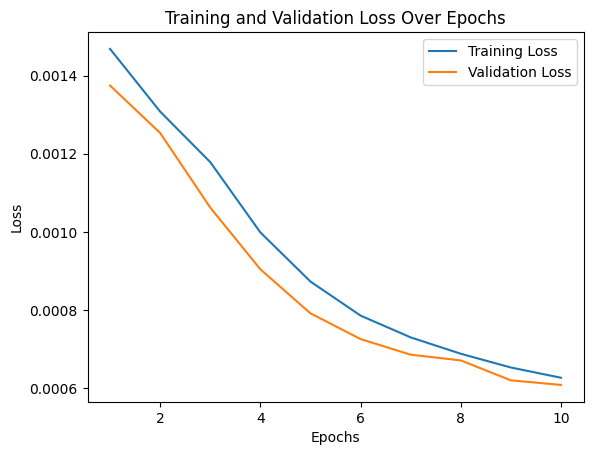

In [147]:
# Plotting the results
plt.plot(range(1, 11), epoch_train_loss, label='Training Loss')  # Adjusted to range(1, 11)
plt.plot(range(1, 11), epoch_val_loss, label='Validation Loss')  # Adjusted to range(1, 11)
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [148]:
# encoder
encoder_input = encoder_decoder.input[0]
encoder_output = encoder_decoder.get_layer('dense_encoder').output
encoder_model = Model(encoder_input, encoder_output)

# decoder#
text_input = encoder_decoder.input[1]
enc_output = Input(shape=(256,), name='Enc_Output')
text_output = encoder_decoder.get_layer('LSTM2').output
add1 = tf.keras.layers.Add()([text_output, enc_output])
fc_1 = fc1(add1)
decoder_output = output_layer(fc_1)

decoder_model = Model(inputs = [text_input, enc_output], outputs = decoder_output)





def greedysearch(img):
    image = cheXnet_Features[img]
    input_ = 'startseq'
    image_features = encoder_model.predict(image)

    result = []
    for i in range(153):
        input_tok = [tokenizer.word_index[w] for w in input_.split()]
        input_padded = pad_sequences([input_tok], 153, padding='post')
        predictions = decoder_model.predict([input_padded, image_features])
        arg = np.argmax(predictions)
        if arg != 7:   # endseq
            result.append(tokenizer.index_word[arg])
            input_ = input_ + ' ' + tokenizer.index_word[arg]
        else:
            break
    rep = ' '.join(e for e in result)
    return rep

In [149]:
cv_data =pd.read_csv("/content/Final_CV_Data.csv")
cv_data.head(3)

,Person_id,Image1,Image2,Report
0,/content/images/CXR1274_IM-0183_0,/content/images/CXR1274_IM-0183-1001.png,/content/images/CXR1274_IM-0183-2001.png,startseq the cardiomediastinal silhouette norm...
1,/content/images/CXR731_IM-2291_0,/content/images/CXR731_IM-2291-1001.png,/content/images/CXR731_IM-2291-2001.png,startseq the lungs are clear and without focal...
2,/content/images/CXR288_IM-1284_0,/content/images/CXR288_IM-1284-1001.png,/content/images/CXR288_IM-1284-1002.png,startseq heart size appears within normal limi...


In [150]:

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize

def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = np.asarray(X)
    X = preprocess_input(X)
    X = resize(X, (224, 224, 3))
    X = np.expand_dims(X, axis=0)
    X = np.asarray(X)
    return X

def get_result(idx=0):
    plt.figure(figsize=(9, 5))

    pre_Report = greedysearch(cv_data['Person_id'][idx])  # result after 20 epochs
    print('------------------------------------------------------------------------------------------------------')
    print("Predicted Report : ", pre_Report)
    print('------------------------------------------------------------------------------------------------------')
    print("Actual Report : ", cv_data['Report'][idx])

    plt.subplot(121)
    img = load_image(cv_data['Image1'][idx])
    plt.imshow(img[0])

    plt.subplot(122)
    img = load_image(cv_data['Image2'][idx])
    plt.imshow(img[0])


1/1 [==============================] - 0s 71ms/step


------------------------------------------------------------------------------------------------------
Predicted Report :  the heart size and pulmonary vascularity appear within normal limits . the lungs are free focal airspace disease . no pleural effusion pneumothora seen . no pneumothora .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq heart size appears within normal limits .  pulmonary vasculature appears within normal limits .  radiodensity overlying the middle cardiac silhouette representing hiatal hernia .  no focal consolidation pleural effusion pneumothora .  no acute bony abnormality .  endseq


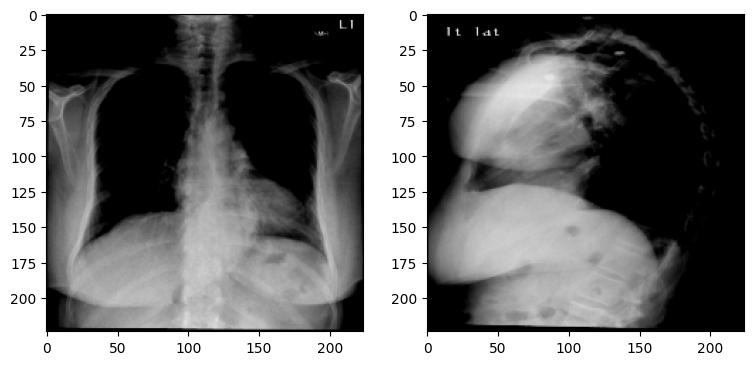

In [151]:
get_result(2)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize

def load_image(img_name):
    image = Image.open(img_name)
    X = np.asarray(image.convert("RGB"))
    X = preprocess_input(X)
    # Resize to (height, width)
    X = resize(X, (224, 224), anti_aliasing=True)  # Remove 3rd dimension for resize
    X = np.expand_dims(X, axis=0)  # Expand dims for batch size
    return X

def get_result(image_path1, image_path2, idx=0):
    plt.figure(figsize=(9, 5))

    pre_Report = greedysearch(cv_data['Person_id'][idx])  # result after 20 epochs
    print('------------------------------------------------------------------------------------------------------')
    print("Predicted Report : ", pre_Report)
    print('------------------------------------------------------------------------------------------------------')
    #print("Actual Report : ", cv_data['Report'][idx])

    plt.subplot(121)
    img1 = load_image(image_path1)  # Load the first external image
    plt.imshow(img1[0])  # Display the first image

    plt.subplot(122)
    img2 = load_image(image_path2)  # Load the second external image
    plt.imshow(img2[0])  # Display the second image

    plt.show()  # Show the plot



frontal


Saving 1.png to 1.png
lateral


Saving 2.png to 2.png
1/1 [==============================] - 0s 71ms/step


------------------------------------------------------------------------------------------------------
Predicted Report :  the heart size and pulmonary vascularity appear within normal limits . the lungs are free focal airspace disease . no pleural effusion pneumothora seen . no pneumothora .
------------------------------------------------------------------------------------------------------
Actual Report :  startseq the cardiomediastinal silhouette normal size and configuration .  pulmonary vasculature within normal limits .  the lungs are wellaerated .  there no pneumothora pleural effusion focal consolidation .  endseq


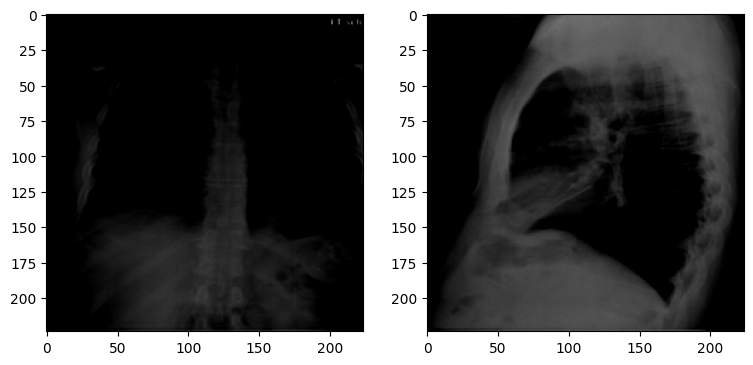

In [161]:
# طلب تحميل الصور من الجهاز
print("frontal")
uploaded1 = files.upload()
image_path1 = list(uploaded1.keys())[0]  # الحصول على اسم الصورة الأولى

print("lateral")
uploaded2 = files.upload()
image_path2 = list(uploaded2.keys())[0]  # الحصول على اسم الصورة الثانية

# استدعاء الدالة مع مسارات الصور التي تم تحميلها
get_result(image_path1, image_path2, idx=0)

#prediction

1/the heart size and pulmonary vascularity appear within normal limits .



2/the lungs are free focal airspace disease .




3/no pleural effusion pneumothora seen




4/ no pneumothora .


#Actual Report



1/the cardiomediastinal silhouette normal size and configuration




2/.  pulmonary vasculature within normal limits




 3/  the lungs are wellaerated


  4/  there no pneumothora pleural effusion focal consolidation
